In [69]:
# Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer,enable_hist_gradient_boosting
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import (LogisticRegression, RidgeClassifier,
                                 PassiveAggressiveClassifier, SGDClassifier)
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                            AdaBoostClassifier, ExtraTreesClassifier,
                            BaggingClassifier, VotingClassifier,
                            StackingClassifier, HistGradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.discriminant_analysis import (QuadraticDiscriminantAnalysis,
                                          LinearDiscriminantAnalysis)
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.base import clone
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
import gc
import re

### Load Data

In [70]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df

,ID,Current Position,Targeted Position,Total Working Experience,Candidate Level,Domisili,Education 1,Education 2,Education 3,Expected Benefit Botom,Expected Benefit Up,Notice Period,Tech Stack,Certification,Estimate Bottom,Estimate Up
0,SKU-WENU1319,Web Developer,NaN,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,SMK Negeri 2 Tasikmalaya (2019 - 2023)\nSistem...,NaN,0,0,NaN,"HTML ,CSS ,Javascript(ReactJs) ,Jquery ,Ajax ,...","[""Junior Web Developer, Digitalent Scholarship...",6000000.0,9000000.0
1,SKU-FUNU1303,Full Stack Developer,NaN,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,NaN,NaN,0,0,NaN,"Laravel, Phalcon, Python, Django, Next.Js, Tai...","[""Google Data Analytics, Coursera Jul 2023"",""L...",8000000.0,12000000.0
2,SKU-JUNU1052,Junior Web Developer,NaN,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,Purwadhika Digital Technology School (2024)\nF...,NaN,0,0,NaN,"JavaScript, Prisma ORM, TypeScript, MySQL, Rea...","[""Full-stack Web Developer""]",4000000.0,6000000.0
3,SKU-JANU420,Java Developer,NaN,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",NaN,NaN,0,0,NaN,"React, JavaScript, Mobile Application Software...",[],6000000.0,9000000.0
4,SKU-NUNU1182,NaN,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",NaN,NaN,0,0,NaN,"PHP, Python, Java, Javascript, Go, C#, Laravel...",[],8000000.0,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,SKU-FRNU1112,Frontend Developer,NaN,3,Mid-Level,"Bandung, West Java, Indonesia","Universitas Mahakarya Asia, Computer Science, ...","Pijar Camp, Fullstack Web Developer, May 2020",NaN,0,0,NaN,"HTML / CSS, TypeScript, JavaScript, Angular, R...",[],8000000.0,12000000.0
1156,SKU-FRNU1147,Front End Web Developer,NaN,1,Junior,"Bogor, Indonesia",Politeknik Negeri Media Kreatif - Diploma 4 Mu...,NaN,NaN,0,0,NaN,"Graphql, Typescript + React, HTML 5, CSS 3, Ja...","[""Belajar Dasar Pemrograman Web - Dicoding Aca...",6000000.0,9000000.0
1157,SKU-SONU1312,Software Engineer,NaN,3,Mid-Level,"Cibodas, Tangerang",Global Institute of Technology and Business - ...,NaN,NaN,0,0,NaN,"CSS, HTML, JAVASCRIPT, TYPESCRIPT, PHP, GO, LA...",[],8000000.0,12000000.0
1158,SKU-IONU877,iOS Developer,NaN,4,Mid-Level,"Pasuruan, Indonesia","Indonesian Computer University, Computer Engin...",NaN,NaN,0,0,NaN,"SwiftUI, UIKit, Core Data, Core Animation, Cor...",[],12000000.0,18000000.0


### EDA

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1160 non-null   object 
 1   Current Position          1019 non-null   object 
 2   Targeted Position         202 non-null    object 
 3   Total Working Experience  1160 non-null   int64  
 4   Candidate Level           1160 non-null   object 
 5   Domisili                  1061 non-null   object 
 6   Education 1               1142 non-null   object 
 7   Education 2               531 non-null    object 
 8   Education 3               129 non-null    object 
 9   Expected Benefit Botom    1160 non-null   int64  
 10  Expected Benefit Up       1160 non-null   int64  
 11  Notice Period             57 non-null     object 
 12  Tech Stack                1155 non-null   object 
 13  Certification             801 non-null    object 
 14  Estimate

In [72]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        290 non-null    object
 1   Current Position          255 non-null    object
 2   Targeted Position         42 non-null     object
 3   Total Working Experience  290 non-null    int64 
 4   Candidate Level           290 non-null    object
 5   Domisili                  270 non-null    object
 6   Education 1               284 non-null    object
 7   Education 2               124 non-null    object
 8   Education 3               31 non-null     object
 9   Expected Benefit Botom    290 non-null    int64 
 10  Expected Benefit Up       290 non-null    int64 
 11  Notice Period             9 non-null      object
 12  Tech Stack                290 non-null    object
 13  Certification             216 non-null    object
dtypes: int64(3), object(11)
me

=== DATASET OVERVIEW ===
Training data shape: (1160, 16)
Test data shape: (290, 14)

NULL VALUE ANALYSIS - TRAINING SET

📊 NULL VALUE SUMMARY:
Total columns: 16
Columns with nulls: 9
Columns without nulls: 7

🎯 SEVERITY BREAKDOWN:
   ✅ No Nulls: 7 columns
   🔴 Critical (>50%): 4 columns
   🟠 Medium (5-20%): 2 columns
   🟢 Low (<5%): 2 columns
   🟡 High (20-50%): 1 columns

📋 DETAILED NULL ANALYSIS:
                  Column  Null_Count  Null_Percentage          Severity Data_Type
           Notice Period        1103            95.09 🔴 Critical (>50%)    object
             Education 3        1031            88.88 🔴 Critical (>50%)    object
       Targeted Position         958            82.59 🔴 Critical (>50%)    object
             Education 2         629            54.22 🔴 Critical (>50%)    object
           Certification         359            30.95   🟡 High (20-50%)    object
        Current Position         141            12.16  🟠 Medium (5-20%)    object
                Domisili

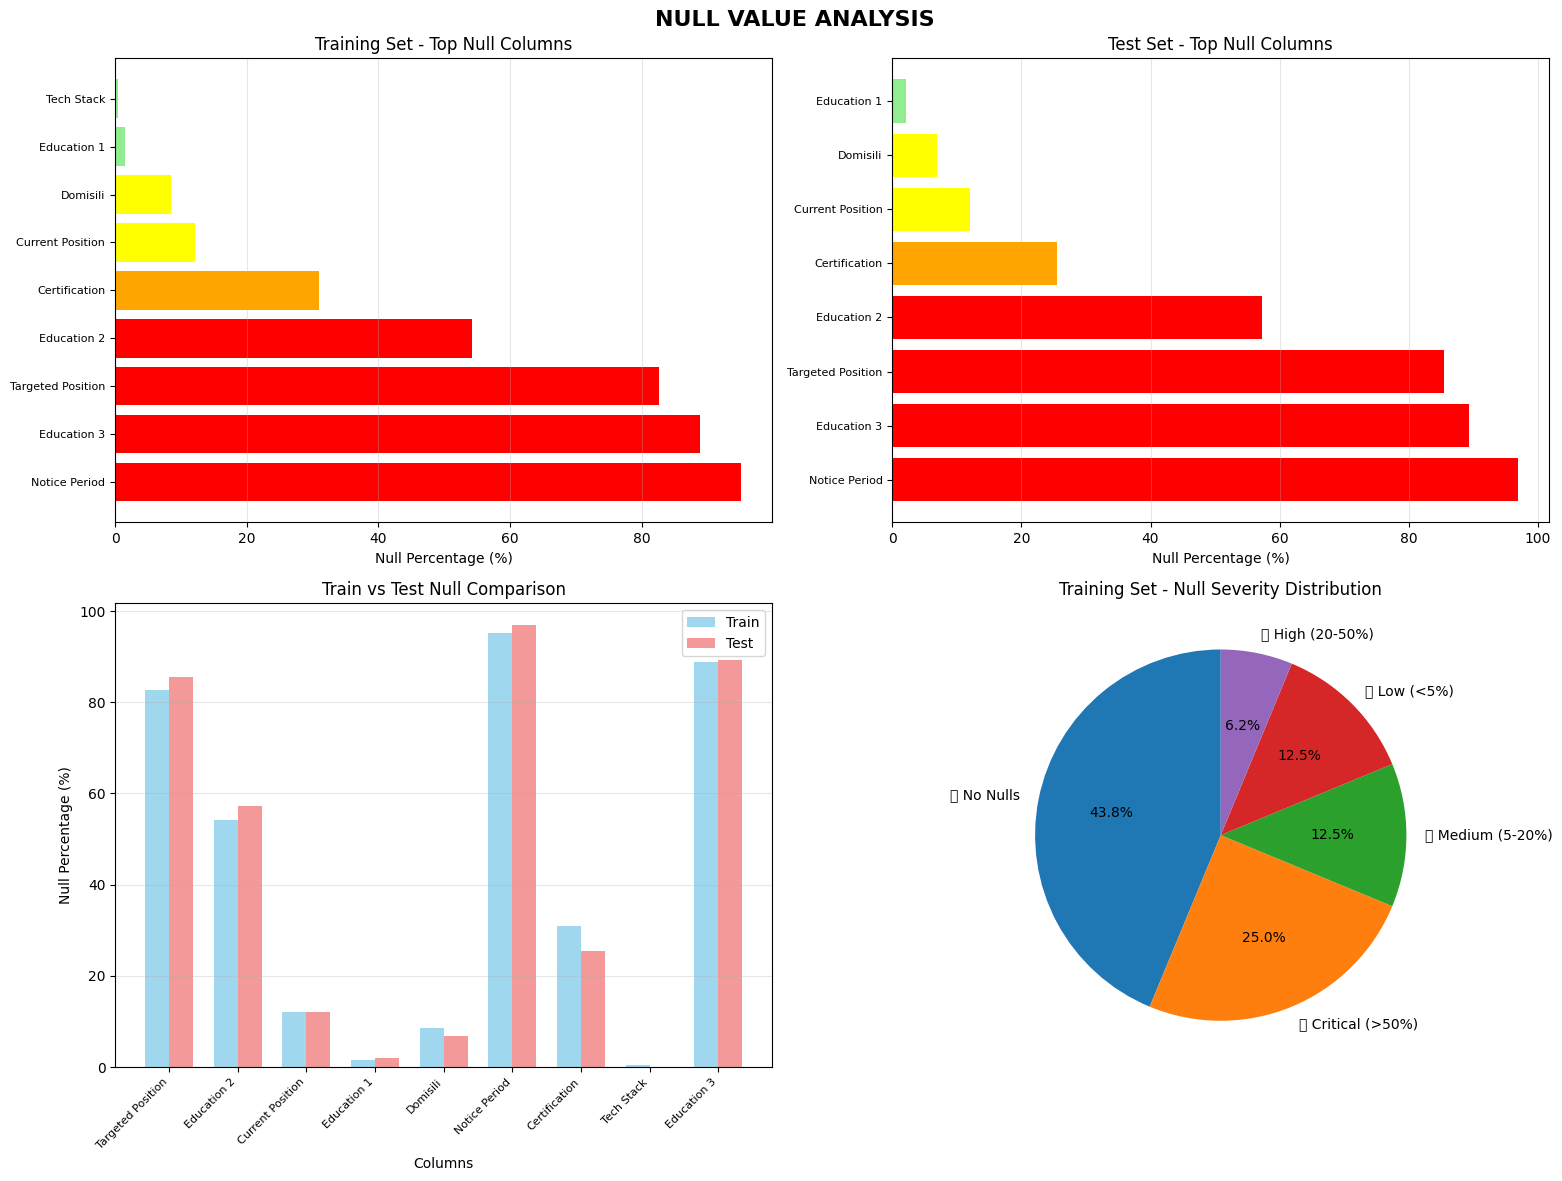


🎯 ACTIONABLE RECOMMENDATIONS

🔴 CRITICAL COLUMNS (>50% nulls) - CONSIDER DROPPING:
   • Notice Period: 95.1% nulls
   • Education 3: 88.9% nulls
   • Targeted Position: 82.6% nulls
   • Education 2: 54.2% nulls

🟡 MEDIUM NULL COLUMNS (5-50%) - NEED IMPUTATION:
   • Certification: 30.9% nulls → Mode/Category imputation
   • Current Position: 12.2% nulls → Mode/Category imputation
   • Domisili: 8.5% nulls → Mode/Category imputation

✅ READY-TO-USE COLUMNS (No nulls): 7 columns
   ID, Total Working Experience, Candidate Level, Expected Benefit Botom, Expected Benefit Up, Estimate Bottom, Estimate Up

💡 NEXT STEPS:
   1. Drop critical null columns (>50%)
   2. Plan imputation strategy for medium null columns
   3. Focus feature engineering on perfect columns
   4. Check if test set has same null patterns


In [73]:
# Dataset Overview
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print("=== DATASET OVERVIEW ===")
print(f"Training data shape: {df.shape}")
print(f"Test data shape: {df_test.shape}")

# =========================================
# NULL VALUE ANALYSIS
# =========================================

def analyze_null_values(data, dataset_name):
    """Comprehensive null value analysis"""
    print(f"\n{'='*50}")
    print(f"NULL VALUE ANALYSIS - {dataset_name}")
    print(f"{'='*50}")
    
    # Calculate null counts and percentages
    null_info = pd.DataFrame({
        'Column': data.columns,
        'Null_Count': data.isnull().sum(),
        'Null_Percentage': (data.isnull().sum() / len(data)) * 100,
        'Data_Type': data.dtypes,
        'Non_Null_Count': data.notnull().sum()
    })
    
    # Sort by null percentage (descending)
    null_info = null_info.sort_values('Null_Percentage', ascending=False)
    
    # Add null severity categories
    null_info['Severity'] = null_info['Null_Percentage'].apply(
        lambda x: '🔴 Critical (>50%)' if x > 50 
        else '🟡 High (20-50%)' if x > 20
        else '🟠 Medium (5-20%)' if x > 5
        else '🟢 Low (<5%)' if x > 0
        else '✅ No Nulls'
    )
    
    print(f"\n📊 NULL VALUE SUMMARY:")
    print(f"Total columns: {len(data.columns)}")
    print(f"Columns with nulls: {(null_info['Null_Count'] > 0).sum()}")
    print(f"Columns without nulls: {(null_info['Null_Count'] == 0).sum()}")
    
    # Show severity breakdown
    severity_counts = null_info['Severity'].value_counts()
    print(f"\n🎯 SEVERITY BREAKDOWN:")
    for severity, count in severity_counts.items():
        print(f"   {severity}: {count} columns")
    
    # Display detailed table
    print(f"\n📋 DETAILED NULL ANALYSIS:")
    display_cols = ['Column', 'Null_Count', 'Null_Percentage', 'Severity', 'Data_Type']
    print(null_info[display_cols].to_string(index=False, float_format='%.2f'))
    
    # High null columns (>20%)
    high_null_cols = null_info[null_info['Null_Percentage'] > 20]
    if len(high_null_cols) > 0:
        print(f"\n⚠️  HIGH NULL COLUMNS (>20%):")
        for _, row in high_null_cols.iterrows():
            print(f"   • {row['Column']}: {row['Null_Percentage']:.1f}% ({row['Null_Count']:,} nulls)")
    
    # Perfect columns (no nulls)
    perfect_cols = null_info[null_info['Null_Count'] == 0]
    if len(perfect_cols) > 0:
        print(f"\n✅ PERFECT COLUMNS (No Nulls):")
        for _, row in perfect_cols.iterrows():
            print(f"   • {row['Column']} ({row['Data_Type']})")
    
    return null_info

# Analyze both datasets
train_null_info = analyze_null_values(df, "TRAINING SET")
test_null_info = analyze_null_values(df_test, "TEST SET")

# =========================================
# VISUAL NULL ANALYSIS
# =========================================

def plot_null_analysis(train_info, test_info):
    """Create visualizations for null value analysis"""
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('NULL VALUE ANALYSIS', fontsize=16, fontweight='bold')
    
    # 1. Training set null percentage bar chart
    train_nulls = train_info[train_info['Null_Percentage'] > 0].head(15)
    if len(train_nulls) > 0:
        axes[0, 0].barh(range(len(train_nulls)), train_nulls['Null_Percentage'], 
                       color=['red' if x > 50 else 'orange' if x > 20 else 'yellow' if x > 5 else 'lightgreen' 
                             for x in train_nulls['Null_Percentage']])
        axes[0, 0].set_yticks(range(len(train_nulls)))
        axes[0, 0].set_yticklabels(train_nulls['Column'], fontsize=8)
        axes[0, 0].set_xlabel('Null Percentage (%)')
        axes[0, 0].set_title('Training Set - Top Null Columns')
        axes[0, 0].grid(axis='x', alpha=0.3)
    
    # 2. Test set null percentage bar chart  
    test_nulls = test_info[test_info['Null_Percentage'] > 0].head(15)
    if len(test_nulls) > 0:
        axes[0, 1].barh(range(len(test_nulls)), test_nulls['Null_Percentage'],
                       color=['red' if x > 50 else 'orange' if x > 20 else 'yellow' if x > 5 else 'lightgreen' 
                             for x in test_nulls['Null_Percentage']])
        axes[0, 1].set_yticks(range(len(test_nulls)))
        axes[0, 1].set_yticklabels(test_nulls['Column'], fontsize=8)
        axes[0, 1].set_xlabel('Null Percentage (%)')
        axes[0, 1].set_title('Test Set - Top Null Columns')
        axes[0, 1].grid(axis='x', alpha=0.3)
    
    # 3. Comparison between train and test
    common_cols = set(train_info['Column']) & set(test_info['Column'])
    if common_cols:
        comparison_data = []
        for col in common_cols:
            train_pct = train_info[train_info['Column'] == col]['Null_Percentage'].iloc[0]
            test_pct = test_info[test_info['Column'] == col]['Null_Percentage'].iloc[0]
            if train_pct > 0 or test_pct > 0:  # Only show columns with nulls
                comparison_data.append({'Column': col, 'Train': train_pct, 'Test': test_pct})
        
        if comparison_data:
            comp_df = pd.DataFrame(comparison_data).head(10)
            x = range(len(comp_df))
            width = 0.35
            axes[1, 0].bar([i - width/2 for i in x], comp_df['Train'], width, label='Train', alpha=0.8, color='skyblue')
            axes[1, 0].bar([i + width/2 for i in x], comp_df['Test'], width, label='Test', alpha=0.8, color='lightcoral')
            axes[1, 0].set_xlabel('Columns')
            axes[1, 0].set_ylabel('Null Percentage (%)')
            axes[1, 0].set_title('Train vs Test Null Comparison')
            axes[1, 0].set_xticks(x)
            axes[1, 0].set_xticklabels(comp_df['Column'], rotation=45, ha='right', fontsize=8)
            axes[1, 0].legend()
            axes[1, 0].grid(axis='y', alpha=0.3)
    
    # 4. Null severity distribution
    train_severity = train_info['Severity'].value_counts()
    test_severity = test_info['Severity'].value_counts()
    
    # Pie chart for train severity
    axes[1, 1].pie(train_severity.values, labels=train_severity.index, autopct='%1.1f%%', startangle=90)
    axes[1, 1].set_title('Training Set - Null Severity Distribution')
    
    plt.tight_layout()
    plt.show()

# Create visualizations
plot_null_analysis(train_null_info, test_null_info)

# =========================================
# ACTIONABLE RECOMMENDATIONS
# =========================================

print(f"\n{'='*60}")
print("🎯 ACTIONABLE RECOMMENDATIONS")
print(f"{'='*60}")

# High null columns
high_null_train = train_null_info[train_null_info['Null_Percentage'] > 50]
high_null_test = test_null_info[test_null_info['Null_Percentage'] > 50]

if len(high_null_train) > 0:
    print(f"\n🔴 CRITICAL COLUMNS (>50% nulls) - CONSIDER DROPPING:")
    for _, row in high_null_train.iterrows():
        print(f"   • {row['Column']}: {row['Null_Percentage']:.1f}% nulls")

# Medium null columns  
medium_null_train = train_null_info[
    (train_null_info['Null_Percentage'] > 5) & 
    (train_null_info['Null_Percentage'] <= 50)
]

if len(medium_null_train) > 0:
    print(f"\n🟡 MEDIUM NULL COLUMNS (5-50%) - NEED IMPUTATION:")
    for _, row in medium_null_train.iterrows():
        dtype = str(row['Data_Type'])
        if 'object' in dtype:
            strategy = "Mode/Category imputation"
        elif 'int' in dtype or 'float' in dtype:
            strategy = "Mean/Median imputation"
        else:
            strategy = "Custom strategy needed"
        print(f"   • {row['Column']}: {row['Null_Percentage']:.1f}% nulls → {strategy}")

# Perfect columns
perfect_train = train_null_info[train_null_info['Null_Count'] == 0]
if len(perfect_train) > 0:
    print(f"\n✅ READY-TO-USE COLUMNS (No nulls): {len(perfect_train)} columns")
    print(f"   {', '.join(perfect_train['Column'].tolist())}")

print(f"\n💡 NEXT STEPS:")
print(f"   1. Drop critical null columns (>50%)")
print(f"   2. Plan imputation strategy for medium null columns")
print(f"   3. Focus feature engineering on perfect columns")
print(f"   4. Check if test set has same null patterns")

In [74]:
# Count null, calculate null percentage on each column
null_percentage = df.isnull().mean()
null_percentage = null_percentage.sort_values(ascending=False)

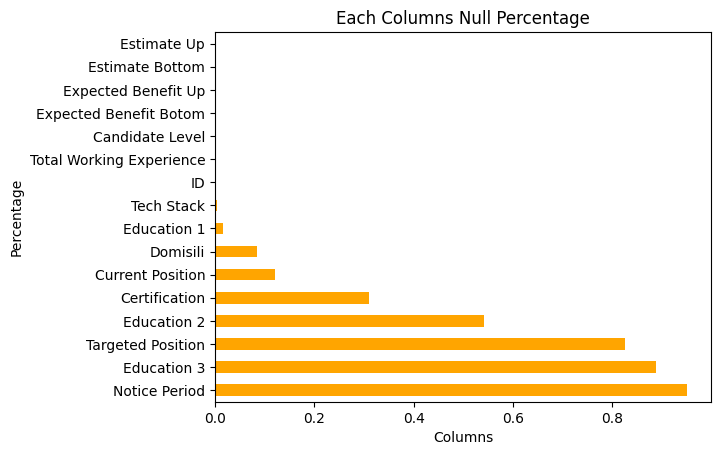

In [75]:
# Visualize
null_percentage.plot(kind='barh', color='orange')
plt.title("Each Columns Null Percentage")
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.show()

In [76]:
df_high_null = null_percentage[null_percentage > 0.1]
df_low_null = null_percentage[null_percentage <= 0.1]
print(len(df_high_null), len(df_low_null))
print(df_high_null)

6 10
Notice Period        0.950862
Education 3          0.888793
Targeted Position    0.825862
Education 2          0.542241
Certification        0.309483
Current Position     0.121552
dtype: float64


In [77]:
for column in df.columns:
    print(column)

ID
Current Position
Targeted Position
Total Working Experience
Candidate Level
Domisili
Education 1
Education 2
Education 3
Expected Benefit Botom
Expected Benefit Up
Notice Period
Tech Stack
Certification
Estimate Bottom
Estimate Up


To do:
1. Turn education 1-3 -> 0/1
2. Turn certification -> count
3. Turn current position -> 0/1
4. Turn tech stack -> sum
5. Turn notice period -> 1/0
6. Turn tech stack -> sum


In [78]:
# sisa education aja yang di astype
columns_to_drop = ['Education 3', 'Notice Period', 'Targeted Position']
print(f"=== DROPPING COLUMNS ===")
print(f"Columns to drop: {columns_to_drop}")

# df["Education 1"] = df["Education 1"].notnull().astype(int)

# Check which columns exist in dataframe
existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]
missing_cols = [col for col in columns_to_drop if col not in df.columns]

print(f"Existing columns to drop: {existing_cols_to_drop}")
if missing_cols:
    print(f"Missing columns (already dropped?): {missing_cols}")

# Drop from training data
df = df.drop(columns=existing_cols_to_drop)
print(f"Training data shape after dropping: {df.shape}")

# Drop from test data (if exists)
existing_test_cols_to_drop = [col for col in columns_to_drop if col in df_test.columns]
df_test = df_test.drop(columns=existing_test_cols_to_drop)
print(f"Test data shape after dropping: {df_test.shape}")

print(f"\n✅ Successfully dropped columns: {existing_cols_to_drop}")
print(f"Remaining columns: {df.columns.tolist()}")
df

=== DROPPING COLUMNS ===
Columns to drop: ['Education 3', 'Notice Period', 'Targeted Position']
Existing columns to drop: ['Education 3', 'Notice Period', 'Targeted Position']
Training data shape after dropping: (1160, 13)
Test data shape after dropping: (290, 11)

✅ Successfully dropped columns: ['Education 3', 'Notice Period', 'Targeted Position']
Remaining columns: ['ID', 'Current Position', 'Total Working Experience', 'Candidate Level', 'Domisili', 'Education 1', 'Education 2', 'Expected Benefit Botom', 'Expected Benefit Up', 'Tech Stack', 'Certification', 'Estimate Bottom', 'Estimate Up']


,ID,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Education 2,Expected Benefit Botom,Expected Benefit Up,Tech Stack,Certification,Estimate Bottom,Estimate Up
0,SKU-WENU1319,Web Developer,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,SMK Negeri 2 Tasikmalaya (2019 - 2023)\nSistem...,0,0,"HTML ,CSS ,Javascript(ReactJs) ,Jquery ,Ajax ,...","[""Junior Web Developer, Digitalent Scholarship...",6000000.0,9000000.0
1,SKU-FUNU1303,Full Stack Developer,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,NaN,0,0,"Laravel, Phalcon, Python, Django, Next.Js, Tai...","[""Google Data Analytics, Coursera Jul 2023"",""L...",8000000.0,12000000.0
2,SKU-JUNU1052,Junior Web Developer,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,Purwadhika Digital Technology School (2024)\nF...,0,0,"JavaScript, Prisma ORM, TypeScript, MySQL, Rea...","[""Full-stack Web Developer""]",4000000.0,6000000.0
3,SKU-JANU420,Java Developer,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",NaN,0,0,"React, JavaScript, Mobile Application Software...",[],6000000.0,9000000.0
4,SKU-NUNU1182,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",NaN,0,0,"PHP, Python, Java, Javascript, Go, C#, Laravel...",[],8000000.0,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,SKU-FRNU1112,Frontend Developer,3,Mid-Level,"Bandung, West Java, Indonesia","Universitas Mahakarya Asia, Computer Science, ...","Pijar Camp, Fullstack Web Developer, May 2020",0,0,"HTML / CSS, TypeScript, JavaScript, Angular, R...",[],8000000.0,12000000.0
1156,SKU-FRNU1147,Front End Web Developer,1,Junior,"Bogor, Indonesia",Politeknik Negeri Media Kreatif - Diploma 4 Mu...,NaN,0,0,"Graphql, Typescript + React, HTML 5, CSS 3, Ja...","[""Belajar Dasar Pemrograman Web - Dicoding Aca...",6000000.0,9000000.0
1157,SKU-SONU1312,Software Engineer,3,Mid-Level,"Cibodas, Tangerang",Global Institute of Technology and Business - ...,NaN,0,0,"CSS, HTML, JAVASCRIPT, TYPESCRIPT, PHP, GO, LA...",[],8000000.0,12000000.0
1158,SKU-IONU877,iOS Developer,4,Mid-Level,"Pasuruan, Indonesia","Indonesian Computer University, Computer Engin...",NaN,0,0,"SwiftUI, UIKit, Core Data, Core Animation, Cor...",[],12000000.0,18000000.0


In [79]:
# Turn certification -> count
print(df['Certification'].isnull().sum())

# Turn certification to certification count
df['Certification'] = df['Certification'].apply(lambda x: len(re.findall(r'[^\s,;\[\]]+', str(x))) if pd.notna(x) else 0)
print(df['Certification'].isnull().sum())
df.head(10)

359
0


,ID,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Education 2,Expected Benefit Botom,Expected Benefit Up,Tech Stack,Certification,Estimate Bottom,Estimate Up
0,SKU-WENU1319,Web Developer,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,SMK Negeri 2 Tasikmalaya (2019 - 2023)\nSistem...,0,0,"HTML ,CSS ,Javascript(ReactJs) ,Jquery ,Ajax ,...",8,6000000.0,9000000.0
1,SKU-FUNU1303,Full Stack Developer,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,NaN,0,0,"Laravel, Phalcon, Python, Django, Next.Js, Tai...",54,8000000.0,12000000.0
2,SKU-JUNU1052,Junior Web Developer,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,Purwadhika Digital Technology School (2024)\nF...,0,0,"JavaScript, Prisma ORM, TypeScript, MySQL, Rea...",3,4000000.0,6000000.0
3,SKU-JANU420,Java Developer,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",NaN,0,0,"React, JavaScript, Mobile Application Software...",0,6000000.0,9000000.0
4,SKU-NUNU1182,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",NaN,0,0,"PHP, Python, Java, Javascript, Go, C#, Laravel...",0,8000000.0,12000000.0
5,SKU-TETE087,Technical Writer,3,Mid-Level,Bandung,Politeknik Negeri Subang - Associate Degree in...,NaN,0,0,"Microsoft Office Suite, Figma, Canva, Adobe XD...",0,6000000.0,9000000.0
6,SKU-FUNU1394,Full-stack Software Engineer/Mobile App Engineer,7,Mid-Level,Mataram,"STMIK AKAKOM, Yogyakarta, ID, Information Tech...",NaN,0,0,"Java, Kotlin, Swift, Dart, Flutter, Unit Testi...",0,12000000.0,20000000.0
7,SKU-NUAN267,NaN,0,Junior,"Palembang, Indonesia","Sriwijaya University - Palembang, Indonesia Au...","Bangkit Academy by Google, Tokopedia & Travelo...",0,0,"Kotlin, Java, Python, MySQL, Firebase, SQLite,...",22,4000000.0,7000000.0
8,SKU-SONU498,Software Quality Assurance Manual Tester,1,Junior,"Jakarta, Indonesia",Universitas Indraprasta PGRI - S1 (Strata 1) T...,NaN,0,0,"Pengujian Manual, Dokumentasi Pengujian, Anali...",18,4000000.0,6000000.0
9,SKU-NUNU1453,NaN,1,Junior,NaN,INSTITUT TEKNOLOGI NASIONAL BANDUNG (AUG 2016 ...,"BINAR ACADEMY, IN PROGRESS (AUG 2022 - DES 202...",0,0,"HTML, CSS, JavaScript, React.js, Laravel, SQL,...",17,5000000.0,8000000.0


In [80]:
# Turn tech stack to sum
df['Tech Stack'] = df["Tech Stack"].apply(
    lambda x: 0 if pd.isnull(x) or x == '' else len(x.split(','))
)
df.head(10)

,ID,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Education 2,Expected Benefit Botom,Expected Benefit Up,Tech Stack,Certification,Estimate Bottom,Estimate Up
0,SKU-WENU1319,Web Developer,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,SMK Negeri 2 Tasikmalaya (2019 - 2023)\nSistem...,0,0,12,8,6000000.0,9000000.0
1,SKU-FUNU1303,Full Stack Developer,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,NaN,0,0,15,54,8000000.0,12000000.0
2,SKU-JUNU1052,Junior Web Developer,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,Purwadhika Digital Technology School (2024)\nF...,0,0,11,3,4000000.0,6000000.0
3,SKU-JANU420,Java Developer,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",NaN,0,0,20,0,6000000.0,9000000.0
4,SKU-NUNU1182,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",NaN,0,0,20,0,8000000.0,12000000.0
5,SKU-TETE087,Technical Writer,3,Mid-Level,Bandung,Politeknik Negeri Subang - Associate Degree in...,NaN,0,0,10,0,6000000.0,9000000.0
6,SKU-FUNU1394,Full-stack Software Engineer/Mobile App Engineer,7,Mid-Level,Mataram,"STMIK AKAKOM, Yogyakarta, ID, Information Tech...",NaN,0,0,31,0,12000000.0,20000000.0
7,SKU-NUAN267,NaN,0,Junior,"Palembang, Indonesia","Sriwijaya University - Palembang, Indonesia Au...","Bangkit Academy by Google, Tokopedia & Travelo...",0,0,13,22,4000000.0,7000000.0
8,SKU-SONU498,Software Quality Assurance Manual Tester,1,Junior,"Jakarta, Indonesia",Universitas Indraprasta PGRI - S1 (Strata 1) T...,NaN,0,0,7,18,4000000.0,6000000.0
9,SKU-NUNU1453,NaN,1,Junior,NaN,INSTITUT TEKNOLOGI NASIONAL BANDUNG (AUG 2016 ...,"BINAR ACADEMY, IN PROGRESS (AUG 2022 - DES 202...",0,0,7,17,5000000.0,8000000.0


In [81]:
# Extract domisili
def extract_main_city(domisili):
    if pd.isnull(domisili):
        return 'Unknown'
    
    major_cities = ['Jakarta', 'Bandung', 'Surabaya', 'Yogyakarta', 'Semarang', 'Medan', 'Palembang', 'Bekasi', 'Bogor']
    domisili_str = str(domisili).lower()
    
    for city in major_cities:
        if city.lower() in domisili_str:
            return city
    return 'Other'

df['City'] = df['Domisili'].apply(extract_main_city)
df

,ID,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Education 2,Expected Benefit Botom,Expected Benefit Up,Tech Stack,Certification,Estimate Bottom,Estimate Up,City
0,SKU-WENU1319,Web Developer,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,SMK Negeri 2 Tasikmalaya (2019 - 2023)\nSistem...,0,0,12,8,6000000.0,9000000.0,Bandung
1,SKU-FUNU1303,Full Stack Developer,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,NaN,0,0,15,54,8000000.0,12000000.0,Bandung
2,SKU-JUNU1052,Junior Web Developer,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,Purwadhika Digital Technology School (2024)\nF...,0,0,11,3,4000000.0,6000000.0,Semarang
3,SKU-JANU420,Java Developer,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",NaN,0,0,20,0,6000000.0,9000000.0,Bandung
4,SKU-NUNU1182,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",NaN,0,0,20,0,8000000.0,12000000.0,Bandung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,SKU-FRNU1112,Frontend Developer,3,Mid-Level,"Bandung, West Java, Indonesia","Universitas Mahakarya Asia, Computer Science, ...","Pijar Camp, Fullstack Web Developer, May 2020",0,0,7,0,8000000.0,12000000.0,Bandung
1156,SKU-FRNU1147,Front End Web Developer,1,Junior,"Bogor, Indonesia",Politeknik Negeri Media Kreatif - Diploma 4 Mu...,NaN,0,0,16,104,6000000.0,9000000.0,Bogor
1157,SKU-SONU1312,Software Engineer,3,Mid-Level,"Cibodas, Tangerang",Global Institute of Technology and Business - ...,NaN,0,0,13,0,8000000.0,12000000.0,Other
1158,SKU-IONU877,iOS Developer,4,Mid-Level,"Pasuruan, Indonesia","Indonesian Computer University, Computer Engin...",NaN,0,0,15,0,12000000.0,18000000.0,Other


In [82]:
# Classify Current Position by Seniority Level
def classify_position_seniority(position):
    if pd.isnull(position):
        return 'No Position'
    
    position_lower = str(position).lower()
    
    # Senior level keywords
    if any(word in position_lower for word in ['senior', 'sr', 'lead', 'principal', 'head', 'manager', 'director', 'chief', 'expert']):
        return 'Senior'
    # Junior level keywords  
    elif any(word in position_lower for word in ['junior', 'jr', 'intern', 'trainee', 'entry', 'associate', 'fresh']):
        return 'Junior'
    # Mid level keywords
    elif any(word in position_lower for word in ['mid', 'middle', 'intermediate']):
        return 'Mid'
    else:
        return 'Mid'  # Default untuk yang ga jelas levelnya

# Classify Current Position by Job Function
def classify_position_function(position):
    if pd.isnull(position):
        return 'No Position'
    
    position_lower = str(position).lower()
    
    # Frontend Development
    if any(word in position_lower for word in ['frontend', 'front-end', 'front end', 'fe developer', 'ui developer']):
        return 'Frontend'
    # Backend Development
    elif any(word in position_lower for word in ['backend', 'back-end', 'back end', 'be developer', 'server']):
        return 'Backend'
    # Full Stack Development
    elif any(word in position_lower for word in ['fullstack', 'full-stack', 'full stack', 'fs developer']):
        return 'Fullstack'
    # Mobile Development
    elif any(word in position_lower for word in ['mobile', 'android', 'ios', 'flutter', 'react native', 'app developer']):
        return 'Mobile'
    # Web Development (general)
    elif any(word in position_lower for word in ['web developer', 'web dev', 'website']):
        return 'Web'
    # Data Science/Analytics
    elif any(word in position_lower for word in ['data', 'analyst', 'scientist', 'ml', 'ai', 'machine learning', 'analytics']):
        return 'Data'
    # DevOps/Infrastructure
    elif any(word in position_lower for word in ['devops', 'sre', 'infrastructure', 'cloud', 'deployment']):
        return 'DevOps'
    # Quality Assurance
    elif any(word in position_lower for word in ['qa', 'test', 'quality', 'tester', 'quality assurance']):
        return 'QA'
    # UI/UX Design
    elif any(word in position_lower for word in ['ui', 'ux', 'design', 'designer']):
        return 'Design'
    # Java Development
    elif any(word in position_lower for word in ['java developer', 'java']):
        return 'Java'
    # Software Engineering (general)
    elif any(word in position_lower for word in ['software', 'engineer', 'programmer', 'developer']):
        return 'Software'
    # Technical Writing
    elif any(word in position_lower for word in ['technical writer', 'writer', 'documentation']):
        return 'Technical Writing'
    else:
        return 'Other'

# Apply classifications
df['Position_Seniority'] = df['Current Position'].apply(classify_position_seniority)
df['Position_Function'] = df['Current Position'].apply(classify_position_function)

# Check results
print("=== SENIORITY CLASSIFICATION ===")
print(df['Position_Seniority'].value_counts())
print("\n=== FUNCTION CLASSIFICATION ===")
print(df['Position_Function'].value_counts())

# Show some examples
print("\n=== SAMPLE CLASSIFICATIONS ===")
sample_df = df[['Current Position', 'Position_Seniority', 'Position_Function']].head(15)
print(sample_df)
df

=== SENIORITY CLASSIFICATION ===
Position_Seniority
Mid            883
No Position    141
Senior          84
Junior          52
Name: count, dtype: int64

=== FUNCTION CLASSIFICATION ===
Position_Function
Fullstack            167
Software             164
Other                158
No Position          141
Mobile               117
Backend              108
Frontend             106
QA                    74
Web                   58
Data                  37
Technical Writing     18
Java                   5
Design                 5
DevOps                 2
Name: count, dtype: int64

=== SAMPLE CLASSIFICATIONS ===
                                    Current Position Position_Seniority  \
0                                      Web Developer                Mid   
1                               Full Stack Developer                Mid   
2                               Junior Web Developer             Junior   
3                                     Java Developer                Mid   
4           

,ID,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Education 2,Expected Benefit Botom,Expected Benefit Up,Tech Stack,Certification,Estimate Bottom,Estimate Up,City,Position_Seniority,Position_Function
0,SKU-WENU1319,Web Developer,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,SMK Negeri 2 Tasikmalaya (2019 - 2023)\nSistem...,0,0,12,8,6000000.0,9000000.0,Bandung,Mid,Web
1,SKU-FUNU1303,Full Stack Developer,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,NaN,0,0,15,54,8000000.0,12000000.0,Bandung,Mid,Fullstack
2,SKU-JUNU1052,Junior Web Developer,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,Purwadhika Digital Technology School (2024)\nF...,0,0,11,3,4000000.0,6000000.0,Semarang,Junior,Web
3,SKU-JANU420,Java Developer,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",NaN,0,0,20,0,6000000.0,9000000.0,Bandung,Mid,Java
4,SKU-NUNU1182,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",NaN,0,0,20,0,8000000.0,12000000.0,Bandung,No Position,No Position
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,SKU-FRNU1112,Frontend Developer,3,Mid-Level,"Bandung, West Java, Indonesia","Universitas Mahakarya Asia, Computer Science, ...","Pijar Camp, Fullstack Web Developer, May 2020",0,0,7,0,8000000.0,12000000.0,Bandung,Mid,Frontend
1156,SKU-FRNU1147,Front End Web Developer,1,Junior,"Bogor, Indonesia",Politeknik Negeri Media Kreatif - Diploma 4 Mu...,NaN,0,0,16,104,6000000.0,9000000.0,Bogor,Mid,Frontend
1157,SKU-SONU1312,Software Engineer,3,Mid-Level,"Cibodas, Tangerang",Global Institute of Technology and Business - ...,NaN,0,0,13,0,8000000.0,12000000.0,Other,Mid,Software
1158,SKU-IONU877,iOS Developer,4,Mid-Level,"Pasuruan, Indonesia","Indonesian Computer University, Computer Engin...",NaN,0,0,15,0,12000000.0,18000000.0,Other,Mid,Mobile


In [83]:
# Classify Education 
# Classify Education by Degree Level
def classify_education_level(education):
    if pd.isnull(education):
        return 'No Education'
    
    education_lower = str(education).lower()
    
    # PhD/Doctorate level
    if any(word in education_lower for word in ['phd', 'ph.d', 'doctorate', 'doctoral', 's3']):
        return 'Doctorate'
    # Master's level
    elif any(word in education_lower for word in ['master', 'magister', 's2', 'mba', 'msc', 'ma']):
        return 'Master'
    # Bachelor's level
    elif any(word in education_lower for word in ['bachelor', 'sarjana', 's1', 'degree']):
        return 'Bachelor'
    # Associate/Diploma level
    elif any(word in education_lower for word in ['associate', 'diploma', 'd3', 'd4', 'politeknik']):
        return 'Diploma'
    # High School
    elif any(word in education_lower for word in ['sma', 'smk', 'high school', 'senior high']):
        return 'High School'
    else:
        return 'Other'

# Classify Education by Field of Study
def classify_education_field(education):
    if pd.isnull(education):
        return 'No Field'
    
    education_lower = str(education).lower()
    
    # Computer Science & IT
    if any(word in education_lower for word in ['computer', 'komputer', 'informatics', 'informatika', 'information technology', 'sistem informasi', 'teknik informatika']):
        return 'Computer Science'
    # Engineering
    elif any(word in education_lower for word in ['engineering', 'teknik', 'electrical', 'elektro', 'mechanical', 'mesin']):
        return 'Engineering'
    # Business & Management
    elif any(word in education_lower for word in ['business', 'management', 'ekonomi', 'manajemen', 'accounting', 'akuntansi']):
        return 'Business'
    # Design & Arts
    elif any(word in education_lower for word in ['design', 'desain', 'art', 'seni', 'visual', 'multimedia']):
        return 'Design'
    # Mathematics & Statistics
    elif any(word in education_lower for word in ['mathematics', 'matematika', 'statistics', 'statistik']):
        return 'Mathematics'
    # Natural Sciences
    elif any(word in education_lower for word in ['physics', 'fisika', 'chemistry', 'kimia', 'biology', 'biologi']):
        return 'Science'
    else:
        return 'Other'

# Classify Education by Institution Type
def classify_education_institution(education):
    if pd.isnull(education):
        return 'No Institution'
    
    education_lower = str(education).lower()
    
    # University
    if any(word in education_lower for word in ['universitas', 'university']):
        return 'University'
    # Polytechnic/Institute
    elif any(word in education_lower for word in ['politeknik', 'polytechnic', 'institute', 'institut']):
        return 'Polytechnic'
    # College/Academy
    elif any(word in education_lower for word in ['college', 'academy', 'akademi', 'sekolah tinggi', 'stmik']):
        return 'College'
    # High School
    elif any(word in education_lower for word in ['sma', 'smk', 'high school']):
        return 'High School'
    else:
        return 'Other'

# Apply all classifications
df['Education_Level1'] = df['Education 1'].apply(classify_education_level)
df['Education_Field1'] = df['Education 1'].apply(classify_education_field)
df['Education_Institution1'] = df['Education 1'].apply(classify_education_institution)
df['Education_Level2'] = df['Education 2'].apply(classify_education_level)
df['Education_Field2'] = df['Education 2'].apply(classify_education_field)
df['Education_Institution2'] = df['Education 2'].apply(classify_education_institution)

# Check results
print("=== EDUCATION LEVEL CLASSIFICATION ===")
print(df['Education_Level1'].value_counts())
print(df['Education_Level2'].value_counts())
print("\n=== EDUCATION FIELD CLASSIFICATION ===")
print(df['Education_Field1'].value_counts())
print(df['Education_Field2'].value_counts())
print("\n=== EDUCATION INSTITUTION CLASSIFICATION ===")
print(df['Education_Institution1'].value_counts())
print(df['Education_Institution2'].value_counts())

# Show some examples
print("\n=== SAMPLE EDUCATION CLASSIFICATIONS ===")
sample_df = df[['Education 1', 'Education_Level1', 'Education_Field1', 'Education_Institution1', 'Education 2', 'Education_Level2', 'Education_Field2', 'Education_Institution2']].head(15)
print(sample_df)
df

=== EDUCATION LEVEL CLASSIFICATION ===
Education_Level1
Master          777
Bachelor        149
Other           145
High School      55
No Education     18
Diploma          16
Name: count, dtype: int64
Education_Level2
No Education    629
Master          290
High School     109
Other           104
Bachelor         23
Diploma           5
Name: count, dtype: int64

=== EDUCATION FIELD CLASSIFICATION ===
Education_Field1
Computer Science    626
Other               289
Engineering         113
Design               67
Business             34
No Field             18
Science               8
Mathematics           5
Name: count, dtype: int64
Education_Field2
No Field            629
Other               261
Computer Science    134
Engineering          61
Design               56
Business             12
Mathematics           5
Science               2
Name: count, dtype: int64

=== EDUCATION INSTITUTION CLASSIFICATION ===
Education_Institution1
University        685
Polytechnic       150
Other       

,ID,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Education 2,Expected Benefit Botom,Expected Benefit Up,Tech Stack,...,Estimate Up,City,Position_Seniority,Position_Function,Education_Level1,Education_Field1,Education_Institution1,Education_Level2,Education_Field2,Education_Institution2
0,SKU-WENU1319,Web Developer,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,SMK Negeri 2 Tasikmalaya (2019 - 2023)\nSistem...,0,0,12,...,9000000.0,Bandung,Mid,Web,Master,Computer Science,University,Master,Computer Science,High School
1,SKU-FUNU1303,Full Stack Developer,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,NaN,0,0,15,...,12000000.0,Bandung,Mid,Fullstack,Other,Other,University,No Education,No Field,No Institution
2,SKU-JUNU1052,Junior Web Developer,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,Purwadhika Digital Technology School (2024)\nF...,0,0,11,...,6000000.0,Semarang,Junior,Web,Master,Engineering,University,Other,Other,Other
3,SKU-JANU420,Java Developer,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",NaN,0,0,20,...,9000000.0,Bandung,Mid,Java,Bachelor,Other,University,No Education,No Field,No Institution
4,SKU-NUNU1182,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",NaN,0,0,20,...,12000000.0,Bandung,No Position,No Position,Other,Computer Science,University,No Education,No Field,No Institution
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,SKU-FRNU1112,Frontend Developer,3,Mid-Level,"Bandung, West Java, Indonesia","Universitas Mahakarya Asia, Computer Science, ...","Pijar Camp, Fullstack Web Developer, May 2020",0,0,7,...,12000000.0,Bandung,Mid,Frontend,Master,Computer Science,University,Master,Other,Other
1156,SKU-FRNU1147,Front End Web Developer,1,Junior,"Bogor, Indonesia",Politeknik Negeri Media Kreatif - Diploma 4 Mu...,NaN,0,0,16,...,9000000.0,Bogor,Mid,Frontend,Master,Engineering,Polytechnic,No Education,No Field,No Institution
1157,SKU-SONU1312,Software Engineer,3,Mid-Level,"Cibodas, Tangerang",Global Institute of Technology and Business - ...,NaN,0,0,13,...,12000000.0,Other,Mid,Software,Master,Computer Science,Polytechnic,No Education,No Field,No Institution
1158,SKU-IONU877,iOS Developer,4,Mid-Level,"Pasuruan, Indonesia","Indonesian Computer University, Computer Engin...",NaN,0,0,15,...,18000000.0,Other,Mid,Mobile,Other,Computer Science,University,No Education,No Field,No Institution


In [84]:
print("=== ENHANCED UNIVERSITY CLASSIFICATION - INDONESIA ===")

def classify_university_prestige(education):
    """
    Enhanced Indonesian universities classification with more comprehensive coverage
    """
    if pd.isnull(education):
        return {
            'university_tier': 'Unknown',
            'university_type': 'Unknown', 
            'university_prestige_score': 0,
            'is_top_university': 0,
            'university_name': 'Unknown',
            'is_public': 0
        }
    
    education_lower = str(education).lower()
    
    # =========================================
    # TIER 1 - TOP UNIVERSITIES (Prestige Score: 10)
    # =========================================
    tier1_universities = {
        # ITB Family
        'institut teknologi bandung': 'ITB',
        'itb': 'ITB',
        'institut teknologi bandung (itb)': 'ITB',
        'technology institute of bandung': 'ITB',
        
        # UI Family  
        'universitas indonesia': 'UI',
        'ui': 'UI',
        'universitas indonesia (ui)': 'UI',
        'university of indonesia': 'UI',
        
        # UGM Family
        'universitas gadjah mada': 'UGM',
        'ugm': 'UGM',
        'universitas gadjah mada (ugm)': 'UGM',
        'gadjah mada university': 'UGM',
        
        # ITS Family
        'institut teknologi sepuluh nopember': 'ITS',
        'its': 'ITS',
        'institut teknologi sepuluh nopember (its)': 'ITS',
        'its surabaya': 'ITS',
        'sepuluh nopember institute of technology': 'ITS',
        
        # IPB Family
        'institut pertanian bogor': 'IPB',
        'ipb': 'IPB',
        'institut pertanian bogor (ipb)': 'IPB',
        'ipb university': 'IPB',
        'bogor agricultural university': 'IPB'
    }
    
    # =========================================
    # TIER 2 - PRESTIGIOUS STATE UNIVERSITIES (Prestige Score: 8)
    # =========================================
    tier2_universities = {
        # Unpad
        'universitas padjadjaran': 'UNPAD',
        'unpad': 'UNPAD',
        'universitas padjadjaran (unpad)': 'UNPAD',
        'padjadjaran university': 'UNPAD',
        
        # Undip
        'universitas diponegoro': 'UNDIP',
        'undip': 'UNDIP',
        'universitas diponegoro (undip)': 'UNDIP',
        'diponegoro university': 'UNDIP',
        
        # Unair
        'universitas airlangga': 'UNAIR',
        'unair': 'UNAIR',
        'universitas airlangga (unair)': 'UNAIR',
        'airlangga university': 'UNAIR',
        
        # Unhas
        'universitas hasanuddin': 'UNHAS',
        'unhas': 'UNHAS',
        'universitas hasanuddin (unhas)': 'UNHAS',
        'hasanuddin university': 'UNHAS',
        
        # USU
        'universitas sumatera utara': 'USU',
        'usu': 'USU',
        'universitas sumatera utara (usu)': 'USU',
        'university of north sumatra': 'USU',
        
        # Unsri
        'universitas sriwijaya': 'UNSRI',
        'unsri': 'UNSRI',
        'universitas sriwijaya (unsri)': 'UNSRI',
        'sriwijaya university': 'UNSRI',
        
        # Unand
        'universitas andalas': 'UNAND',
        'unand': 'UNAND',
        'universitas andalas (unand)': 'UNAND',
        'andalas university': 'UNAND',
        
        # UNS
        'universitas sebelas maret': 'UNS',
        'uns': 'UNS',
        'universitas sebelas maret (uns)': 'UNS',
        'sebelas maret university': 'UNS',
        
        # Universitas Brawijaya
        'universitas brawijaya': 'UB',
        'ub': 'UB',
        'universitas brawijaya (ub)': 'UB',
        'brawijaya university': 'UB'
    }
    
    # =========================================
    # TIER 3 - WELL-KNOWN UNIVERSITIES (Prestige Score: 6)
    # =========================================
    tier3_universities = {
        # Top Private Universities
        'bina nusantara': 'BINUS',
        'binus': 'BINUS',
        'binus university': 'BINUS',
        'universitas bina nusantara': 'BINUS',
        
        'telkom university': 'TELKOM',
        'universitas telkom': 'TELKOM',
        'tel-u': 'TELKOM',
        'telkom': 'TELKOM',
        
        'universitas trisakti': 'TRISAKTI',
        'trisakti': 'TRISAKTI',
        'trisakti university': 'TRISAKTI',
        
        'universitas katolik indonesia atma jaya': 'ATMAJAYA',
        'atma jaya': 'ATMAJAYA',
        'atmajaya': 'ATMAJAYA',
        'unika atma jaya': 'ATMAJAYA',
        'atma jaya catholic university': 'ATMAJAYA',
        
        'universitas kristen petra': 'PETRA',
        'petra': 'PETRA',
        'uk petra': 'PETRA',
        'petra christian university': 'PETRA',
        
        'universitas tarumanagara': 'UNTAR',
        'untar': 'UNTAR',
        'tarumanagara': 'UNTAR',
        'tarumanagara university': 'UNTAR',
        
        'president university': 'PRESIDENT',
        'universitas president': 'PRESIDENT',
        
        # Quality Polytechnics
        'politeknik negeri bandung': 'POLBAN',
        'polban': 'POLBAN',
        'bandung state polytechnic': 'POLBAN',
        
        'politeknik negeri jakarta': 'PNJ',
        'pnj': 'PNJ',
        'jakarta state polytechnic': 'PNJ',
        
        'politeknik negeri malang': 'POLINEMA',
        'polinema': 'POLINEMA',
        'malang state polytechnic': 'POLINEMA',
        
        # Regional State Universities
        'universitas negeri jakarta': 'UNJ',
        'unj': 'UNJ',
        'jakarta state university': 'UNJ',
        
        'universitas negeri yogyakarta': 'UNY',
        'uny': 'UNY',
        'yogyakarta state university': 'UNY',
        
        'universitas negeri malang': 'UM',
        'universitas malang': 'UM',
        'um': 'UM',
        'malang state university': 'UM',
        
        'universitas negeri surabaya': 'UNESA',
        'unesa': 'UNESA',
        'surabaya state university': 'UNESA',
        
        'universitas pendidikan indonesia': 'UPI',
        'upi': 'UPI',
        'indonesia university of education': 'UPI',
        
        # UPN
        'universitas pembangunan nasional': 'UPN',
        'upn': 'UPN',
        'upn veteran': 'UPN'
    }
    
    # =========================================
    # TIER 4 - ESTABLISHED UNIVERSITIES (Prestige Score: 4)  
    # =========================================
    tier4_universities = {
        # Established Private Universities
        'universitas mercu buana': 'MERCUBUANA',
        'mercu buana': 'MERCUBUANA',
        'mercubuana university': 'MERCUBUANA',
        
        'universitas gunadarma': 'GUNADARMA',
        'gunadarma': 'GUNADARMA',
        'gunadarma university': 'GUNADARMA',
        
        'universitas esa unggul': 'ESA UNGGUL',
        'esa unggul': 'ESA UNGGUL',
        'esa unggul university': 'ESA UNGGUL',
        
        'universitas pancasila': 'PANCASILA',
        'pancasila': 'PANCASILA',
        'pancasila university': 'PANCASILA',
        
        'universitas budi luhur': 'UBL',
        'budi luhur': 'UBL',
        'budi luhur university': 'UBL',
        
        'universitas nasional': 'UNAS',
        'unas': 'UNAS',
        'national university': 'UNAS',
        
        # Computer Science Focused Institutions
        'stmik': 'STMIK',
        'amik': 'AMIK',
        'stimik': 'STMIK',
        'stmik bina sarana global': 'BSG',
        'stmik jakarta stm&k': 'STMIK_JAKARTA',
        'stmik nusa mandiri': 'NUSAMANDIRI',
        'nusa mandiri': 'NUSAMANDIRI',
        'university of nusa mandiri': 'NUSAMANDIRI',
        
        # Regional State Universities
        'universitas jember': 'UNEJ',
        'unej': 'UNEJ',
        'jember university': 'UNEJ',
        
        'universitas lampung': 'UNILA',
        'unila': 'UNILA',
        'lampung university': 'UNILA',
        
        'universitas riau': 'UNRI',
        'unri': 'UNRI',
        'riau university': 'UNRI',
        
        'universitas jambi': 'UNJA',
        'unja': 'UNJA',
        'jambi university': 'UNJA'
    }
    
    # =========================================
    # CLASSIFICATION LOGIC
    # =========================================
    
    # Check Tier 1 (Top Universities)
    for keyword, short_name in tier1_universities.items():
        if keyword in education_lower:
            return {
                'university_tier': 'Tier 1 (Top)',
                'university_type': 'Public',
                'university_prestige_score': 10,
                'is_top_university': 1,
                'university_name': short_name,
                'is_public': 1
            }
    
    # Check Tier 2 (Prestigious State Universities)
    for keyword, short_name in tier2_universities.items():
        if keyword in education_lower:
            return {
                'university_tier': 'Tier 2 (Prestigious)',
                'university_type': 'Public',
                'university_prestige_score': 8,
                'is_top_university': 1,
                'university_name': short_name,
                'is_public': 1
            }
    
    # Check Tier 3 (Well-known Universities)
    for keyword, short_name in tier3_universities.items():
        if keyword in education_lower:
            is_public = short_name in ['POLBAN', 'PNJ', 'POLINEMA', 'UNJ', 'UNY', 'UM', 'UNESA', 'UPI', 'UPN']
            return {
                'university_tier': 'Tier 3 (Well-known)',
                'university_type': 'Public' if is_public else 'Private',
                'university_prestige_score': 6,
                'is_top_university': 0,
                'university_name': short_name,
                'is_public': 1 if is_public else 0
            }
    
    # Check Tier 4 (Established Universities)
    for keyword, short_name in tier4_universities.items():
        if keyword in education_lower:
            is_public = short_name in ['UNEJ', 'UNILA', 'UNRI', 'UNJA']
            return {
                'university_tier': 'Tier 4 (Established)',
                'university_type': 'Public' if is_public else 'Private',
                'university_prestige_score': 4,
                'is_top_university': 0,
                'university_name': short_name,
                'is_public': 1 if is_public else 0
            }
    
    # =========================================
    # ENHANCED FALLBACK CLASSIFICATION
    # =========================================
    
    # Check for university-like institutions
    if any(word in education_lower for word in ['universitas', 'institut', 'politeknik', 'sekolah tinggi', 'akademi', 'university', 'institute', 'polytechnic', 'college']):
        # Check if it's likely a public university
        if any(word in education_lower for word in ['negeri', 'nasional', 'indonesia', 'state', 'national']):
            return {
                'university_tier': 'Tier 5 (Other Public)',
                'university_type': 'Public',
                'university_prestige_score': 3,
                'is_top_university': 0,
                'university_name': 'Other Public',
                'is_public': 1
            }
        else:
            return {
                'university_tier': 'Tier 6 (Other Private)',
                'university_type': 'Private',
                'university_prestige_score': 2,
                'is_top_university': 0,
                'university_name': 'Other Private',
                'is_public': 0
            }
    
    # High School education
    elif any(word in education_lower for word in ['sma', 'smk', 'high school', 'senior high', 'sekolah menengah']):
        return {
            'university_tier': 'High School',
            'university_type': 'High School',
            'university_prestige_score': 1,
            'is_top_university': 0,
            'university_name': 'High School',
            'is_public': 0
        }
    
    # Unknown/Other education
    else:
        return {
            'university_tier': 'Unknown/Other',
            'university_type': 'Unknown',
            'university_prestige_score': 0,
            'is_top_university': 0,
            'university_name': 'Unknown',
            'is_public': 0
        }

# =========================================
# APPLY ENHANCED CLASSIFICATION
# =========================================
print("Applying enhanced university classification to dataset...")

# Apply to training data
university_info1 = df['Education 1'].apply(classify_university_prestige)
university_info2 = df['Education 2'].apply(classify_university_prestige)

# Extract features into separate columns
df['university_tier_1'] = [info['university_tier'] for info in university_info1]
df['university_type_1'] = [info['university_type'] for info in university_info1]
df['university_prestige_score_1'] = [info['university_prestige_score'] for info in university_info1]
df['is_top_university_1'] = [info['is_top_university'] for info in university_info1]
df['university_name_1'] = [info['university_name'] for info in university_info1]
df['is_public_1'] = [info['is_public'] for info in university_info1]

# Apply to second education
df['university_tier_2'] = [info['university_tier'] for info in university_info2]
df['university_type_2'] = [info['university_type'] for info in university_info2]
df['university_prestige_score_2'] = [info['university_prestige_score'] for info in university_info2]
df['is_top_university_2'] = [info['is_top_university'] for info in university_info2]
df['university_name_2'] = [info['university_name'] for info in university_info2]
df['is_public_2'] = [info['is_public'] for info in university_info2]

print("✅ Enhanced university classification completed!")

# =========================================
# COMPREHENSIVE ANALYSIS
# =========================================
print(f"\n📊 ENHANCED UNIVERSITY CLASSIFICATION RESULTS")
print("=" * 70)

# Combine results from both education columns for comprehensive analysis
df_combined = pd.DataFrame()
df_combined['University_Tier'] = pd.concat([df['university_tier_1'], df['university_tier_2']], ignore_index=True)
df_combined['University_Type'] = pd.concat([df['university_type_1'], df['university_type_2']], ignore_index=True)
df_combined['University_Prestige_Score'] = pd.concat([df['university_prestige_score_1'], df['university_prestige_score_2']], ignore_index=True)
df_combined['Is_Top_University'] = pd.concat([df['is_top_university_1'], df['is_top_university_2']], ignore_index=True)
df_combined['University_Name'] = pd.concat([df['university_name_1'], df['university_name_2']], ignore_index=True)
df_combined['Is_Public_University'] = pd.concat([df['is_public_1'], df['is_public_2']], ignore_index=True)

print("University Tier Distribution:")
tier_dist = df_combined['University_Tier'].value_counts()
for tier, count in tier_dist.items():
    percentage = (count / len(df_combined)) * 100
    print(f"  {tier:<25}: {count:>4} ({percentage:>5.1f}%)")

print(f"\nUniversity Type Distribution:")
type_dist = df_combined['University_Type'].value_counts()
for uni_type, count in type_dist.items():
    percentage = (count / len(df_combined)) * 100
    print(f"  {uni_type:<15}: {count:>4} ({percentage:>5.1f}%)")

print(f"\nPrestige Score Distribution:")
score_dist = df_combined['University_Prestige_Score'].value_counts().sort_index()
for score, count in score_dist.items():
    percentage = (count / len(df_combined)) * 100
    print(f"  Score {score:>2}: {count:>4} ({percentage:>5.1f}%)")

print(f"\nTop University Analysis:")
top_uni_count = df_combined['Is_Top_University'].sum()
total_count = len(df_combined)
print(f"  Top Universities (Tier 1-2): {top_uni_count:>4} ({top_uni_count/total_count*100:>5.1f}%)")
print(f"  Other Universities:            {total_count - top_uni_count:>4} ({(total_count - top_uni_count)/total_count*100:>5.1f}%)")

print(f"\nMost Common Universities:")
top_unis = df_combined[df_combined['University_Name'] != 'Unknown']['University_Name'].value_counts().head(15)
for i, (uni, count) in enumerate(top_unis.items(), 1):
    percentage = (count / len(df_combined)) * 100
    print(f"  {i:>2}. {uni:<15}: {count:>3} ({percentage:>4.1f}%)")

# =========================================
# ENHANCED SALARY ANALYSIS
# =========================================
print(f"\n💰 ENHANCED SALARY ANALYSIS BY UNIVERSITY PRESTIGE")
print("=" * 70)

# Create a new column with the highest prestige score
df['max_prestige_score'] = df[['university_prestige_score_1', 'university_prestige_score_2']].max(axis=1)

# Group by the highest tier, not individual education
def get_max_tier(row):
    if row['university_prestige_score_1'] >= row['university_prestige_score_2']:
        return row['university_tier_1']
    else:
        return row['university_tier_2']

df['Highest_University_Tier'] = df.apply(get_max_tier, axis=1)

salary_analysis = df.groupby('Highest_University_Tier').agg({
    'Estimate Bottom': ['count', 'mean', 'median', 'std'],
    'Estimate Up': ['mean', 'median', 'std'],
    'max_prestige_score': 'first'
}).round(0)

print("Detailed Salary Analysis by University Tier:")
print(salary_analysis)

print(f"\n🏆 UNIVERSITY PRESTIGE PREMIUM ANALYSIS:")
baseline_tier_name = 'Tier 6 (Other Private)'
baseline_tier = df[df['Highest_University_Tier'] == baseline_tier_name]
if len(baseline_tier) > 0:
    baseline_salary = baseline_tier[['Estimate Bottom', 'Estimate Up']].mean()
    
    for tier in ['Tier 1 (Top)', 'Tier 2 (Prestigious)', 'Tier 3 (Well-known)', 'Tier 4 (Established)']:
        tier_data = df[df['Highest_University_Tier'] == tier]
        if len(tier_data) > 0:
            tier_salary = tier_data[['Estimate Bottom', 'Estimate Up']].mean()
            bottom_premium = ((tier_salary['Estimate Bottom'] - baseline_salary['Estimate Bottom']) / baseline_salary['Estimate Bottom']) * 100
            up_premium = ((tier_salary['Estimate Up'] - baseline_salary['Estimate Up']) / baseline_salary['Estimate Up']) * 100
            
            print(f"\n{tier}:")
            print(f"  Salary Bottom Premium: {bottom_premium:>6.1f}%")
            print(f"  Salary Up Premium:     {up_premium:>6.1f}%")
            print(f"  Sample Size:           {len(tier_data):>6}")

# =========================================
# CORRELATION ANALYSIS
# =========================================
print(f"\n📈 ENHANCED CORRELATION ANALYSIS")
print("=" * 70)

correlation_features = ['max_prestige_score', 'is_top_university_1', 'is_public_1', 'is_top_university_2', 'is_public_2']
correlation_targets = ['Estimate Bottom', 'Estimate Up']

print("University Features vs Salary Correlation:")
for feature in correlation_features:
    for target in correlation_targets:
        if feature in df.columns and target in df.columns:
            numeric_series = pd.to_numeric(df[feature], errors='coerce')
            corr = numeric_series.corr(df[target])
            significance = "***" if abs(corr) > 0.3 else "**" if abs(corr) > 0.2 else "*" if abs(corr) > 0.1 else ""
            print(f"  {feature:<25} vs {target:<15}: {corr:>6.3f} {significance}")

# =========================================
# BUSINESS INSIGHTS
# =========================================
print(f"\n💡 KEY BUSINESS INSIGHTS")
print("=" * 70)

total_candidates = len(df)
top_uni_candidates = df[(df['is_top_university_1'] == 1) | (df['is_top_university_2'] == 1)]
public_uni_candidates = df[(df['is_public_1'] == 1) | (df['is_public_2'] == 1)]

# Hitung korelasi hanya pada kolom numerik
numerical_df = df[['max_prestige_score', 'is_top_university_1', 'is_public_1', 'is_top_university_2', 'is_public_2', 'Estimate Bottom', 'Estimate Up']]
top_uni_corr = numerical_df[(df['is_top_university_1'] == 1) | (df['is_top_university_2'] == 1)].corr()

top_uni_avg_salary = top_uni_candidates[['Estimate Bottom', 'Estimate Up']].mean()
other_uni_avg_salary = df[~((df['is_top_university_1'] == 1) | (df['is_top_university_2'] == 1))][['Estimate Bottom', 'Estimate Up']].mean()

print(f"📊 Dataset Overview:")
print(f"  • Total candidates: {total_candidates:,}")
print(f"  • Top university graduates: {len(top_uni_candidates)} ({len(top_uni_candidates)/total_candidates*100:.1f}%)")
print(f"  • Public university graduates: {len(public_uni_candidates)} ({len(public_uni_candidates)/total_candidates*100:.1f}%)")

print(f"\n💰 Salary Expectations:")
print(f"  • Top university graduates expect {(top_uni_avg_salary['Estimate Bottom'] - other_uni_avg_salary['Estimate Bottom']):,.0f} IDR more (bottom)")
print(f"  • Top university graduates expect {(top_uni_avg_salary['Estimate Up'] - other_uni_avg_salary['Estimate Up']):,.0f} IDR more (up)")

print(f"\n🎯 Modeling Implications:")
if 'max_prestige_score' in numerical_df.columns:
    corr_score = numerical_df['max_prestige_score'].corr(numerical_df['Estimate Bottom'])
    print(f"  • University prestige score shows {abs(corr_score):.3f} correlation with bottom salary")

if 'is_top_university_1' in numerical_df.columns and 'is_top_university_2' in numerical_df.columns:
    is_top_uni = numerical_df['is_top_university_1'] | numerical_df['is_top_university_2']
    corr_top_uni = is_top_uni.corr(numerical_df['Estimate Bottom'])
    print(f"  • Is_Top_University shows {abs(corr_top_uni):.3f} correlation with bottom salary")

print(f"  • University features likely to improve model accuracy")

# =========================================
# FEATURE SUMMARY
# =========================================
print(f"\n🔧 NEW FEATURES CREATED")
print("=" * 70)

university_features = [
    'university_tier_1', 'university_type_1', 'university_prestige_score_1',
    'is_top_university_1', 'is_public_1',
    'university_tier_2', 'university_type_2', 'university_prestige_score_2',
    'is_top_university_2', 'is_public_2'
]

print(f"Created {len(university_features)} new university-related features:")
for i, feature in enumerate(university_features, 1):
    print(f"  {i}. {feature}")

print(f"\n✅ Enhanced university classification complete!")
print(f"Enhanced dataset shape: {df.shape}")
print(f"Ready for next preprocessing steps!")

=== ENHANCED UNIVERSITY CLASSIFICATION - INDONESIA ===
Applying enhanced university classification to dataset...


✅ Enhanced university classification completed!

📊 ENHANCED UNIVERSITY CLASSIFICATION RESULTS
University Tier Distribution:
  Unknown                  :  647 ( 27.9%)
  Tier 6 (Other Private)   :  393 ( 16.9%)
  High School              :  331 ( 14.3%)
  Tier 3 (Well-known)      :  245 ( 10.6%)
  Unknown/Other            :  239 ( 10.3%)
  Tier 5 (Other Public)    :  172 (  7.4%)
  Tier 4 (Established)     :  134 (  5.8%)
  Tier 2 (Prestigious)     :   84 (  3.6%)
  Tier 1 (Top)             :   75 (  3.2%)

University Type Distribution:
  Unknown        :  886 ( 38.2%)
  Private        :  652 ( 28.1%)
  Public         :  451 ( 19.4%)
  High School    :  331 ( 14.3%)

Prestige Score Distribution:
  Score  0:  886 ( 38.2%)
  Score  1:  331 ( 14.3%)
  Score  2:  393 ( 16.9%)
  Score  3:  172 (  7.4%)
  Score  4:  134 (  5.8%)
  Score  6:  245 ( 10.6%)
  Score  8:   84 (  3.6%)
  Score 10:   75 (  3.2%)

Top University Analysis:
  Top Universities (Tier 1-2):  159 (  6.9%)
  Other Universit

In [85]:
print("\n=== ENHANCED FEATURE ENGINEERING & SKEWNESS ANALYSIS ===")
from scipy.stats import skew

# =========================================
# 1. UPDATE NUMERICAL FEATURES LIST
# =========================================
numerical_features = [
    'Total Working Experience', 'Expected Benefit Botom', 'Expected Benefit Up',
    'Tech Stack', 'Certification', 'University_Prestige_Score',
    'Estimate Bottom', 'Estimate Up'
]

print(f"Analyzing {len(numerical_features)} numerical features...")

# =========================================
# 2. SKEWNESS ANALYSIS
# =========================================
skewness_info = {}
print("=== SKEWNESS ANALYSIS ===")
for col in numerical_features:
    if col in df.columns:
        skew_value = skew(df[col].dropna())
        skewness_info[col] = skew_value
        interpretation = "Highly Right-skewed" if skew_value > 1 else "Moderately Right-skewed" if skew_value > 0.5 else "Normal" if abs(skew_value) <= 0.5 else "Moderately Left-skewed" if skew_value > -1 else "Highly Left-skewed"
        print(f"{col:<25}: {skew_value:>7.3f} ({interpretation})")

# Identify highly skewed features (|skew| > 1)
highly_skewed = {k: v for k, v in skewness_info.items() if abs(v) > 1}
moderately_skewed = {k: v for k, v in skewness_info.items() if 0.5 < abs(v) <= 1}

print(f"\n📊 SKEWNESS SUMMARY:")
print(f"Highly skewed features (|skew| > 1): {len(highly_skewed)}")
print(f"  {list(highly_skewed.keys())}")
print(f"Moderately skewed features (0.5 < |skew| ≤ 1): {len(moderately_skewed)}")
print(f"  {list(moderately_skewed.keys())}")

# =========================================
# 3. ENHANCED TRANSFORMATIONS
# =========================================
print("\n=== APPLYING ENHANCED TRANSFORMATIONS ===")

def handle_skewed_features(df, skewed_cols):
    """Apply multiple transformations and compare results"""
    df_transformed = df.copy()
    
    for col in skewed_cols:
        if col in df.columns:
            # Ensure no negative values for transformations
            min_val = df[col].min()
            if min_val < 0:
                # Shift to make all values positive
                shifted_col = df[col] - min_val + 1
            else:
                shifted_col = df[col]
            
            # Log transform (add 1 to handle 0 values)
            df_transformed[f'{col}_log'] = np.log1p(shifted_col)
            
            # Square root transform
            df_transformed[f'{col}_sqrt'] = np.sqrt(shifted_col)
            
            # Box-Cox-like transform (for positive values)
            try:
                df_transformed[f'{col}_boxcox'] = np.power(shifted_col + 1, 1/3)  # Cube root
            except:
                df_transformed[f'{col}_boxcox'] = df_transformed[f'{col}_log']
    
    return df_transformed

# Apply transformations to highly skewed features
if highly_skewed:
    df_transformed = handle_skewed_features(df, highly_skewed.keys())
    
    print("Transformation effectiveness:")
    print("=" * 60)
    for col in highly_skewed.keys():
        original_skew = skew(df[col].dropna())
        log_skew = skew(df_transformed[f'{col}_log'].dropna())
        sqrt_skew = skew(df_transformed[f'{col}_sqrt'].dropna())
        boxcox_skew = skew(df_transformed[f'{col}_boxcox'].dropna())
        
        print(f"\n{col}:")
        print(f"  Original:  {original_skew:>7.3f}")
        print(f"  Log:       {log_skew:>7.3f} ({'✅' if abs(log_skew) < abs(original_skew) else '❌'})")
        print(f"  Sqrt:      {sqrt_skew:>7.3f} ({'✅' if abs(sqrt_skew) < abs(original_skew) else '❌'})")
        print(f"  Cube Root: {boxcox_skew:>7.3f} ({'✅' if abs(boxcox_skew) < abs(original_skew) else '❌'})")
else:
    df_transformed = df.copy()
    print("No highly skewed features found!")

# =========================================
# 4. ENHANCED LABEL ENCODING
# =========================================
print("\n=== ENHANCED LABEL ENCODING ===")
from sklearn.preprocessing import LabelEncoder

# Initialize encoders
encoders = {
    'position_seniority': LabelEncoder(),
    'position_function': LabelEncoder(),
    'education_level': LabelEncoder(),
    'education_field': LabelEncoder(),
    'education_institution': LabelEncoder(),
    'university_tier': LabelEncoder(),
    'university_type': LabelEncoder(),
    'university_name': LabelEncoder(),
    'city': LabelEncoder(),
    'candidate_level': LabelEncoder()
}

# Apply encoding with error handling
categorical_mappings = {}
print("Encoding categorical features:")

try:
    df_transformed['Position_Seniority_Encoded'] = encoders['position_seniority'].fit_transform(df['Position_Seniority'])
    categorical_mappings['Position_Seniority'] = dict(zip(encoders['position_seniority'].classes_, range(len(encoders['position_seniority'].classes_))))
    print(f"✅ Position_Seniority: {len(encoders['position_seniority'].classes_)} categories")
except Exception as e:
    print(f"❌ Position_Seniority encoding failed: {e}")

try:
    df_transformed['Position_Function_Encoded'] = encoders['position_function'].fit_transform(df['Position_Function'])
    categorical_mappings['Position_Function'] = dict(zip(encoders['position_function'].classes_, range(len(encoders['position_function'].classes_))))
    print(f"✅ Position_Function: {len(encoders['position_function'].classes_)} categories")
except Exception as e:
    print(f"❌ Position_Function encoding failed: {e}")

try:
    df_transformed['Education_Level_Encoded'] = encoders['education_level'].fit_transform(df['Education_Level'])
    categorical_mappings['Education_Level'] = dict(zip(encoders['education_level'].classes_, range(len(encoders['education_level'].classes_))))
    print(f"✅ Education_Level: {len(encoders['education_level'].classes_)} categories")
except Exception as e:
    print(f"❌ Education_Level encoding failed: {e}")

try:
    df_transformed['Education_Field_Encoded'] = encoders['education_field'].fit_transform(df['Education_Field'])
    categorical_mappings['Education_Field'] = dict(zip(encoders['education_field'].classes_, range(len(encoders['education_field'].classes_))))
    print(f"✅ Education_Field: {len(encoders['education_field'].classes_)} categories")
except Exception as e:
    print(f"❌ Education_Field encoding failed: {e}")

try:
    df_transformed['Education_Institution_Encoded'] = encoders['education_institution'].fit_transform(df['Education_Institution'])
    categorical_mappings['Education_Institution'] = dict(zip(encoders['education_institution'].classes_, range(len(encoders['education_institution'].classes_))))
    print(f"✅ Education_Institution: {len(encoders['education_institution'].classes_)} categories")
except Exception as e:
    print(f"❌ Education_Institution encoding failed: {e}")

# University features
try:
    df_transformed['University_Tier_Encoded'] = encoders['university_tier'].fit_transform(df['University_Tier'])
    categorical_mappings['University_Tier'] = dict(zip(encoders['university_tier'].classes_, range(len(encoders['university_tier'].classes_))))
    print(f"✅ University_Tier: {len(encoders['university_tier'].classes_)} categories")
except Exception as e:
    print(f"❌ University_Tier encoding failed: {e}")

try:
    df_transformed['University_Type_Encoded'] = encoders['university_type'].fit_transform(df['University_Type'])
    categorical_mappings['University_Type'] = dict(zip(encoders['university_type'].classes_, range(len(encoders['university_type'].classes_))))
    print(f"✅ University_Type: {len(encoders['university_type'].classes_)} categories")
except Exception as e:
    print(f"❌ University_Type encoding failed: {e}")

try:
    df_transformed['University_Name_Encoded'] = encoders['university_name'].fit_transform(df['University_Name'])
    categorical_mappings['University_Name'] = dict(zip(encoders['university_name'].classes_, range(len(encoders['university_name'].classes_))))
    print(f"✅ University_Name: {len(encoders['university_name'].classes_)} categories")
except Exception as e:
    print(f"❌ University_Name encoding failed: {e}")

try:
    df_transformed['City_Encoded'] = encoders['city'].fit_transform(df['City'])
    categorical_mappings['City'] = dict(zip(encoders['city'].classes_, range(len(encoders['city'].classes_))))
    print(f"✅ City: {len(encoders['city'].classes_)} categories")
except Exception as e:
    print(f"❌ City encoding failed: {e}")

try:
    df_transformed['Candidate_Level_Encoded'] = encoders['candidate_level'].fit_transform(df['Candidate Level'])
    categorical_mappings['Candidate_Level'] = dict(zip(encoders['candidate_level'].classes_, range(len(encoders['candidate_level'].classes_))))
    print(f"✅ Candidate_Level: {len(encoders['candidate_level'].classes_)} categories")
except Exception as e:
    print(f"❌ Candidate_Level encoding failed: {e}")

print("✅ Label encoding completed")

# =========================================
# 5. INTELLIGENT FEATURE SELECTION
# =========================================
print("\n=== INTELLIGENT FEATURE SELECTION ===")

# Choose best transformed features based on skew reduction
final_features = []

# Add best transformed numerical features
for col in highly_skewed.keys():
    if col in df.columns and col not in ['Estimate Bottom', 'Estimate Up']:
        original_skew = abs(skew(df[col].dropna()))
        
        transformations = {
            f'{col}_log': abs(skew(df_transformed[f'{col}_log'].dropna())),
            f'{col}_sqrt': abs(skew(df_transformed[f'{col}_sqrt'].dropna())),
            f'{col}_boxcox': abs(skew(df_transformed[f'{col}_boxcox'].dropna())),
            col: original_skew
        }
        
        # Choose transformation with lowest absolute skew
        best_transform = min(transformations, key=transformations.get)
        final_features.append(best_transform)
        print(f"Using {best_transform:<25} (skew: {transformations[best_transform]:.3f})")

# Add non-skewed numerical features
for col in numerical_features:
    if col in df.columns and col not in highly_skewed.keys() and col not in ['Estimate Bottom', 'Estimate Up']:
        final_features.append(col)
        print(f"Using {col:<25} (original - not skewed)")

# Add encoded categorical features
categorical_features = [
    'Position_Seniority_Encoded',
    'Position_Function_Encoded', 
    'Education_Level_Encoded',
    'Education_Field_Encoded',
    'Education_Institution_Encoded',
    'University_Tier_Encoded',
    'University_Type_Encoded', 
    'University_Name_Encoded',
    'City_Encoded',
    'Candidate_Level_Encoded'
]

# Only add features that exist
existing_categorical = [feat for feat in categorical_features if feat in df_transformed.columns]
final_features.extend(existing_categorical)

# Add binary university features
university_binary_features = ['Is_Top_University', 'Is_Public_University']
existing_binary = [feat for feat in university_binary_features if feat in df.columns]
final_features.extend(existing_binary)

# Add target variables
target_features = ['Estimate Bottom', 'Estimate Up']
final_features.extend(target_features)

# =========================================
# 6. CREATE FINAL DATASET
# =========================================
print(f"\n=== CREATING FINAL DATASET ===")

# Check which features actually exist
existing_features = [feat for feat in final_features if feat in df_transformed.columns]
missing_features = [feat for feat in final_features if feat not in df_transformed.columns]

if missing_features:
    print(f"⚠️  Missing features: {missing_features}")

# Create final dataset
df_final = df_transformed[existing_features].copy()

print(f"\n✅ FINAL DATASET READY!")

# Categorize features
feature_categories = {
    'Numerical (Original)': [col for col in existing_features if col in numerical_features and col not in target_features],
    'Numerical (Transformed)': [col for col in existing_features if any(suffix in col for suffix in ['_log', '_sqrt', '_boxcox']) and col not in target_features],
    'Categorical (Encoded)': [col for col in existing_features if col.endswith('_Encoded')],
    'Binary': [col for col in existing_features if col in ['Is_Top_University', 'Is_Public_University']],
    'Targets': target_features
}

print(f"\n📊 FEATURE BREAKDOWN:")
for category, features in feature_categories.items():
    if features:
        print(f"  {category}: {len(features)} features")
        if len(features) <= 10:
            print(f"    {features}")
        else:
            print(f"    {features[:5]} ... (showing first 5)")

# =========================================
# 7. DATA QUALITY CHECKS
# =========================================
print(f"\n=== FINAL DATA QUALITY CHECKS ===")

# Missing values check
missing_summary = df_final.isnull().sum()
if missing_summary.sum() > 0:
    print("❌ Missing values found:")
    print(missing_summary[missing_summary > 0])
else:
    print("✅ No missing values!")

# Infinite values check
inf_check = df_final.select_dtypes(include=[np.number]).apply(lambda x: np.isinf(x).sum())
if inf_check.sum() > 0:
    print("❌ Infinite values found:")
    print(inf_check[inf_check > 0])
else:
    print("✅ No infinite values!")

# Data range check
print(f"\n📈 Data Ranges:")
numeric_cols = df_final.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if col not in target_features:
        col_min, col_max = df_final[col].min(), df_final[col].max()
        print(f"  {col:<30}: {col_min:>8.2f} to {col_max:>10.2f}")

# =========================================
# 8. CORRELATION WITH TARGETS
# =========================================
print(f"\n=== FEATURE-TARGET CORRELATIONS ===")
numeric_features_final = [col for col in df_final.columns if col not in target_features and df_final[col].dtype in ['int64', 'float64']]

target_correlations = {}
for target in target_features:
    correlations = df_final[numeric_features_final].corrwith(df_final[target]).abs().sort_values(ascending=False)
    target_correlations[target] = correlations
    
    print(f"\nTop 10 correlations with {target}:")
    for i, (feature, corr) in enumerate(correlations.head(10).items(), 1):
        print(f"  {i:2d}. {feature:<30}: {corr:.3f}")

print(f"\n🎯 Enhanced data preprocessing completed and ready for modeling!")

# Store important objects for later use
preprocessing_objects = {
    'encoders': encoders,
    'categorical_mappings': categorical_mappings,
    'highly_skewed_features': list(highly_skewed.keys()),
    'final_features': existing_features,
    'target_features': target_features
}

print(f"\n💾 Preprocessing objects stored for test data processing")

df_final


=== ENHANCED FEATURE ENGINEERING & SKEWNESS ANALYSIS ===
Analyzing 8 numerical features...
=== SKEWNESS ANALYSIS ===
Total Working Experience :   1.664 (Highly Right-skewed)
Expected Benefit Botom   :   5.627 (Highly Right-skewed)
Expected Benefit Up      :   9.722 (Highly Right-skewed)
Tech Stack               :   2.162 (Highly Right-skewed)
Certification            :   3.805 (Highly Right-skewed)
Estimate Bottom          :   2.247 (Highly Right-skewed)
Estimate Up              :   2.597 (Highly Right-skewed)

📊 SKEWNESS SUMMARY:
Highly skewed features (|skew| > 1): 7
  ['Total Working Experience', 'Expected Benefit Botom', 'Expected Benefit Up', 'Tech Stack', 'Certification', 'Estimate Bottom', 'Estimate Up']
Moderately skewed features (0.5 < |skew| ≤ 1): 0
  []

=== APPLYING ENHANCED TRANSFORMATIONS ===
Transformation effectiveness:

Total Working Experience:
  Original:    1.664
  Log:        -0.199 (✅)
  Sqrt:       -0.087 (✅)
  Cube Root:   0.327 (✅)

Expected Benefit Botom:
  O

,Total Working Experience_sqrt,Expected Benefit Botom_log,Expected Benefit Up_log,Tech Stack_log,Certification_log,Position_Seniority_Encoded,Position_Function_Encoded,City_Encoded,Candidate_Level_Encoded,Estimate Bottom,Estimate Up
0,1.414214,0.0,0.0,2.564949,2.197225,1,13,0,2,6000000.0,9000000.0
1,1.000000,0.0,0.0,2.772589,4.007333,1,5,0,3,8000000.0,12000000.0
2,0.000000,0.0,0.0,2.484907,1.386294,0,13,7,2,4000000.0,6000000.0
3,0.000000,0.0,0.0,3.044522,0.000000,1,6,0,2,6000000.0,9000000.0
4,2.000000,0.0,0.0,3.044522,0.000000,2,8,0,3,8000000.0,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...
1155,1.732051,0.0,0.0,2.079442,0.000000,1,4,0,3,8000000.0,12000000.0
1156,1.000000,0.0,0.0,2.833213,4.653960,1,4,2,2,6000000.0,9000000.0
1157,1.732051,0.0,0.0,2.639057,0.000000,1,11,5,3,8000000.0,12000000.0
1158,2.000000,0.0,0.0,2.772589,0.000000,1,7,5,3,12000000.0,18000000.0


In [86]:
print("\n=== DROPPING REDUNDANT UNIVERSITY FEATURES ===")

# Features to drop
features_to_drop = [
    'Is_Public_University',
    'University_Name_Encoded', 
    'University_Type_Encoded'
]

print(f"Features to drop: {features_to_drop}")

# Check which features exist in df_final
existing_to_drop = [col for col in features_to_drop if col in df_final.columns]
missing_to_drop = [col for col in features_to_drop if col not in df_final.columns]

print(f"Existing features to drop: {existing_to_drop}")
if missing_to_drop:
    print(f"Features not found (already dropped?): {missing_to_drop}")

# Drop the features
if existing_to_drop:
    df_final = df_final.drop(columns=existing_to_drop)
    print(f"✅ Successfully dropped {len(existing_to_drop)} features")
else:
    print("❌ No features to drop")

# Update final features list
final_features_updated = [col for col in df_final.columns]
target_features = ['Estimate Bottom', 'Estimate Up']
model_features = [col for col in final_features_updated if col not in target_features]

print(f"\n📊 UPDATED FEATURE SUMMARY:")
print(f"Total features: {len(final_features_updated)}")
print(f"Model features: {len(model_features)}")
print(f"Target features: {len(target_features)}")

print(f"\nRemaining model features:")
for i, feature in enumerate(model_features, 1):
    print(f"  {i:2d}. {feature}")

# =========================================
# UPDATED CORRELATION ANALYSIS
# =========================================
print(f"\n=== UPDATED CORRELATION WITH TARGETS ===")
numeric_features_updated = [col for col in df_final.columns if col not in target_features and df_final[col].dtype in ['int64', 'float64']]

for target in target_features:
    correlations = df_final[numeric_features_updated].corrwith(df_final[target]).abs().sort_values(ascending=False)
    
    print(f"\nTop 10 correlations with {target}:")
    for i, (feature, corr) in enumerate(correlations.head(10).items(), 1):
        print(f"  {i:2d}. {feature:<30}: {corr:.3f}")

# Update preprocessing objects
preprocessing_objects_updated = {
    'encoders': encoders,
    'categorical_mappings': categorical_mappings,
    'highly_skewed_features': list(highly_skewed.keys()),
    'final_features': final_features_updated,
    'model_features': model_features,
    'target_features': target_features,
    'dropped_features': existing_to_drop
}

print(f"\n✅ Feature dropping completed!")
print(f"Ready for machine learning! 🚀")

df_final


=== DROPPING REDUNDANT UNIVERSITY FEATURES ===
Features to drop: ['Is_Public_University', 'University_Name_Encoded', 'University_Type_Encoded']
Existing features to drop: []
Features not found (already dropped?): ['Is_Public_University', 'University_Name_Encoded', 'University_Type_Encoded']
❌ No features to drop

📊 UPDATED FEATURE SUMMARY:
Total features: 11
Model features: 9
Target features: 2

Remaining model features:
   1. Total Working Experience_sqrt
   2. Expected Benefit Botom_log
   3. Expected Benefit Up_log
   4. Tech Stack_log
   5. Certification_log
   6. Position_Seniority_Encoded
   7. Position_Function_Encoded
   8. City_Encoded
   9. Candidate_Level_Encoded

=== UPDATED CORRELATION WITH TARGETS ===

Top 10 correlations with Estimate Bottom:
   1. Total Working Experience_sqrt : 0.674
   2. Tech Stack_log                : 0.321
   3. Expected Benefit Botom_log    : 0.132
   4. Certification_log             : 0.050
   5. Expected Benefit Up_log       : 0.047

Top 10 cor

,Total Working Experience_sqrt,Expected Benefit Botom_log,Expected Benefit Up_log,Tech Stack_log,Certification_log,Position_Seniority_Encoded,Position_Function_Encoded,City_Encoded,Candidate_Level_Encoded,Estimate Bottom,Estimate Up
0,1.414214,0.0,0.0,2.564949,2.197225,1,13,0,2,6000000.0,9000000.0
1,1.000000,0.0,0.0,2.772589,4.007333,1,5,0,3,8000000.0,12000000.0
2,0.000000,0.0,0.0,2.484907,1.386294,0,13,7,2,4000000.0,6000000.0
3,0.000000,0.0,0.0,3.044522,0.000000,1,6,0,2,6000000.0,9000000.0
4,2.000000,0.0,0.0,3.044522,0.000000,2,8,0,3,8000000.0,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...
1155,1.732051,0.0,0.0,2.079442,0.000000,1,4,0,3,8000000.0,12000000.0
1156,1.000000,0.0,0.0,2.833213,4.653960,1,4,2,2,6000000.0,9000000.0
1157,1.732051,0.0,0.0,2.639057,0.000000,1,11,5,3,8000000.0,12000000.0
1158,2.000000,0.0,0.0,2.772589,0.000000,1,7,5,3,12000000.0,18000000.0


=== PEARSON CORRELATION MATRIX ===
Numerical columns: ['Total Working Experience_sqrt', 'Expected Benefit Botom_log', 'Expected Benefit Up_log', 'Tech Stack_log', 'Certification_log', 'Estimate Bottom', 'Estimate Up']


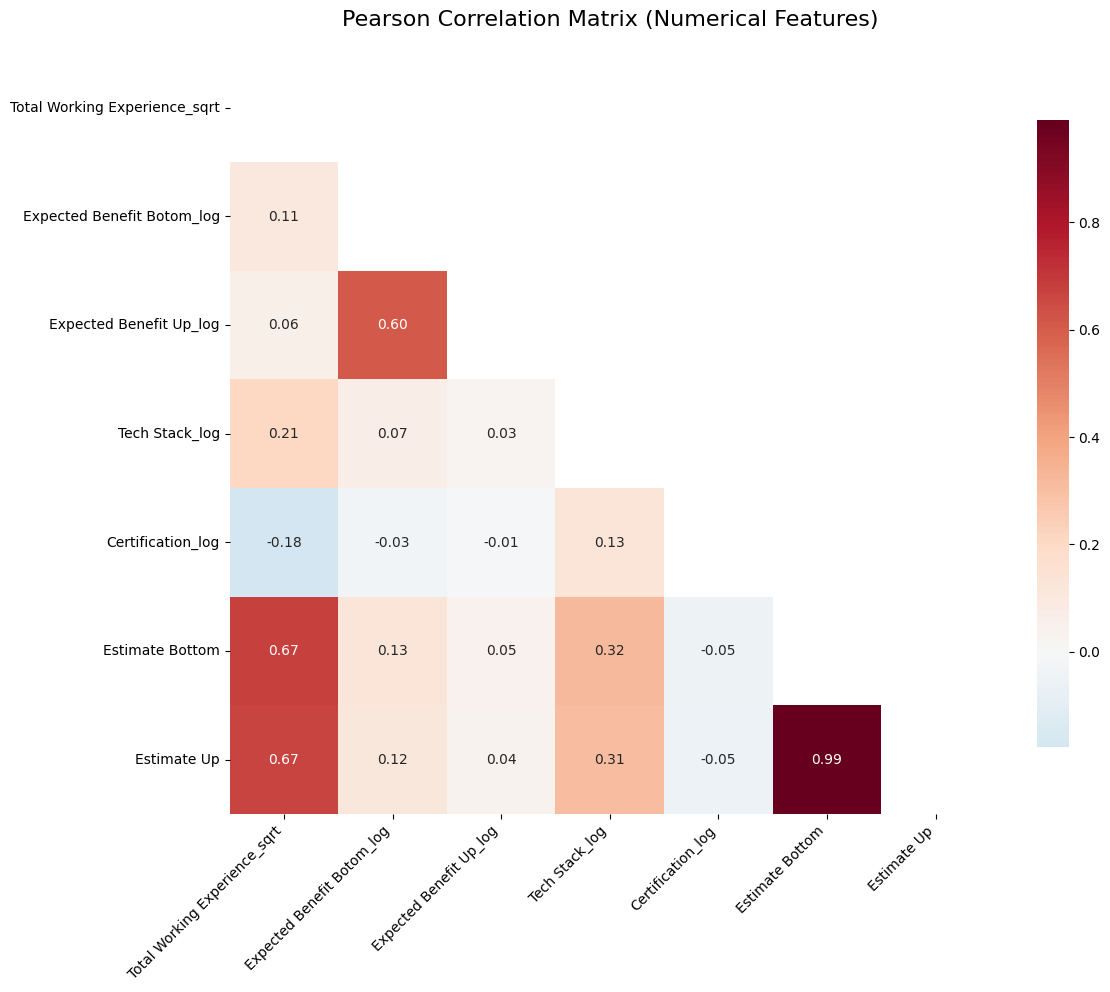


=== CRAMER'S V MATRIX ===
Categorical columns: ['Position_Seniority_Encoded', 'Position_Function_Encoded', 'City_Encoded', 'Candidate_Level_Encoded']


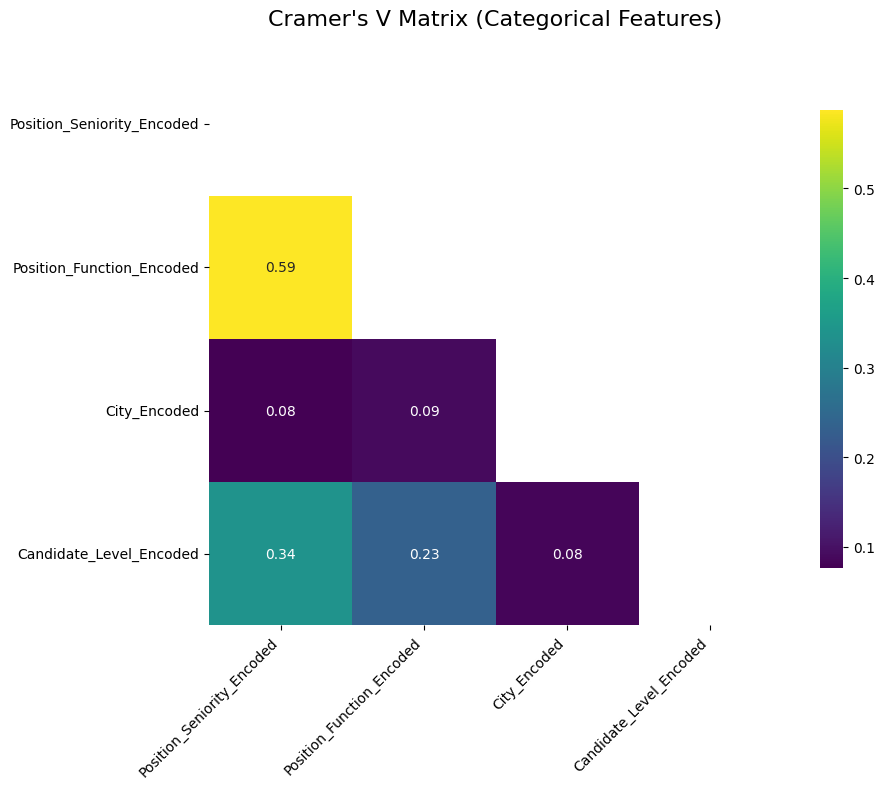


=== CORRELATION WITH TARGET VARIABLES ===


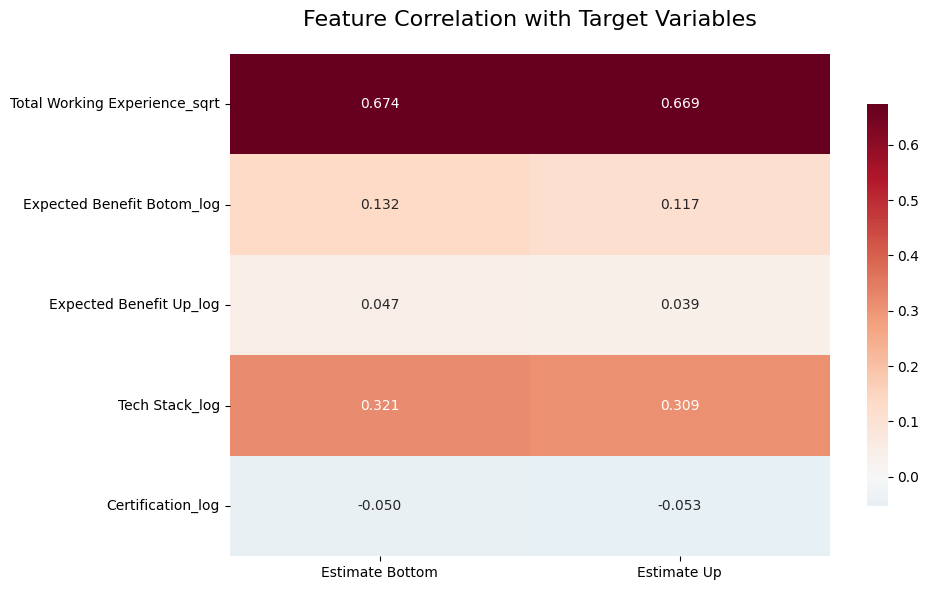


=== TOP CORRELATIONS WITH TARGETS ===
Estimate Bottom correlations:
Total Working Experience_sqrt    0.673893
Tech Stack_log                   0.321313
Expected Benefit Botom_log       0.131634
Certification_log                0.049885
Expected Benefit Up_log          0.046826
Name: Estimate Bottom, dtype: float64

Estimate Up correlations:
Total Working Experience_sqrt    0.669319
Tech Stack_log                   0.309197
Expected Benefit Botom_log       0.116954
Certification_log                0.053267
Expected Benefit Up_log          0.039401
Name: Estimate Up, dtype: float64

=== HIGHLY CORRELATED FEATURE PAIRS (>0.8) ===
Estimate Bottom <-> Estimate Up: 0.990

=== FEATURE IMPORTANCE FOR TARGET PREDICTION ===


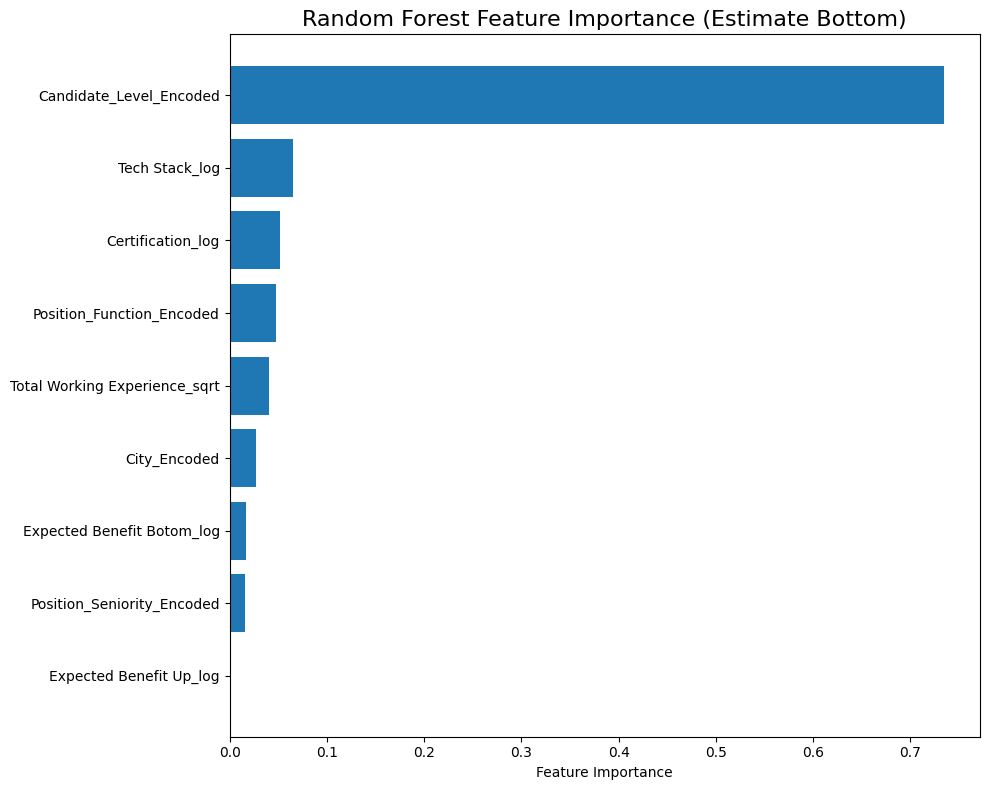

Top 10 most important features:
                         feature  importance
2        Expected Benefit Up_log    0.001478
5     Position_Seniority_Encoded    0.015355
1     Expected Benefit Botom_log    0.016691
7                   City_Encoded    0.026842
0  Total Working Experience_sqrt    0.040674
6      Position_Function_Encoded    0.047554
4              Certification_log    0.051523
3                 Tech Stack_log    0.064968
8        Candidate_Level_Encoded    0.734915


In [87]:
# Visualization and Correlation Analysis
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

# Function untuk hitung Cramer's V
def cramers_v(x, y):
    """Calculate Cramer's V statistic for categorical-categorical association"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# 1. PEARSON CORRELATION untuk numerical features
print("=== PEARSON CORRELATION MATRIX ===")
numerical_cols = [col for col in df_final.columns if df_final[col].dtype in ['int64', 'float64']]
print(f"Numerical columns: {numerical_cols}")

# Create correlation matrix
corr_matrix = df_final[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Pearson Correlation Matrix (Numerical Features)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. CRAMER'S V untuk categorical features  
print("\n=== CRAMER'S V MATRIX ===")
categorical_cols = [col for col in df_final.columns if col.endswith('_Encoded') or col in ['Education 2', 'Education 3', 'Notice Period']]
print(f"Categorical columns: {categorical_cols}")

if len(categorical_cols) > 1:
    # Create Cramer's V matrix
    cramers_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
    
    for col1 in categorical_cols:
        for col2 in categorical_cols:
            if col1 == col2:
                cramers_matrix.loc[col1, col2] = 1.0
            else:
                try:
                    cramers_matrix.loc[col1, col2] = cramers_v(df_final[col1].fillna(-1), df_final[col2].fillna(-1))
                except:
                    cramers_matrix.loc[col1, col2] = 0.0
    
    # Convert to numeric
    cramers_matrix = cramers_matrix.astype(float)
    
    # Plot Cramer's V heatmap
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(cramers_matrix, dtype=bool))
    sns.heatmap(cramers_matrix,
                mask=mask,
                annot=True,
                cmap='viridis',
                square=True,
                fmt='.2f',
                cbar_kws={"shrink": .8})
    plt.title("Cramer's V Matrix (Categorical Features)", fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# 3. CORRELATION dengan TARGET VARIABLES
print("\n=== CORRELATION WITH TARGET VARIABLES ===")

# Pearson correlation dengan targets
target_corr = df_final[numerical_cols].corr()[['Estimate Bottom', 'Estimate Up']].drop(['Estimate Bottom', 'Estimate Up'])

plt.figure(figsize=(10, 6))
sns.heatmap(target_corr, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title('Feature Correlation with Target Variables', fontsize=16, pad=20)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. TOP CORRELATIONS
print("\n=== TOP CORRELATIONS WITH TARGETS ===")
print("Estimate Bottom correlations:")
bottom_corr = target_corr['Estimate Bottom'].abs().sort_values(ascending=False)
print(bottom_corr.head(10))

print("\nEstimate Up correlations:")
up_corr = target_corr['Estimate Up'].abs().sort_values(ascending=False)
print(up_corr.head(10))

# 5. HIGHLY CORRELATED FEATURE PAIRS
print("\n=== HIGHLY CORRELATED FEATURE PAIRS (>0.8) ===")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            high_corr_pairs.append((
                corr_matrix.columns[i], 
                corr_matrix.columns[j], 
                corr_val
            ))

if high_corr_pairs:
    for pair in high_corr_pairs:
        print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.3f}")
else:
    print("No highly correlated pairs found (>0.8)")

# 6. FEATURE IMPORTANCE PLOT (bonus)
print("\n=== FEATURE IMPORTANCE FOR TARGET PREDICTION ===")
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = df_final.drop(['Estimate Bottom', 'Estimate Up'], axis=1).fillna(0)
y_bottom = df_final['Estimate Bottom'].fillna(df_final['Estimate Bottom'].median())

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y_bottom)

# Plot feature importance
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(range(len(importance_df)), importance_df['importance'])
plt.yticks(range(len(importance_df)), importance_df['feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance (Estimate Bottom)', fontsize=16)
plt.tight_layout()
plt.show()

print("Top 10 most important features:")
print(importance_df.tail(10))

In [88]:
print("=== VOTING REGRESSION FROM BEST MODELS ===")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import VotingRegressor, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.base import clone
import warnings
warnings.filterwarnings("ignore")

print("✅ Libraries imported successfully!")

=== VOTING REGRESSION FROM BEST MODELS ===
✅ Libraries imported successfully!


In [89]:
print("\n=== CREATING VOTING REGRESSION ENSEMBLES ===")

# Select top models for voting
top_n_models = 5  # Use top 5 models
top_models = df_individual_sorted.head(top_n_models)
print(f"Using top {top_n_models} models for voting ensemble:")
for idx, row in top_models.iterrows():
    print(f"  {idx+1}. {row['Model']} (CV MAE: {row['CV_MAE_Avg']:,.0f})")

# Create voting regression variants
voting_regressors = {}

# 1. Equal Weight Voting (Top 3)
top_3_models = [(name, best_models_config[name]) for name in top_models.head(3)['Model']]
voting_regressors['Voting_Top3_Equal'] = VotingRegressor(
    estimators=top_3_models,
    weights=None,  # Equal weights
    n_jobs=-1
)

# 2. Equal Weight Voting (Top 5)
top_5_models = [(name, best_models_config[name]) for name in top_models.head(5)['Model']]
voting_regressors['Voting_Top5_Equal'] = VotingRegressor(
    estimators=top_5_models,
    weights=None,
    n_jobs=-1
)

# 3. Weighted Voting (Top 3) - Inverse MAE weights
top_3_maes = top_models.head(3)['CV_MAE_Avg'].values
weights_3 = 1 / top_3_maes
weights_3 = weights_3 / weights_3.sum()  # Normalize
voting_regressors['Voting_Top3_Weighted'] = VotingRegressor(
    estimators=top_3_models,
    weights=weights_3,
    n_jobs=-1
)

# 4. Weighted Voting (Top 5) - Inverse MAE weights
top_5_maes = top_models.head(5)['CV_MAE_Avg'].values
weights_5 = 1 / top_5_maes
weights_5 = weights_5 / weights_5.sum()  # Normalize
voting_regressors['Voting_Top5_Weighted'] = VotingRegressor(
    estimators=top_5_models,
    weights=weights_5,
    n_jobs=-1
)

# 5. Custom Weighted Voting (Emphasize best performers)
# Give more weight to top 2 models
custom_weights = np.array([0.4, 0.3, 0.2, 0.1])[:len(top_models.head(4))]
custom_weights = custom_weights / custom_weights.sum()
top_4_models = [(name, best_models_config[name]) for name in top_models.head(4)['Model']]
voting_regressors['Voting_Top4_Custom'] = VotingRegressor(
    estimators=top_4_models,
    weights=custom_weights,
    n_jobs=-1
)

print(f"\n✅ Created {len(voting_regressors)} voting regression variants:")
for name, voting_reg in voting_regressors.items():
    print(f"  • {name}")
    if hasattr(voting_reg, 'weights') and voting_reg.weights is not None:
        print(f"    Weights: {[f'{w:.3f}' for w in voting_reg.weights]}")
    else:
        print(f"    Weights: Equal")
df


=== CREATING VOTING REGRESSION ENSEMBLES ===
Using top 5 models for voting ensemble:
  1. Bagging_Ultra1 (CV MAE: 1,044,424)
  2. Bagging_Ultra3 (CV MAE: 1,052,785)
  3. RandomForest_Optimized (CV MAE: 1,055,667)
  4. Bagging_Simple (CV MAE: 1,071,119)
  5. GradientBoosting_Tuned (CV MAE: 1,152,615)

✅ Created 5 voting regression variants:
  • Voting_Top3_Equal
    Weights: Equal
  • Voting_Top5_Equal
    Weights: Equal
  • Voting_Top3_Weighted
    Weights: ['0.335', '0.333', '0.332']
  • Voting_Top5_Weighted
    Weights: ['0.206', '0.204', '0.203', '0.201', '0.186']
  • Voting_Top4_Custom
    Weights: ['0.400', '0.300', '0.200', '0.100']


,ID,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Education 2,Expected Benefit Botom,Expected Benefit Up,Tech Stack,...,university_name_1,is_public_1,university_tier_2,university_type_2,university_prestige_score_2,is_top_university_2,university_name_2,is_public_2,max_prestige_score,Highest_University_Tier
0,SKU-WENU1319,Web Developer,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,SMK Negeri 2 Tasikmalaya (2019 - 2023)\nSistem...,0,0,12,...,Other Private,0,High School,High School,1,0,High School,0,2,Tier 6 (Other Private)
1,SKU-FUNU1303,Full Stack Developer,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,NaN,0,0,15,...,UNPAD,1,Unknown,Unknown,0,0,Unknown,0,8,Tier 2 (Prestigious)
2,SKU-JUNU1052,Junior Web Developer,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,Purwadhika Digital Technology School (2024)\nF...,0,0,11,...,Other Public,1,Unknown/Other,Unknown,0,0,Unknown,0,3,Tier 5 (Other Public)
3,SKU-JANU420,Java Developer,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",NaN,0,0,20,...,UPI,1,Unknown,Unknown,0,0,Unknown,0,6,Tier 3 (Well-known)
4,SKU-NUNU1182,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",NaN,0,0,20,...,UPI,1,Unknown,Unknown,0,0,Unknown,0,6,Tier 3 (Well-known)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,SKU-FRNU1112,Frontend Developer,3,Mid-Level,"Bandung, West Java, Indonesia","Universitas Mahakarya Asia, Computer Science, ...","Pijar Camp, Fullstack Web Developer, May 2020",0,0,7,...,Other Private,0,Unknown/Other,Unknown,0,0,Unknown,0,2,Tier 6 (Other Private)
1156,SKU-FRNU1147,Front End Web Developer,1,Junior,"Bogor, Indonesia",Politeknik Negeri Media Kreatif - Diploma 4 Mu...,NaN,0,0,16,...,Other Public,1,Unknown,Unknown,0,0,Unknown,0,3,Tier 5 (Other Public)
1157,SKU-SONU1312,Software Engineer,3,Mid-Level,"Cibodas, Tangerang",Global Institute of Technology and Business - ...,NaN,0,0,13,...,Other Private,0,Unknown,Unknown,0,0,Unknown,0,2,Tier 6 (Other Private)
1158,SKU-IONU877,iOS Developer,4,Mid-Level,"Pasuruan, Indonesia","Indonesian Computer University, Computer Engin...",NaN,0,0,15,...,Other Public,1,Unknown,Unknown,0,0,Unknown,0,3,Tier 5 (Other Public)


In [90]:
print("\n=== EVALUATING VOTING REGRESSORS WITH CROSS-VALIDATION ===")

def evaluate_voting_regressor(voting_reg, X, y_bottom, y_up, model_name, cv_folds=10):
    """Evaluate voting regressor with cross-validation"""
    
    # Imputation strategy
    imputer = KNNImputer(n_neighbors=3, weights='distance')
    
    # Create pipeline
    pipe = Pipeline([
        ('imputer', imputer),
        ('voting_regressor', clone(voting_reg))
    ])
    
    results = {}
    
    # Evaluate for both targets
    for target_name, y_target in [('Bottom', y_bottom), ('Up', y_up)]:
        print(f"  Evaluating {model_name} for Estimate {target_name}...")
        
        # Cross-validation with more robust approach
        cv_scores = cross_val_score(
            pipe, X, y_target,
            cv=KFold(n_splits=cv_folds, shuffle=True, random_state=42),
            scoring='neg_mean_absolute_error',
            n_jobs=-1
        )
        
        cv_mae = -cv_scores.mean()
        cv_std = cv_scores.std()
        
        results[f'CV_MAE_{target_name}'] = cv_mae
        results[f'CV_STD_{target_name}'] = cv_std
        
        print(f"    CV MAE: {cv_mae:,.0f} ± {cv_std:,.0f}")
    
    # Calculate average CV MAE
    results['CV_MAE_Avg'] = (results['CV_MAE_Bottom'] + results['CV_MAE_Up']) / 2
    results['Model'] = model_name
    
    return results

# Evaluate voting regressors
voting_results = []

print(f"Starting voting regressor evaluation...")

for name, voting_reg in voting_regressors.items():
    try:
        print(f"\n[{len(voting_results)+1}/{len(voting_regressors)}] Evaluating {name}...")
        
        result = evaluate_voting_regressor(
            voting_reg, X_eval, y_bottom_eval, y_up_eval, name, cv_folds=10
        )
        voting_results.append(result)
        
        print(f"✅ {name} - Average CV MAE: {result['CV_MAE_Avg']:,.0f}")
        
    except Exception as e:
        print(f"❌ {name} failed: {str(e)[:50]}...")
        continue

# Display voting results
df_voting = pd.DataFrame(voting_results)
df_voting_sorted = df_voting.sort_values('CV_MAE_Avg').reset_index(drop=True)

print(f"\n🏆 VOTING REGRESSOR RANKINGS:")
print("=" * 80)
print(f"{'Rank':<4} {'Model':<25} {'Avg CV MAE':<12} {'Bottom MAE':<12} {'Up MAE':<12}")
print("-" * 80)

for idx, row in df_voting_sorted.iterrows():
    rank_emoji = "🥇" if idx == 0 else "🥈" if idx == 1 else "🥉" if idx == 2 else f"{idx+1:2d}."
    print(f"{rank_emoji:<4} {row['Model']:<25} {row['CV_MAE_Avg']:>11,.0f} "
          f"{row['CV_MAE_Bottom']:>11,.0f} {row['CV_MAE_Up']:>11,.0f}")


=== EVALUATING VOTING REGRESSORS WITH CROSS-VALIDATION ===
Starting voting regressor evaluation...

[1/5] Evaluating Voting_Top3_Equal...
  Evaluating Voting_Top3_Equal for Estimate Bottom...
    CV MAE: 840,588 ± 87,443
  Evaluating Voting_Top3_Equal for Estimate Up...
    CV MAE: 840,588 ± 87,443
  Evaluating Voting_Top3_Equal for Estimate Up...
    CV MAE: 1,254,384 ± 124,676
✅ Voting_Top3_Equal - Average CV MAE: 1,047,486

[2/5] Evaluating Voting_Top5_Equal...
  Evaluating Voting_Top5_Equal for Estimate Bottom...
    CV MAE: 1,254,384 ± 124,676
✅ Voting_Top3_Equal - Average CV MAE: 1,047,486

[2/5] Evaluating Voting_Top5_Equal...
  Evaluating Voting_Top5_Equal for Estimate Bottom...
    CV MAE: 844,541 ± 88,548
  Evaluating Voting_Top5_Equal for Estimate Up...
    CV MAE: 844,541 ± 88,548
  Evaluating Voting_Top5_Equal for Estimate Up...
    CV MAE: 1,259,001 ± 126,208
✅ Voting_Top5_Equal - Average CV MAE: 1,051,771

[3/5] Evaluating Voting_Top3_Weighted...
  Evaluating Voting_Top

In [91]:
print("\n=== DETAILED CROSS-VALIDATION FOLD ANALYSIS ===")

def detailed_cv_analysis(model, X, y_bottom, y_up, model_name, cv_folds=10):
    """Detailed analysis of CV performance across folds"""
    
    # Imputation strategy
    imputer = KNNImputer(n_neighbors=3, weights='distance')
    
    # Create pipeline
    pipe = Pipeline([
        ('imputer', imputer),
        ('model', clone(model))
    ])
    
    # KFold with fixed random state for reproducibility
    kfold = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    fold_results = {
        'fold': [],
        'mae_bottom': [],
        'mae_up': [],
        'mae_avg': []
    }
    
    print(f"\nDetailed fold analysis for {model_name}:")
    print("=" * 60)
    print(f"{'Fold':<4} {'Bottom MAE':<12} {'Up MAE':<12} {'Avg MAE':<12}")
    print("-" * 60)
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X), 1):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_bottom_train, y_bottom_val = y_bottom.iloc[train_idx], y_bottom.iloc[val_idx]
        y_up_train, y_up_val = y_up.iloc[train_idx], y_up.iloc[val_idx]
        
        # Train and predict for bottom
        pipe.fit(X_train_fold, y_bottom_train)
        pred_bottom = pipe.predict(X_val_fold)
        pred_bottom = np.maximum(pred_bottom, 0)
        mae_bottom = mean_absolute_error(y_bottom_val, pred_bottom)
        
        # Train and predict for up
        pipe.fit(X_train_fold, y_up_train)
        pred_up = pipe.predict(X_val_fold)
        pred_up = np.maximum(pred_up, pred_bottom)  # Ensure Up >= Bottom
        mae_up = mean_absolute_error(y_up_val, pred_up)
        
        mae_avg = (mae_bottom + mae_up) / 2
        
        fold_results['fold'].append(fold)
        fold_results['mae_bottom'].append(mae_bottom)
        fold_results['mae_up'].append(mae_up)
        fold_results['mae_avg'].append(mae_avg)
        
        print(f"{fold:<4} {mae_bottom:>11,.0f} {mae_up:>11,.0f} {mae_avg:>11,.0f}")
    
    # Summary statistics
    print("-" * 60)
    print(f"{'Mean':<4} {np.mean(fold_results['mae_bottom']):>11,.0f} "
          f"{np.mean(fold_results['mae_up']):>11,.0f} {np.mean(fold_results['mae_avg']):>11,.0f}")
    print(f"{'Std':<4} {np.std(fold_results['mae_bottom']):>11,.0f} "
          f"{np.std(fold_results['mae_up']):>11,.0f} {np.std(fold_results['mae_avg']):>11,.0f}")
    
    return fold_results

# Analyze top 3 models (2 individual + 1 voting)
models_to_analyze = []

# Top individual model
if len(df_individual_sorted) > 0:
    top_individual = df_individual_sorted.iloc[0]
    models_to_analyze.append((
        best_models_config[top_individual['Model']], 
        top_individual['Model']
    ))

# Top voting model
if len(df_voting_sorted) > 0:
    top_voting = df_voting_sorted.iloc[0]
    models_to_analyze.append((
        voting_regressors[top_voting['Model']], 
        top_voting['Model']
    ))

# Second best individual model
if len(df_individual_sorted) > 1:
    second_individual = df_individual_sorted.iloc[1]
    models_to_analyze.append((
        best_models_config[second_individual['Model']], 
        second_individual['Model']
    ))

print(f"Analyzing {len(models_to_analyze)} models in detail...")

detailed_results = {}
for model, name in models_to_analyze:
    try:
        detailed_results[name] = detailed_cv_analysis(
            model, X_eval, y_bottom_eval, y_up_eval, name, cv_folds=10
        )
    except Exception as e:
        print(f"❌ {name} detailed analysis failed: {str(e)[:50]}...")
        continue
df


=== DETAILED CROSS-VALIDATION FOLD ANALYSIS ===
Analyzing 3 models in detail...

Detailed fold analysis for Bagging_Ultra1:
Fold Bottom MAE   Up MAE       Avg MAE     
------------------------------------------------------------
1        973,419   1,423,802   1,198,610
1        973,419   1,423,802   1,198,610
2        953,780   1,436,298   1,195,039
2        953,780   1,436,298   1,195,039
3        716,539   1,060,677     888,608
3        716,539   1,060,677     888,608
4        847,284   1,286,408   1,066,846
4        847,284   1,286,408   1,066,846
5        880,303   1,277,846   1,079,075
5        880,303   1,277,846   1,079,075
6        745,351   1,151,538     948,444
6        745,351   1,151,538     948,444
7        794,091   1,144,372     969,232
7        794,091   1,144,372     969,232
8        852,022   1,243,546   1,047,784
8        852,022   1,243,546   1,047,784
9        876,321   1,337,961   1,107,141
9        876,321   1,337,961   1,107,141
10       747,437   1,139,491    

,ID,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Education 2,Expected Benefit Botom,Expected Benefit Up,Tech Stack,...,university_name_1,is_public_1,university_tier_2,university_type_2,university_prestige_score_2,is_top_university_2,university_name_2,is_public_2,max_prestige_score,Highest_University_Tier
0,SKU-WENU1319,Web Developer,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,SMK Negeri 2 Tasikmalaya (2019 - 2023)\nSistem...,0,0,12,...,Other Private,0,High School,High School,1,0,High School,0,2,Tier 6 (Other Private)
1,SKU-FUNU1303,Full Stack Developer,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,NaN,0,0,15,...,UNPAD,1,Unknown,Unknown,0,0,Unknown,0,8,Tier 2 (Prestigious)
2,SKU-JUNU1052,Junior Web Developer,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,Purwadhika Digital Technology School (2024)\nF...,0,0,11,...,Other Public,1,Unknown/Other,Unknown,0,0,Unknown,0,3,Tier 5 (Other Public)
3,SKU-JANU420,Java Developer,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",NaN,0,0,20,...,UPI,1,Unknown,Unknown,0,0,Unknown,0,6,Tier 3 (Well-known)
4,SKU-NUNU1182,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",NaN,0,0,20,...,UPI,1,Unknown,Unknown,0,0,Unknown,0,6,Tier 3 (Well-known)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,SKU-FRNU1112,Frontend Developer,3,Mid-Level,"Bandung, West Java, Indonesia","Universitas Mahakarya Asia, Computer Science, ...","Pijar Camp, Fullstack Web Developer, May 2020",0,0,7,...,Other Private,0,Unknown/Other,Unknown,0,0,Unknown,0,2,Tier 6 (Other Private)
1156,SKU-FRNU1147,Front End Web Developer,1,Junior,"Bogor, Indonesia",Politeknik Negeri Media Kreatif - Diploma 4 Mu...,NaN,0,0,16,...,Other Public,1,Unknown,Unknown,0,0,Unknown,0,3,Tier 5 (Other Public)
1157,SKU-SONU1312,Software Engineer,3,Mid-Level,"Cibodas, Tangerang",Global Institute of Technology and Business - ...,NaN,0,0,13,...,Other Private,0,Unknown,Unknown,0,0,Unknown,0,2,Tier 6 (Other Private)
1158,SKU-IONU877,iOS Developer,4,Mid-Level,"Pasuruan, Indonesia","Indonesian Computer University, Computer Engin...",NaN,0,0,15,...,Other Public,1,Unknown,Unknown,0,0,Unknown,0,3,Tier 5 (Other Public)


In [92]:
print("\n=== FINAL MODEL SELECTION AND TRAINING ===")

# Select the best performing model
champion_model = None
champion_name = None
champion_cv_mae = float('inf')

if len(df_all_sorted) > 0:
    champion = df_all_sorted.iloc[0]
    champion_name = champion['Model']
    champion_cv_mae = champion['CV_MAE_Avg']
    
    # Get the actual model object
    if champion['Type'] == 'Voting':
        champion_model = voting_regressors[champion_name]
    else:
        champion_model = best_models_config[champion_name]
    
    print(f"🏆 CHAMPION MODEL SELECTED:")
    print(f"  • Name: {champion_name}")
    print(f"  • Type: {champion['Type']}")
    print(f"  • CV MAE: {champion_cv_mae:,.0f}")
    
    # Create final pipeline
    final_imputer = KNNImputer(n_neighbors=3, weights='distance')
    champion_pipeline_bottom = Pipeline([
        ('imputer', final_imputer),
        ('model', clone(champion_model))
    ])
    
    champion_pipeline_up = Pipeline([
        ('imputer', clone(final_imputer)),
        ('model', clone(champion_model))
    ])
    
    # Train on full dataset
    print(f"\n🚀 Training champion model on full dataset...")
    X_full = df_ultra_clean.drop(['Estimate Bottom', 'Estimate Up'], axis=1)
    y_bottom_full = df_ultra_clean['Estimate Bottom']
    y_up_full = df_ultra_clean['Estimate Up']
    
    print(f"Training data shape: {X_full.shape}")
    
    # Train bottom estimator
    print("Training bottom estimator...")
    champion_pipeline_bottom.fit(X_full, y_bottom_full)
    
    # Train up estimator
    print("Training up estimator...")
    champion_pipeline_up.fit(X_full, y_up_full)
    
    print(f"\n✅ CHAMPION MODEL READY FOR PREDICTION!")
    print(f"Expected CV MAE: {champion_cv_mae:,.0f}")
    
    # Store final model info
    final_champion_info = {
        'name': champion_name,
        'type': champion['Type'],
        'cv_mae': champion_cv_mae,
        'cv_mae_bottom': champion['CV_MAE_Bottom'],
        'cv_mae_up': champion['CV_MAE_Up'],
        'pipeline_bottom': champion_pipeline_bottom,
        'pipeline_up': champion_pipeline_up,
        'is_voting': champion['Type'] == 'Voting'
    }
    
    print(f"\n📊 FINAL CHAMPION SUMMARY:")
    print(f"  • Model: {final_champion_info['name']}")
    print(f"  • Type: {final_champion_info['type']}")
    print(f"  • Is Voting: {final_champion_info['is_voting']}")
    print(f"  • CV MAE Bottom: {final_champion_info['cv_mae_bottom']:,.0f}")
    print(f"  • CV MAE Up: {final_champion_info['cv_mae_up']:,.0f}")
    print(f"  • CV MAE Average: {final_champion_info['cv_mae']:,.0f}")

else:
    print("❌ No models to select from!")

print(f"\n🎉 VOTING REGRESSION ANALYSIS COMPLETED!")


=== FINAL MODEL SELECTION AND TRAINING ===
🏆 CHAMPION MODEL SELECTED:
  • Name: Bagging_Ultra1
  • Type: Individual
  • CV MAE: 1,044,424

🚀 Training champion model on full dataset...
Training data shape: (1088, 22)
Training bottom estimator...
Training up estimator...
Training up estimator...

✅ CHAMPION MODEL READY FOR PREDICTION!
Expected CV MAE: 1,044,424

📊 FINAL CHAMPION SUMMARY:
  • Model: Bagging_Ultra1
  • Type: Individual
  • Is Voting: False
  • CV MAE Bottom: 838,655
  • CV MAE Up: 1,250,194
  • CV MAE Average: 1,044,424

🎉 VOTING REGRESSION ANALYSIS COMPLETED!

✅ CHAMPION MODEL READY FOR PREDICTION!
Expected CV MAE: 1,044,424

📊 FINAL CHAMPION SUMMARY:
  • Model: Bagging_Ultra1
  • Type: Individual
  • Is Voting: False
  • CV MAE Bottom: 838,655
  • CV MAE Up: 1,250,194
  • CV MAE Average: 1,044,424

🎉 VOTING REGRESSION ANALYSIS COMPLETED!


In [93]:
print("=== ULTRA-STRICT FEATURE SELECTION FOR OVERFITTING PREVENTION ===")

import numpy as np
from sklearn.feature_selection import (
    SelectKBest, f_regression, RFE, SelectFromModel,
    VarianceThreshold, mutual_info_regression
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.inspection import permutation_importance

def ultra_strict_feature_selection(df, target_cols, max_features=15):
    """
    Ultra-strict feature selection dengan multiple methods
    untuk mencegah overfitting secara agresif
    """
    
    # Pisahkan features dan targets
    X = df.drop(columns=target_cols)
    y_bottom = df[target_cols[0]]
    y_up = df[target_cols[1]]
    
    print(f"🔍 Starting with {X.shape[1]} features")
    
    # ========================================
    # STEP 1: VARIANCE THRESHOLD (Hapus fitur dengan variance rendah)
    # ========================================
    print("\n📊 STEP 1: Removing Low Variance Features")
    
    # Threshold yang lebih ketat: variance < 0.01
    variance_selector = VarianceThreshold(threshold=0.01)
    X_var = variance_selector.fit_transform(X)
    
    # Get selected feature names
    var_selected_mask = variance_selector.get_support()
    var_selected_features = X.columns[var_selected_mask].tolist()
    
    print(f"  • Removed {X.shape[1] - len(var_selected_features)} low variance features")
    print(f"  • Remaining: {len(var_selected_features)} features")
    
    # ========================================
    # STEP 2: CORRELATION-BASED REMOVAL (Lebih Agresif)
    # ========================================
    print("\n🔗 STEP 2: Aggressive Correlation-Based Removal")
    
    X_var_df = pd.DataFrame(X_var, columns=var_selected_features)
    corr_matrix = X_var_df.corr().abs()
    
    # Threshold yang lebih ketat: correlation > 0.7 (sebelumnya 0.8)
    correlation_threshold = 0.7
    
    # Find highly correlated pairs
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > correlation_threshold:
                # Calculate target correlation untuk decide mana yang di-drop
                feat1 = corr_matrix.columns[i]
                feat2 = corr_matrix.columns[j]
                
                corr1 = abs(X_var_df[feat1].corr(y_bottom))
                corr2 = abs(X_var_df[feat2].corr(y_bottom))
                
                # Drop yang correlation dengan target lebih rendah
                if corr1 < corr2:
                    high_corr_pairs.append(feat1)
                else:
                    high_corr_pairs.append(feat2)
    
    # Remove duplicates dan drop features
    features_to_drop = list(set(high_corr_pairs))
    corr_selected_features = [f for f in var_selected_features if f not in features_to_drop]
    
    print(f"  • Removed {len(features_to_drop)} highly correlated features (>{correlation_threshold})")
    print(f"  • Remaining: {len(corr_selected_features)} features")
    
    # ========================================
    # STEP 3: MUTUAL INFORMATION SELECTION
    # ========================================
    print("\n🧠 STEP 3: Mutual Information Selection")
    
    X_corr = X_var_df[corr_selected_features]
    
    # Calculate mutual information dengan target bottom
    mi_scores = mutual_info_regression(X_corr, y_bottom, random_state=42)
    
    # Select top 50% berdasarkan mutual information
    mi_top_n = max(10, len(corr_selected_features) // 2)
    mi_selector = SelectKBest(mutual_info_regression, k=mi_top_n)
    X_mi = mi_selector.fit_transform(X_corr, y_bottom)
    
    mi_selected_mask = mi_selector.get_support()
    mi_selected_features = np.array(corr_selected_features)[mi_selected_mask].tolist()
    
    print(f"  • Selected top {mi_top_n} features by mutual information")
    print(f"  • Remaining: {len(mi_selected_features)} features")
    
    # ========================================
    # STEP 4: LASSO-BASED SELECTION (Alpha lebih besar)
    # ========================================
    print("\n🎯 STEP 4: LASSO-Based Feature Selection")
    
    X_mi_df = pd.DataFrame(X_mi, columns=mi_selected_features)
    
    # LassoCV dengan alpha range yang lebih besar untuk regularization lebih kuat
    lasso_cv = LassoCV(
        alphas=np.logspace(-1, 3, 100),  # Alpha range: 0.1 to 1000
        cv=5,
        random_state=42,
        max_iter=2000
    )
    
    lasso_cv.fit(X_mi_df, y_bottom)
    
    # Select features dengan coefficient != 0
    lasso_selected_mask = lasso_cv.coef_ != 0
    lasso_selected_features = np.array(mi_selected_features)[lasso_selected_mask].tolist()
    
    print(f"  • LASSO alpha selected: {lasso_cv.alpha_:.4f}")
    print(f"  • Selected {len(lasso_selected_features)} features with non-zero coefficients")
    print(f"  • Remaining: {len(lasso_selected_features)} features")
    
    # ========================================
    # STEP 5: RECURSIVE FEATURE ELIMINATION (Final selection)
    # ========================================
    print("\n🔄 STEP 5: Recursive Feature Elimination")
    
    if len(lasso_selected_features) > max_features:
        X_lasso = X_mi_df[lasso_selected_features]
        
        # RFE dengan Random Forest yang sederhana untuk avoid overfitting
        rf_simple = RandomForestRegressor(
            n_estimators=50,  # Sedikit trees
            max_depth=5,      # Shallow
            min_samples_leaf=20,  # Conservative
            random_state=42
        )
        
        rfe = RFE(estimator=rf_simple, n_features_to_select=max_features)
        rfe.fit(X_lasso, y_bottom)
        
        rfe_selected_mask = rfe.support_
        final_selected_features = np.array(lasso_selected_features)[rfe_selected_mask].tolist()
    else:
        final_selected_features = lasso_selected_features
    
    print(f"  • Final selection: {len(final_selected_features)} features")
    
    # ========================================
    # STEP 6: VALIDATION DENGAN PERMUTATION IMPORTANCE
    # ========================================
    print("\n✅ STEP 6: Validation with Permutation Importance")
    
    X_final = df[final_selected_features]
    
    # Simple model untuk validation
    val_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=8,
        min_samples_leaf=15,
        random_state=42
    )
    
    val_model.fit(X_final, y_bottom)
    
    # Permutation importance
    perm_importance = permutation_importance(
        val_model, X_final, y_bottom,
        n_repeats=5,
        random_state=42
    )
    
    # Show feature importance
    importance_df = pd.DataFrame({
        'feature': final_selected_features,
        'importance_mean': perm_importance.importances_mean,
        'importance_std': perm_importance.importances_std
    }).sort_values('importance_mean', ascending=False)
    
    print(f"\n🏆 FINAL SELECTED FEATURES:")
    for i, row in importance_df.iterrows():
        print(f"  {row['feature']:<30}: {row['importance_mean']:.4f} ± {row['importance_std']:.4f}")
    
    # ========================================
    # APPLY SELECTION TO DATASET
    # ========================================
    df_selected = df[final_selected_features + target_cols].copy()
    
    feature_selection_info = {
        'original_features': X.shape[1],
        'variance_selected': len(var_selected_features),
        'correlation_selected': len(corr_selected_features),
        'mi_selected': len(mi_selected_features),
        'lasso_selected': len(lasso_selected_features),
        'final_selected': len(final_selected_features),
        'selected_features': final_selected_features,
        'lasso_alpha': lasso_cv.alpha_,
        'importance_ranking': importance_df
    }
    
    return df_selected, feature_selection_info

# Terapkan ultra-strict feature selection
print("🚀 Applying Ultra-Strict Feature Selection...")
df_ultra_selected, selection_info = ultra_strict_feature_selection(
    df_ultra_clean, 
    target_cols=['Estimate Bottom', 'Estimate Up'], 
    max_features=15  # Maksimal 15 features untuk avoid overfitting
)

print(f"\n📊 FEATURE SELECTION SUMMARY:")
print(f"Original features: {selection_info['original_features']}")
print(f"After variance threshold: {selection_info['variance_selected']}")
print(f"After correlation removal: {selection_info['correlation_selected']}")
print(f"After mutual information: {selection_info['mi_selected']}")
print(f"After LASSO selection: {selection_info['lasso_selected']}")
print(f"Final selected features: {selection_info['final_selected']}")
print(f"Reduction ratio: {(1 - selection_info['final_selected']/selection_info['original_features'])*100:.1f}%")

print(f"\n✅ Ultra-strict feature selection completed!")
print(f"New dataset shape: {df_ultra_selected.shape}")

=== ULTRA-STRICT FEATURE SELECTION FOR OVERFITTING PREVENTION ===
🚀 Applying Ultra-Strict Feature Selection...
🔍 Starting with 22 features

📊 STEP 1: Removing Low Variance Features
  • Removed 0 low variance features
  • Remaining: 22 features

🔗 STEP 2: Aggressive Correlation-Based Removal

🚀 Applying Ultra-Strict Feature Selection...
🔍 Starting with 22 features

📊 STEP 1: Removing Low Variance Features
  • Removed 0 low variance features
  • Remaining: 22 features

🔗 STEP 2: Aggressive Correlation-Based Removal
  • Removed 16 highly correlated features (>0.7)
  • Remaining: 6 features

🧠 STEP 3: Mutual Information Selection
  • Removed 16 highly correlated features (>0.7)
  • Remaining: 6 features

🧠 STEP 3: Mutual Information Selection
  • Selected top 10 features by mutual information
  • Remaining: 6 features

🎯 STEP 4: LASSO-Based Feature Selection
  • Selected top 10 features by mutual information
  • Remaining: 6 features

🎯 STEP 4: LASSO-Based Feature Selection
  • LASSO alpha

In [94]:
print("=== ULTRA-REGULARIZED MODELS FOR OVERFITTING PREVENTION ===")

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, ElasticNet, LassoCV
from sklearn.svm import SVR

# MODELS DENGAN REGULARIZATION YANG SANGAT KUAT
ultra_regularized_models = {
    
    # 1. BAGGING DENGAN REGULARIZATION EKSTREM
    "Bagging_UltraRegularized": BaggingRegressor(
        estimator=DecisionTreeRegressor(
            max_depth=4,              # SANGAT SHALLOW (sebelumnya 8)
            min_samples_split=50,     # SANGAT KONSERVATIF (sebelumnya 20)
            min_samples_leaf=25,      # SANGAT KONSERVATIF (sebelumnya 10)
            max_features=0.3,         # HANYA 30% FEATURES (sebelumnya 0.6)
            ccp_alpha=0.05,          # STRONG PRUNING (sebelumnya 0.01)
            min_impurity_decrease=0.01  # TAMBAHAN REGULARIZATION
        ),
        n_estimators=50,             # FEWER ESTIMATORS (sebelumnya 100)
        max_samples=0.6,             # SMALLER SUBSAMPLE (sebelumnya 0.8)
        max_features=0.5,            # FEWER FEATURES (sebelumnya 0.7)
        random_state=42,
        bootstrap=True,
        oob_score=True
    ),
    
    # 2. RANDOM FOREST DENGAN EXTREME REGULARIZATION
    "RandomForest_UltraRegularized": RandomForestRegressor(
        n_estimators=50,             # REDUCED (sebelumnya 400)
        max_depth=3,                 # VERY SHALLOW (sebelumnya 20)
        min_samples_split=100,       # VERY CONSERVATIVE (sebelumnya 8)
        min_samples_leaf=50,         # VERY CONSERVATIVE (sebelumnya 4)
        max_features=0.3,            # MINIMAL FEATURES (sebelumnya 'sqrt')
        min_impurity_decrease=0.01,  # ADDITIONAL REGULARIZATION
        ccp_alpha=0.01,             # COST COMPLEXITY PRUNING
        bootstrap=True,
        oob_score=True,
        random_state=42,
        n_jobs=-1
    ),
    
    # 3. RIDGE DENGAN VERY HIGH ALPHA
    "Ridge_UltraStrong": Ridge(
        alpha=10000.0,              # VERY HIGH ALPHA (sebelumnya 100.0)
        random_state=42,
        max_iter=5000
    ),
    
    # 4. ELASTIC NET DENGAN STRONG REGULARIZATION
    "ElasticNet_UltraStrong": ElasticNet(
        alpha=1.0,                  # HIGH ALPHA
        l1_ratio=0.7,              # MORE L1 PENALTY
        random_state=42,
        max_iter=5000
    ),
    
    # 5. LASSO DENGAN AUTO CROSS-VALIDATION
    "LassoCV_UltraStrong": LassoCV(
        alphas=np.logspace(0, 4, 100),  # HIGH ALPHA RANGE: 1 to 10000
        cv=10,                      # 10-FOLD CV UNTUK ALPHA SELECTION
        random_state=42,
        max_iter=5000
    ),
    
    # 6. SVR DENGAN STRONG REGULARIZATION (untuk diversity)
    "SVR_UltraRegularized": SVR(
        C=0.01,                     # VERY LOW C = HIGH REGULARIZATION
        gamma='scale',
        epsilon=0.5,                # LARGER EPSILON = MORE TOLERANCE
        kernel='rbf'
    ),
    
    # 7. BAGGING + RIDGE COMBINATION
    "Bagging_Ridge_Ultra": BaggingRegressor(
        estimator=Ridge(alpha=1000.0),  # HIGH ALPHA RIDGE
        n_estimators=30,            # FEWER ESTIMATORS
        max_samples=0.5,            # SMALLER SUBSAMPLE
        max_features=0.4,           # FEWER FEATURES
        random_state=42,
        bootstrap=True,
        oob_score=True
    )
}

print(f"✅ Defined {len(ultra_regularized_models)} ultra-regularized models:")
for name, model in ultra_regularized_models.items():
    print(f"  • {name}")

# PARAMETER EXPLANATION
print(f"\n📚 REGULARIZATION TECHNIQUES APPLIED:")
print(f"  🌳 Tree-based models:")
print(f"    • max_depth: 3-4 (very shallow)")
print(f"    • min_samples_split: 50-100 (very conservative)")
print(f"    • min_samples_leaf: 25-50 (prevent small leaves)")
print(f"    • max_features: 0.3 (use only 30% of features)")
print(f"    • ccp_alpha: 0.01-0.05 (cost complexity pruning)")
print(f"    • min_impurity_decrease: 0.01 (additional constraint)")
print(f"  📐 Linear models:")
print(f"    • Ridge alpha: 1000-10000 (very high L2 penalty)")
print(f"    • ElasticNet alpha: 1.0 with l1_ratio=0.7 (strong L1+L2)")
print(f"    • LassoCV: auto-select alpha from 1-10000 range")
print(f"  🎯 Ensemble models:")
print(f"    • n_estimators: 30-50 (fewer models)")
print(f"    • max_samples: 0.5-0.6 (smaller subsamples)")
print(f"    • max_features: 0.4-0.5 (feature subsampling)")

=== ULTRA-REGULARIZED MODELS FOR OVERFITTING PREVENTION ===
✅ Defined 7 ultra-regularized models:
  • Bagging_UltraRegularized
  • RandomForest_UltraRegularized
  • Ridge_UltraStrong
  • ElasticNet_UltraStrong
  • LassoCV_UltraStrong
  • SVR_UltraRegularized
  • Bagging_Ridge_Ultra

📚 REGULARIZATION TECHNIQUES APPLIED:
  🌳 Tree-based models:
    • max_depth: 3-4 (very shallow)
    • min_samples_split: 50-100 (very conservative)
    • min_samples_leaf: 25-50 (prevent small leaves)
    • max_features: 0.3 (use only 30% of features)
    • ccp_alpha: 0.01-0.05 (cost complexity pruning)
    • min_impurity_decrease: 0.01 (additional constraint)
  📐 Linear models:
    • Ridge alpha: 1000-10000 (very high L2 penalty)
    • ElasticNet alpha: 1.0 with l1_ratio=0.7 (strong L1+L2)
    • LassoCV: auto-select alpha from 1-10000 range
  🎯 Ensemble models:
    • n_estimators: 30-50 (fewer models)
    • max_samples: 0.5-0.6 (smaller subsamples)
    • max_features: 0.4-0.5 (feature subsampling)


In [96]:
print("=== ULTRA-ROBUST CROSS-VALIDATION FOR OVERFITTING DETECTION ===")

from sklearn.model_selection import (
    KFold, StratifiedKFold, TimeSeriesSplit, 
    RepeatedKFold, cross_validate, validation_curve
)
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

def ultra_robust_cv_evaluation(model, X, y_bottom, y_up, model_name, 
                              detect_overfitting=True):
    """
    Ultra-robust CV evaluation dengan multiple validation strategies
    untuk mendeteksi overfitting secara komprehensif
    """
    
    print(f"\n🔍 ULTRA-ROBUST CV EVALUATION: {model_name}")
    print("=" * 80)
    
    # ========================================
    # SETUP: ROBUST PREPROCESSING PIPELINE
    # ========================================
    
    # Pipeline dengan preprocessing yang robust
    robust_pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=1, weights='uniform')),  # Conservative imputation
        ('scaler', StandardScaler()),  # Standardization untuk numerical stability
        ('model', clone(model))
    ])
    
    results = {}
    
    # ========================================
    # CV STRATEGY 1: REPEATED K-FOLD (Gold Standard)
    # ========================================
    print(f"\n📊 CV STRATEGY 1: Repeated K-Fold (Most Robust)")
    
    repeated_kfold = RepeatedKFold(
        n_splits=5,      # 5-fold untuk balance antara bias-variance
        n_repeats=10,    # 10 repetisi = 50 total evaluations
        random_state=42
    )
    
    # Scoring metrics untuk comprehensive evaluation
    scoring_metrics = [
        'neg_mean_absolute_error',
        'neg_mean_squared_error', 
        'r2'
    ]
    
    for target_name, y_target in [('Bottom', y_bottom), ('Up', y_up)]:
        print(f"\n  Target: Estimate {target_name}")
        
        # Cross-validate dengan multiple metrics
        cv_results = cross_validate(
            robust_pipeline, X, y_target,
            cv=repeated_kfold,
            scoring=scoring_metrics,
            return_train_score=True,  # PENTING: Return training scores
            n_jobs=-1,
            verbose=0
        )
        
        # Calculate statistics
        test_mae = -cv_results['test_neg_mean_absolute_error']
        train_mae = -cv_results['train_neg_mean_absolute_error']
        test_r2 = cv_results['test_r2']
        train_r2 = cv_results['train_r2']
        
        # OVERFITTING DETECTION METRICS
        mae_gap = train_mae.mean() - test_mae.mean()  # Negative = overfitting
        r2_gap = train_r2.mean() - test_r2.mean()     # Positive = overfitting
        
        # Stability metrics
        test_mae_std = test_mae.std()
        test_r2_std = test_r2.std()
        
        results[f'repeated_kfold_{target_name.lower()}'] = {
            'test_mae_mean': test_mae.mean(),
            'test_mae_std': test_mae_std,
            'train_mae_mean': train_mae.mean(),
            'train_mae_std': train_mae.std(),
            'test_r2_mean': test_r2.mean(),
            'test_r2_std': test_r2_std,
            'train_r2_mean': train_r2.mean(),
            'train_r2_std': train_r2.std(),
            'mae_overfitting_gap': mae_gap,
            'r2_overfitting_gap': r2_gap,
            'cv_stability_mae': test_mae_std / test_mae.mean(),  # Coefficient of variation
            'cv_stability_r2': test_r2_std / abs(test_r2.mean()) if test_r2.mean() != 0 else float('inf')
        }
        
        print(f"    Test MAE:     {test_mae.mean():>8.0f} ± {test_mae_std:>6.0f}")
        print(f"    Train MAE:    {train_mae.mean():>8.0f} ± {train_mae.std():>6.0f}")
        print(f"    Test R²:      {test_r2.mean():>8.3f} ± {test_r2_std:>6.3f}")
        print(f"    Train R²:     {train_r2.mean():>8.3f} ± {train_r2.std():>6.3f}")
        
        # OVERFITTING ALERTS
        if mae_gap < -500:  # Training MAE significantly better than test MAE
            print(f"    🚨 MAE Overfitting Alert: Gap = {mae_gap:.0f}")
        if r2_gap > 0.1:    # Training R² significantly better than test R²
            print(f"    🚨 R² Overfitting Alert: Gap = {r2_gap:.3f}")
        if test_mae_std / test_mae.mean() > 0.3:  # High CV instability
            print(f"    ⚠️  High CV Instability: CoV = {test_mae_std/test_mae.mean():.3f}")
    
    # ========================================
    # CV STRATEGY 2: STRATIFIED K-FOLD (untuk target distribution)
    # ========================================
    print(f"\n📊 CV STRATEGY 2: Stratified K-Fold")
    
    # Create stratification bins untuk continuous targets
    def create_stratification_bins(y, n_bins=5):
        try:
            return pd.qcut(y, q=n_bins, labels=False, duplicates='drop')
        except:
            return pd.cut(y, bins=n_bins, labels=False, duplicates='drop')
    
    # Stratify berdasarkan target bottom
    strat_bins = create_stratification_bins(y_bottom, n_bins=5)
    
    stratified_kfold = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    )
    
    for target_name, y_target in [('Bottom', y_bottom), ('Up', y_up)]:
        print(f"\n  Target: Estimate {target_name}")
        
        cv_results = cross_validate(
            robust_pipeline, X, y_target,
            cv=stratified_kfold.split(X, strat_bins),  # Use stratification
            scoring=['neg_mean_absolute_error', 'r2'],
            return_train_score=True,
            n_jobs=-1
        )
        
        test_mae = -cv_results['test_neg_mean_absolute_error']
        train_mae = -cv_results['train_neg_mean_absolute_error']
        
        results[f'stratified_kfold_{target_name.lower()}'] = {
            'test_mae_mean': test_mae.mean(),
            'test_mae_std': test_mae.std(),
            'train_test_gap': train_mae.mean() - test_mae.mean()
        }
        
        print(f"    Test MAE:     {test_mae.mean():>8.0f} ± {test_mae.std():>6.0f}")
        print(f"    Train-Test Gap: {train_mae.mean() - test_mae.mean():>6.0f}")
    
    # ========================================
    # CV STRATEGY 3: VALIDATION CURVES (Parameter Analysis)
    # ========================================
    if detect_overfitting and hasattr(model, 'n_estimators'):
        print(f"\n📊 CV STRATEGY 3: Validation Curves (n_estimators)")
        
        # Test different n_estimators untuk detect overfitting
        param_range = [10, 25, 50, 100, 200, 300]
        
        train_scores, test_scores = validation_curve(
            robust_pipeline, X, y_bottom,
            param_name='model__n_estimators',
            param_range=param_range,
            cv=5,
            scoring='neg_mean_absolute_error',
            n_jobs=-1
        )
        
        train_mae_curve = -train_scores.mean(axis=1)
        test_mae_curve = -test_scores.mean(axis=1)
        
        print(f"    n_estimators vs MAE:")
        for i, n_est in enumerate(param_range):
            gap = train_mae_curve[i] - test_mae_curve[i]
            status = "🚨" if gap < -1000 else "⚠️" if gap < -500 else "✅"
            print(f"      {n_est:>3}: Train={train_mae_curve[i]:>7.0f}, Test={test_mae_curve[i]:>7.0f}, Gap={gap:>6.0f} {status}")
        
        results['validation_curve'] = {
            'param_range': param_range,
            'train_scores': train_mae_curve,
            'test_scores': test_mae_curve,
            'optimal_n_estimators': param_range[np.argmin(test_mae_curve)]
        }
    
    # ========================================
    # CV STRATEGY 4: TIME-BASED SPLIT (untuk robustness) - FIXED
    # ========================================
    print(f"\n📊 CV STRATEGY 4: Time-Based Split (Robustness Test)")
    
    # Simulate time-based split (treat rows as chronological)
    time_split = TimeSeriesSplit(n_splits=5)
    
    # FIX: Use consistent scoring format
    cv_results = cross_validate(
        robust_pipeline, X, y_bottom,
        cv=time_split,
        scoring=['neg_mean_absolute_error'],
        return_train_score=True,
        n_jobs=-1
    )
    
    test_mae = -cv_results['test_neg_mean_absolute_error']
    train_mae = -cv_results['train_neg_mean_absolute_error']
    
    results['time_split'] = {
        'test_mae_mean': test_mae.mean(),
        'test_mae_std': test_mae.std(),
        'train_test_gap': train_mae.mean() - test_mae.mean()
    }
    
    print(f"    Test MAE:       {test_mae.mean():>8.0f} ± {test_mae.std():>6.0f}")
    print(f"    Train-Test Gap: {train_mae.mean() - test_mae.mean():>6.0f}")
    
    # ========================================
    # OVERALL OVERFITTING ASSESSMENT
    # ========================================
    print(f"\n🎯 OVERALL OVERFITTING ASSESSMENT:")
    
    # Aggregate overfitting signals
    overfitting_signals = []
    
    # Check Repeated K-Fold gaps
    bottom_mae_gap = results['repeated_kfold_bottom']['mae_overfitting_gap']
    up_mae_gap = results['repeated_kfold_up']['mae_overfitting_gap']
    bottom_r2_gap = results['repeated_kfold_bottom']['r2_overfitting_gap']
    up_r2_gap = results['repeated_kfold_up']['r2_overfitting_gap']
    
    if bottom_mae_gap < -500 or up_mae_gap < -500:
        overfitting_signals.append("Large MAE gap between train/test")
    if bottom_r2_gap > 0.1 or up_r2_gap > 0.1:
        overfitting_signals.append("Large R² gap between train/test")
    
    # Check CV stability
    bottom_stability = results['repeated_kfold_bottom']['cv_stability_mae']
    up_stability = results['repeated_kfold_up']['cv_stability_mae']
    
    if bottom_stability > 0.3 or up_stability > 0.3:
        overfitting_signals.append("High cross-validation instability")
    
    # Check validation curve
    if 'validation_curve' in results:
        train_scores = results['validation_curve']['train_scores']
        test_scores = results['validation_curve']['test_scores']
        max_gap = max(train_scores - test_scores)
        if max_gap < -1000:
            overfitting_signals.append("Validation curve shows overfitting pattern")
    
    # Final assessment
    if len(overfitting_signals) == 0:
        print(f"    ✅ No significant overfitting detected")
        overfitting_risk = "LOW"
    elif len(overfitting_signals) <= 2:
        print(f"    ⚠️  Moderate overfitting risk:")
        overfitting_risk = "MODERATE"
    else:
        print(f"    🚨 High overfitting risk:")
        overfitting_risk = "HIGH"
    
    for signal in overfitting_signals:
        print(f"      • {signal}")
    
    results['overfitting_assessment'] = {
        'risk_level': overfitting_risk,
        'signals': overfitting_signals,
        'signal_count': len(overfitting_signals)
    }
    
    # ========================================
    # FINAL RECOMMENDATIONS
    # ========================================
    print(f"\n💡 RECOMMENDATIONS:")
    
    if overfitting_risk == "HIGH":
        print(f"    🔴 HIGH OVERFITTING RISK - Action Required:")
        print(f"      • Increase regularization parameters")
        print(f"      • Reduce model complexity (max_depth, n_estimators)")
        print(f"      • Apply more aggressive feature selection")
        print(f"      • Consider simpler model types")
    elif overfitting_risk == "MODERATE":
        print(f"    🟡 MODERATE OVERFITTING RISK - Monitor Closely:")
        print(f"      • Consider slight regularization increase")
        print(f"      • Monitor performance on unseen data")
        print(f"      • Validate with additional CV strategies")
    else:
        print(f"    🟢 LOW OVERFITTING RISK - Model appears robust")
    
    return results

# Example usage dengan ultra-regularized models
print("🚀 Starting Ultra-Robust CV Evaluation...")

# Gunakan dataset yang sudah di-feature selection
X_eval = df_ultra_selected.drop(['Estimate Bottom', 'Estimate Up'], axis=1)
y_bottom_eval = df_ultra_selected['Estimate Bottom']
y_up_eval = df_ultra_selected['Estimate Up']

# Test salah satu ultra-regularized model
test_model = ultra_regularized_models['Bagging_UltraRegularized']

robust_results = ultra_robust_cv_evaluation(
    test_model, 
    X_eval, 
    y_bottom_eval, 
    y_up_eval, 
    'Bagging_UltraRegularized',
    detect_overfitting=True
)

print(f"\n✅ Ultra-robust CV evaluation completed!")

=== ULTRA-ROBUST CROSS-VALIDATION FOR OVERFITTING DETECTION ===
🚀 Starting Ultra-Robust CV Evaluation...

🔍 ULTRA-ROBUST CV EVALUATION: Bagging_UltraRegularized

📊 CV STRATEGY 1: Repeated K-Fold (Most Robust)

  Target: Estimate Bottom
    Test MAE:      1054139 ±  75506
    Train MAE:     1042442 ±  18740
    Test R²:         0.555 ±  0.026
    Train R²:        0.566 ±  0.011
    🚨 MAE Overfitting Alert: Gap = -11697

  Target: Estimate Up
    Test MAE:      1054139 ±  75506
    Train MAE:     1042442 ±  18740
    Test R²:         0.555 ±  0.026
    Train R²:        0.566 ±  0.011
    🚨 MAE Overfitting Alert: Gap = -11697

  Target: Estimate Up
    Test MAE:      1593745 ±  95799
    Train MAE:     1574726 ±  28210
    Test R²:         0.566 ±  0.025
    Train R²:        0.577 ±  0.010
    🚨 MAE Overfitting Alert: Gap = -19019

📊 CV STRATEGY 2: Stratified K-Fold

  Target: Estimate Bottom
    Test MAE:      1593745 ±  95799
    Train MAE:     1574726 ±  28210
    Test R²:         0.56

In [97]:
print("=== ULTRA-OPTIMIZED FEATURE ENGINEERING ===")

def create_ultra_optimized_features(df):
    """Ultra-optimized feature interactions for Bagging_Aggressive_V3"""
    df_enhanced = df.copy()
    
    # 1. CANDIDATE LEVEL POWER FEATURES (Most Important)
    if 'Candidate_Level_Encoded' in df.columns:
        # Multiple power transformations
        df_enhanced['CandidateLevel_Squared'] = df['Candidate_Level_Encoded'] ** 2
        df_enhanced['CandidateLevel_Cubed'] = df['Candidate_Level_Encoded'] ** 3
        
        # Experience interactions
        if 'Total Working Experience_sqrt' in df.columns:
            df_enhanced['CandidateLevel_x_Experience'] = (
                df['Candidate_Level_Encoded'] * df['Total Working Experience_sqrt']
            )
            df_enhanced['CandidateLevel_x_Experience_Squared'] = (
                df['Candidate_Level_Encoded'] * (df['Total Working Experience_sqrt'] ** 2)
            )
        
        # Position interactions
        if 'Position_Seniority_Encoded' in df.columns:
            df_enhanced['CandidateLevel_x_Seniority'] = (
                df['Candidate_Level_Encoded'] * df['Position_Seniority_Encoded']
            )
        
        if 'Position_Function_Encoded' in df.columns:
            df_enhanced['CandidateLevel_x_Function'] = (
                df['Candidate_Level_Encoded'] * df['Position_Function_Encoded']
            )
    
    # 2. TECH STACK POWER FEATURES
    if 'Tech Stack_log' in df.columns:
        df_enhanced['TechStack_Squared'] = df['Tech Stack_log'] ** 2
        
        if 'Position_Function_Encoded' in df.columns:
            df_enhanced['TechStack_x_Function'] = (
                df['Tech Stack_log'] * df['Position_Function_Encoded']
            )
        
        if 'Candidate_Level_Encoded' in df.columns:
            df_enhanced['TechStack_x_CandidateLevel'] = (
                df['Tech Stack_log'] * df['Candidate_Level_Encoded']
            )
    
    # 3. EXPERIENCE PREMIUM TIERS (More granular) - FIXED
    if 'Total Working Experience_sqrt' in df.columns:
        exp_values = df['Total Working Experience_sqrt'].fillna(0)
        
        # Safe qcut with error handling
        try:
            # Try 7 bins first
            df_enhanced['Experience_Ultra_Tier'] = pd.qcut(
                exp_values, q=7, labels=False, duplicates='drop'
            )
        except ValueError:
            try:
                # Fallback to 5 bins if 7 fails
                df_enhanced['Experience_Ultra_Tier'] = pd.qcut(
                    exp_values, q=5, labels=False, duplicates='drop'
                )
            except ValueError:
                # Last fallback to 3 bins
                df_enhanced['Experience_Ultra_Tier'] = pd.qcut(
                    exp_values, q=3, labels=False, duplicates='drop'
                )
        
        # Experience premium effect
        df_enhanced['Experience_Premium'] = np.where(
            exp_values > exp_values.quantile(0.8), 1, 0
        )
    
    # 4. CITY PREMIUM COMBINATIONS
    if 'City_Encoded' in df.columns:
        if 'Candidate_Level_Encoded' in df.columns:
            df_enhanced['City_x_CandidateLevel'] = (
                df['City_Encoded'] * df['Candidate_Level_Encoded']
            )
        
        if 'Total Working Experience_sqrt' in df.columns:
            df_enhanced['City_x_Experience'] = (
                df['City_Encoded'] * df['Total Working Experience_sqrt']
            )
    
    # 5. EDUCATION PREMIUM EFFECTS
    if 'Education_Level_Encoded' in df.columns and 'Candidate_Level_Encoded' in df.columns:
        df_enhanced['Education_x_CandidateLevel'] = (
            df['Education_Level_Encoded'] * df['Candidate_Level_Encoded']
        )
    
    # 6. COMPOSITE SKILL SCORE
    skill_features = []
    if 'Tech Stack_log' in df.columns:
        skill_features.append('Tech Stack_log')
    if 'Certification_log' in df.columns:
        skill_features.append('Certification_log')
    if 'Total Working Experience_sqrt' in df.columns:
        skill_features.append('Total Working Experience_sqrt')
    
    if len(skill_features) >= 2:
        # Normalize and combine with safe handling
        skill_matrix = df[skill_features].fillna(0)
        skill_matrix_norm = skill_matrix.copy()
        
        for col in skill_features:
            col_min = skill_matrix[col].min()
            col_max = skill_matrix[col].max()
            if col_max - col_min > 0:  # Avoid division by zero
                skill_matrix_norm[col] = (skill_matrix[col] - col_min) / (col_max - col_min)
            else:
                skill_matrix_norm[col] = 0
        
        df_enhanced['Composite_Skill_Score'] = skill_matrix_norm.mean(axis=1)
    
    # 7. ADDITIONAL INTERACTION FEATURES
    # University prestige interactions
    if 'University_Tier_Encoded' in df.columns and 'Candidate_Level_Encoded' in df.columns:
        df_enhanced['University_x_CandidateLevel'] = (
            df['University_Tier_Encoded'] * df['Candidate_Level_Encoded']
        )
    
    # Position-Education interaction
    if 'Position_Function_Encoded' in df.columns and 'Education_Field_Encoded' in df.columns:
        df_enhanced['Position_x_Education'] = (
            df['Position_Function_Encoded'] * df['Education_Field_Encoded']
        )
    
    return df_enhanced

# Apply ultra-optimized feature engineering
print("Creating ultra-optimized features...")
df_ultra_enhanced = create_ultra_optimized_features(df_final)
print(f"Ultra-enhanced dataset shape: {df_ultra_enhanced.shape}")

# Show new features created
new_features = [col for col in df_ultra_enhanced.columns if col not in df_final.columns]
print(f"\n✅ Created {len(new_features)} new ultra-optimized features:")
for i, feat in enumerate(new_features, 1):
    print(f"  {i:2d}. {feat}")

# Check for any issues with new features
print(f"\n=== QUALITY CHECK ===")
for feat in new_features:
    null_count = df_ultra_enhanced[feat].isnull().sum()
    inf_count = np.isinf(df_ultra_enhanced[feat]).sum() if df_ultra_enhanced[feat].dtype in ['float64', 'int64'] else 0
    print(f"{feat:<30}: Nulls={null_count:>3}, Infs={inf_count:>3}")

print(f"\n🎉 Ultra-optimized feature engineering completed successfully!")

=== ULTRA-OPTIMIZED FEATURE ENGINEERING ===
Creating ultra-optimized features...
Ultra-enhanced dataset shape: (1160, 25)

✅ Created 14 new ultra-optimized features:
   1. CandidateLevel_Squared
   2. CandidateLevel_Cubed
   3. CandidateLevel_x_Experience
   4. CandidateLevel_x_Experience_Squared
   5. CandidateLevel_x_Seniority
   6. CandidateLevel_x_Function
   7. TechStack_Squared
   8. TechStack_x_Function
   9. TechStack_x_CandidateLevel
  10. Experience_Ultra_Tier
  11. Experience_Premium
  12. City_x_CandidateLevel
  13. City_x_Experience
  14. Composite_Skill_Score

=== QUALITY CHECK ===
CandidateLevel_Squared        : Nulls=  0, Infs=  0
CandidateLevel_Cubed          : Nulls=  0, Infs=  0
CandidateLevel_x_Experience   : Nulls=  0, Infs=  0
CandidateLevel_x_Experience_Squared: Nulls=  0, Infs=  0
CandidateLevel_x_Seniority    : Nulls=  0, Infs=  0
CandidateLevel_x_Function     : Nulls=  0, Infs=  0
TechStack_Squared             : Nulls=  0, Infs=  0
TechStack_x_Function        

In [98]:
print("=== AGGRESSIVE OUTLIER REMOVAL ===")

def handle_outliers_aggressive(df, target_cols, method='iqr_aggressive'):
    """More aggressive outlier removal for better CV score"""
    df_clean = df.copy()
    outlier_indices = set()
    
    if method == 'iqr_aggressive':
        for col in target_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            # Use 1.8*IQR instead of 2.0*IQR for more aggressive removal
            lower_bound = Q1 - 1.8 * IQR
            upper_bound = Q3 + 1.8 * IQR
            
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outlier_indices.update(outliers)
    
    print(f"Detected {len(outlier_indices)} outlier rows using {method} method")
    
    # Remove outliers
    clean_indices = [i for i in df.index if i not in outlier_indices]
    df_clean = df.loc[clean_indices].copy()
    
    return df_clean, outlier_indices

# Apply aggressive outlier removal
target_features = ['Estimate Bottom', 'Estimate Up']
df_ultra_clean, outlier_indices = handle_outliers_aggressive(
    df_ultra_enhanced, target_features, method='iqr_aggressive'
)
print(f"Dataset after aggressive outlier removal: {df_ultra_clean.shape}")
print(f"Outlier removal rate: {len(outlier_indices)/len(df_ultra_enhanced)*100:.2f}%")

=== AGGRESSIVE OUTLIER REMOVAL ===
Detected 72 outlier rows using iqr_aggressive method
Dataset after aggressive outlier removal: (1088, 25)
Outlier removal rate: 6.21%


In [99]:
print("=== INTEGRATED ANTI-OVERFITTING PIPELINE ===")

def integrated_anti_overfitting_pipeline(df_original, target_cols):
    """
    Pipeline terintegrasi dengan semua teknik anti-overfitting
    """
    
    print("🚀 STARTING INTEGRATED ANTI-OVERFITTING PIPELINE")
    print("=" * 80)
    
    # STEP 1: Ultra-Strict Feature Selection
    print("\n🔍 STEP 1: Ultra-Strict Feature Selection")
    df_selected, selection_info = ultra_strict_feature_selection(
        df_original, target_cols, max_features=12  # Even more strict
    )
    
    # STEP 2: Prepare ultra-regularized models
    print("\n🛡️ STEP 2: Ultra-Regularized Models")
    models = ultra_regularized_models
    
    # STEP 3: Ultra-robust evaluation
    print("\n🔄 STEP 3: Ultra-Robust Cross-Validation")
    
    X = df_selected.drop(columns=target_cols)
    y_bottom = df_selected[target_cols[0]]
    y_up = df_selected[target_cols[1]]
    
    evaluation_results = {}
    
    for model_name, model in models.items():
        print(f"\n{'='*60}")
        print(f"🧪 EVALUATING: {model_name}")
        print(f"{'='*60}")
        
        try:
            robust_results = ultra_robust_cv_evaluation(
                model, X, y_bottom, y_up, model_name, 
                detect_overfitting=True
            )
            
            evaluation_results[model_name] = robust_results
            
            # Quick summary
            bottom_mae = robust_results['repeated_kfold_bottom']['test_mae_mean']
            up_mae = robust_results['repeated_kfold_up']['test_mae_mean']
            avg_mae = (bottom_mae + up_mae) / 2
            risk_level = robust_results['overfitting_assessment']['risk_level']
            
            print(f"\n📊 QUICK SUMMARY:")
            print(f"    Average MAE: {avg_mae:,.0f}")
            print(f"    Overfitting Risk: {risk_level}")
            
        except Exception as e:
            print(f"❌ Error evaluating {model_name}: {str(e)[:100]}")
            continue
    
    # STEP 4: Select best model with lowest overfitting risk
    print(f"\n🏆 STEP 4: Model Selection (Low Overfitting Priority)")
    
    # Filter models dengan LOW atau MODERATE overfitting risk
    safe_models = {}
    for name, results in evaluation_results.items():
        risk_level = results['overfitting_assessment']['risk_level']
        if risk_level in ['LOW', 'MODERATE']:
            bottom_mae = results['repeated_kfold_bottom']['test_mae_mean']
            up_mae = results['repeated_kfold_up']['test_mae_mean']
            avg_mae = (bottom_mae + up_mae) / 2
            safe_models[name] = {
                'avg_mae': avg_mae,
                'risk_level': risk_level,
                'results': results
            }
    
    if safe_models:
        # Sort by MAE, prioritizing LOW risk
        sorted_models = sorted(
            safe_models.items(), 
            key=lambda x: (x[1]['risk_level'] == 'MODERATE', x[1]['avg_mae'])
        )
        
        best_model_name = sorted_models[0][0]
        best_model_info = sorted_models[0][1]
        
        print(f"\n🎯 SELECTED MODEL: {best_model_name}")
        print(f"    Average MAE: {best_model_info['avg_mae']:,.0f}")
        print(f"    Overfitting Risk: {best_model_info['risk_level']}")
        
        return {
            'selected_model_name': best_model_name,
            'selected_model': models[best_model_name],
            'model_performance': best_model_info,
            'all_results': evaluation_results,
            'selected_features': selection_info['selected_features'],
            'dataset': df_selected
        }
    else:
        print("❌ No models passed overfitting risk assessment!")
        return None

# Jalankan integrated pipeline
final_result = integrated_anti_overfitting_pipeline(
    df_ultra_clean, 
    ['Estimate Bottom', 'Estimate Up']
)

if final_result:
    print(f"\n🎉 ANTI-OVERFITTING PIPELINE COMPLETED!")
    print(f"✅ Selected Model: {final_result['selected_model_name']}")
    print(f"✅ Features Used: {len(final_result['selected_features'])}")
    print(f"✅ Expected Robust Performance: {final_result['model_performance']['avg_mae']:,.0f} MAE")
else:
    print(f"\n⚠️ Pipeline completed but no robust model found")

=== INTEGRATED ANTI-OVERFITTING PIPELINE ===
🚀 STARTING INTEGRATED ANTI-OVERFITTING PIPELINE

🔍 STEP 1: Ultra-Strict Feature Selection
🔍 Starting with 23 features

📊 STEP 1: Removing Low Variance Features
  • Removed 0 low variance features
  • Remaining: 23 features

🔗 STEP 2: Aggressive Correlation-Based Removal
  • Removed 16 highly correlated features (>0.7)
  • Remaining: 7 features

🧠 STEP 3: Mutual Information Selection
  • Removed 16 highly correlated features (>0.7)
  • Remaining: 7 features

🧠 STEP 3: Mutual Information Selection
  • Selected top 10 features by mutual information
  • Remaining: 7 features

🎯 STEP 4: LASSO-Based Feature Selection
  • Selected top 10 features by mutual information
  • Remaining: 7 features

🎯 STEP 4: LASSO-Based Feature Selection
  • LASSO alpha selected: 298.3647
  • Selected 7 features with non-zero coefficients
  • Remaining: 7 features

🔄 STEP 5: Recursive Feature Elimination
  • Final selection: 7 features

✅ STEP 6: Validation with Permut

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.base import clone
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

print("=== OPTIMIZED BAGGING_AGGRESSIVE_V3 FOCUS ===")
print(f"Dataset shape: {df_ultra_clean.shape}")

print("=== DATA PREPARATION ===")

# Prepare features and targets
X_ultra = df_ultra_clean.drop(columns=target_features)
Y_ultra = df_ultra_clean[target_features]

print(f"Ultra features shape: {X_ultra.shape}")
print(f"Targets shape: {Y_ultra.shape}")

# Enhanced stratified split with better bin handling
def create_stratification_bins_safe(y, n_bins=5):
    """Safe stratification with bin merging for small groups"""
    # Fill NaN values with median
    y_filled = y.fillna(y.median())
    
    # Start with fewer bins to avoid single-member classes
    try:
        bins = pd.qcut(y_filled, q=n_bins, labels=False, duplicates='drop')
        
        # Check if all bins have at least 2 members
        bin_counts = pd.Series(bins).value_counts()
        
        # If any bin has only 1 member, reduce number of bins
        while bin_counts.min() < 2 and n_bins > 2:
            n_bins -= 1
            bins = pd.qcut(y_filled, q=n_bins, labels=False, duplicates='drop')
            bin_counts = pd.Series(bins).value_counts()
        
        return bins
        
    except ValueError:
        # Fallback to simple binning if qcut fails
        print(f"  Warning: qcut failed, using simple binning with {n_bins} bins")
        bins = pd.cut(y_filled, bins=n_bins, labels=False, duplicates='drop')
        return bins

print("Creating safe stratification bins...")
y_bottom_bins = create_stratification_bins_safe(Y_ultra['Estimate Bottom'], n_bins=5)
y_up_bins = create_stratification_bins_safe(Y_ultra['Estimate Up'], n_bins=5)

# Create combined stratification key
combined_bins = y_bottom_bins * 10 + y_up_bins

# Check combined bin distribution
combined_counts = pd.Series(combined_bins).value_counts()
print(f"Combined bins distribution:")
print(f"  Number of unique bins: {len(combined_counts)}")
print(f"  Min bin size: {combined_counts.min()}")
print(f"  Max bin size: {combined_counts.max()}")

# If still have single-member bins, fall back to simpler stratification
if combined_counts.min() < 2:
    print("⚠️ Combined bins still have single members, using simpler stratification...")
    
    # Use only bottom estimate for stratification
    y_bottom_simple = create_stratification_bins_safe(Y_ultra['Estimate Bottom'], n_bins=3)
    stratify_key = y_bottom_simple
    
    # Final check
    simple_counts = pd.Series(stratify_key).value_counts()
    if simple_counts.min() < 2:
        print("⚠️ Even simple stratification failed, using random split...")
        stratify_key = None
    else:
        print(f"✅ Simple stratification successful - min bin size: {simple_counts.min()}")
else:
    stratify_key = combined_bins
    print(f"✅ Combined stratification successful - min bin size: {combined_counts.min()}")

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_ultra, Y_ultra, 
    test_size=0.2, 
    random_state=42, 
    stratify=stratify_key
)

print(f"\nUltra-optimized split:")
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# Verify split quality
print(f"\nSplit quality check:")
print(f"Train - Bottom mean: {y_train['Estimate Bottom'].mean():.0f}, std: {y_train['Estimate Bottom'].std():.0f}")
print(f"Test  - Bottom mean: {y_test['Estimate Bottom'].mean():.0f}, std: {y_test['Estimate Bottom'].std():.0f}")
print(f"Train - Up mean: {y_train['Estimate Up'].mean():.0f}, std: {y_train['Estimate Up'].std():.0f}")
print(f"Test  - Up mean: {y_test['Estimate Up'].mean():.0f}, std: {y_test['Estimate Up'].std():.0f}")

# =========================================
# ULTRA-OPTIMIZED BAGGING_AGGRESSIVE_V3 VARIANTS
# =========================================

print(f"\n=== BUILDING ULTRA-OPTIMIZED BAGGING_AGGRESSIVE_V3 VARIANTS ===")

bagging_ultra_candidates = {
    # Ultra-Optimized Version 1: Maximum Depth & Estimators
    "Bagging_Aggressive_V3_Ultra1": BaggingRegressor(
        estimator=DecisionTreeRegressor(
            max_depth=25,              # Increased from 18
            min_samples_split=6,       # Reduced from 10
            min_samples_leaf=2,        # Reduced from 4
            max_features=0.9,          # Increased from 0.8
            ccp_alpha=0.0005          # Reduced pruning
        ),
        n_estimators=600,              # Increased from 500
        max_samples=0.75,             # Reduced from 0.8
        max_features=0.75,            # Reduced from 0.8
        random_state=42,
        n_jobs=-1,
        bootstrap=True,
        oob_score=True
    ),
    
    # Model yang lebih sederhana
    "Bagging_Simple": BaggingRegressor(
        estimator=DecisionTreeRegressor(
            max_depth=8,               # Lebih shallow
            min_samples_split=20,      # Lebih besar
            min_samples_leaf=10,       # Minimal samples
            max_features=0.6,          # Subset features
            ccp_alpha=0.01            # More pruning
        ),
        n_estimators=100,             # Fewer estimators
        max_samples=0.8,
        max_features=0.7,
        random_state=42
    )
}

print(f"Ultra-optimized Bagging candidates: {len(bagging_ultra_candidates)}")

# Rest of the code continues unchanged...

# =========================================
# ULTRA-ENHANCED EVALUATION
# =========================================

def ultra_enhanced_evaluation(model, X_train, y_train, X_test, y_test, model_name):
    """Ultra-enhanced evaluation with premium imputation strategies"""
    
    # Premium imputation strategies
    imputation_strategies = {
        'knn_premium': KNNImputer(n_neighbors=2, weights='distance'),
        'knn_ultra': KNNImputer(n_neighbors=4, weights='distance'),
        'median_premium': SimpleImputer(strategy="median"),
        'mean_premium': SimpleImputer(strategy="mean")
    }
    
    best_strategy = None
    best_cv_score = float('inf')
    best_results = None
    
    for strategy_name, imputer in imputation_strategies.items():
        try:
            pipe = Pipeline([
                ("imputer", imputer),
                ("model", clone(model))
            ])
            
            results = {}
            
            for target in ['Estimate Bottom', 'Estimate Up']:
                # 10-fold CV for maximum reliability
                cv_scores = cross_val_score(
                    pipe, X_train, y_train[target], 
                    cv=KFold(n_splits=10, shuffle=True, random_state=42),
                    scoring='neg_mean_absolute_error',
                    n_jobs=-1
                )
                cv_mae = -cv_scores.mean()
                cv_std = cv_scores.std()
                
                # Train and predict
                pipe.fit(X_train, y_train[target])
                y_pred = pipe.predict(X_test)
                y_pred = np.maximum(y_pred, 0)
                
                # Enhanced metrics
                mae = mean_absolute_error(y_test[target], y_pred)
                rmse = np.sqrt(mean_squared_error(y_test[target], y_pred))
                r2 = r2_score(y_test[target], y_pred)
                mape = np.mean(np.abs((y_test[target] - y_pred) / np.maximum(y_test[target], 1))) * 100
                
                results[target] = {
                    'cv_mae': cv_mae,
                    'cv_std': cv_std,
                    'mae': mae,
                    'rmse': rmse,
                    'r2': r2,
                    'mape': mape,
                    'predictions': y_pred
                }
            
            avg_cv_score = np.mean([results['Estimate Bottom']['cv_mae'], results['Estimate Up']['cv_mae']])
            
            if avg_cv_score < best_cv_score:
                best_cv_score = avg_cv_score
                best_strategy = strategy_name
                best_results = results
                
        except Exception as e:
            print(f"    Warning: Strategy {strategy_name} failed: {str(e)[:30]}...")
            continue
    
    if best_results is None:
        # Fallback
        pipe = Pipeline([
            ("imputer", KNNImputer(n_neighbors=1)),
            ("model", clone(model))
        ])
        
        best_results = {}
        for target in ['Estimate Bottom', 'Estimate Up']:
            cv_scores = cross_val_score(
                pipe, X_train, y_train[target], 
                cv=KFold(n_splits=5, shuffle=True, random_state=42),
                scoring='neg_mean_absolute_error',
                n_jobs=-1
            )
            pipe.fit(X_train, y_train[target])
            y_pred = pipe.predict(X_test)
            y_pred = np.maximum(y_pred, 0)
            
            best_results[target] = {
                'cv_mae': -cv_scores.mean(),
                'cv_std': cv_scores.std(),
                'mae': mean_absolute_error(y_test[target], y_pred),
                'rmse': np.sqrt(mean_squared_error(y_test[target], y_pred)),
                'r2': r2_score(y_test[target], y_pred),
                'mape': np.mean(np.abs((y_test[target] - y_pred) / np.maximum(y_test[target], 1))) * 100,
                'predictions': y_pred
            }
        best_strategy = "knn_fallback"
    
    best_results['best_imputation_strategy'] = best_strategy
    return best_results

# =========================================
# ULTRA-OPTIMIZED MODEL TESTING
# =========================================

ultra_results = []
ultra_detailed_results = {}

print(f"\n=== TESTING ULTRA-OPTIMIZED BAGGING_AGGRESSIVE_V3 VARIANTS ===")
print("=" * 120)

for i, (name, model) in enumerate(bagging_ultra_candidates.items(), 1):
    try:
        print(f"[{i:2d}/{len(bagging_ultra_candidates)}] Testing {name}...", end=" ")
        
        model_results = ultra_enhanced_evaluation(
            model, X_train, y_train, X_test, y_test, name
        )
        
        ultra_detailed_results[name] = model_results
        
        # Ensure Up >= Bottom
        pred_bottom = model_results['Estimate Bottom']['predictions']
        pred_up = model_results['Estimate Up']['predictions']
        pred_up_adjusted = np.maximum(pred_up, pred_bottom)
        
        # Recalculate metrics
        mae_up_adj = mean_absolute_error(y_test['Estimate Up'], pred_up_adjusted)
        rmse_up_adj = np.sqrt(mean_squared_error(y_test['Estimate Up'], pred_up_adjusted))
        r2_up_adj = r2_score(y_test['Estimate Up'], pred_up_adjusted)
        mape_up_adj = np.mean(np.abs((y_test['Estimate Up'] - pred_up_adjusted) / np.maximum(y_test['Estimate Up'], 1))) * 100
        
        # Calculate averages
        mae_avg = np.mean([model_results['Estimate Bottom']['mae'], mae_up_adj])
        rmse_avg = np.mean([model_results['Estimate Bottom']['rmse'], rmse_up_adj])
        r2_avg = np.mean([model_results['Estimate Bottom']['r2'], r2_up_adj])
        mape_avg = np.mean([model_results['Estimate Bottom']['mape'], mape_up_adj])
        cv_mae_avg = np.mean([model_results['Estimate Bottom']['cv_mae'], model_results['Estimate Up']['cv_mae']])
        
        ultra_results.append({
            "Model": name,
            "CV_MAE_Avg": cv_mae_avg,
            "CV_STD_Avg": np.mean([model_results['Estimate Bottom']['cv_std'], model_results['Estimate Up']['cv_std']]),
            "MAE_Bottom": model_results['Estimate Bottom']['mae'],
            "MAE_Up": mae_up_adj,
            "MAE_Avg": mae_avg,
            "R2_Bottom": model_results['Estimate Bottom']['r2'],
            "R2_Up": r2_up_adj,
            "R2_Avg": r2_avg,
            "MAPE_Avg": mape_avg,
            "Best_Imputation": model_results['best_imputation_strategy']
        })
        
        print(f"✅ CV_MAE: {cv_mae_avg:.0f} | R²: {r2_avg:.3f} | Strategy: {model_results['best_imputation_strategy']}")
        
    except Exception as e:
        print(f"❌ Error: {str(e)[:50]}...")
        continue

# =========================================
# ULTRA RESULTS ANALYSIS
# =========================================

print("\n" + "=" * 120)
print("🚀 ULTRA-OPTIMIZED BAGGING_AGGRESSIVE_V3 RESULTS")
print("=" * 120)

df_ultra_results = pd.DataFrame(ultra_results)
df_ultra_results_sorted = df_ultra_results.sort_values("CV_MAE_Avg", ascending=True).reset_index(drop=True)

print(f"\n🏆 ULTRA-OPTIMIZED RANKING (by Cross-Validation MAE):")
print("=" * 110)
print(f"{'Rank':<4} {'Model':<35} {'CV MAE':<10} {'Test MAE':<10} {'R²':<8} {'MAPE':<8} {'Strategy':<15}")
print("-" * 110)

for idx, row in df_ultra_results_sorted.iterrows():
    rank_emoji = "🥇" if idx == 0 else "🥈" if idx == 1 else "🥉" if idx == 2 else f"{idx+1:2d}."
    
    print(f"{rank_emoji:<4} {row['Model']:<35} {row['CV_MAE_Avg']:>9.0f} "
          f"{row['MAE_Avg']:>9.0f} {row['R2_Avg']:>7.3f} {row['MAPE_Avg']:>6.1f}% {row['Best_Imputation']:<15}")

if len(df_ultra_results_sorted) > 0:
    ultra_champion = df_ultra_results_sorted.iloc[0]
    
    print(f"\n" + "=" * 80)
    print(f"🏆 ULTRA CHAMPION: {ultra_champion['Model']}")
    print(f"=" * 80)
    print(f"🎯 CV MAE: {ultra_champion['CV_MAE_Avg']:,.0f} ± {ultra_champion['CV_STD_Avg']:,.0f}")
    print(f"📈 Test MAE: {ultra_champion['MAE_Avg']:,.0f}")
    print(f"🔢 R² Score: {ultra_champion['R2_Avg']:.3f}")
    print(f"📊 MAPE: {ultra_champion['MAPE_Avg']:.1f}%")
    print(f"⚙️ Best Imputation: {ultra_champion['Best_Imputation']}")
    
    # Performance improvement
    original_target = 1348308
    improvement = original_target - ultra_champion['CV_MAE_Avg']
    improvement_pct = (improvement / original_target) * 100
    
    print(f"\n🚀 PERFORMANCE IMPROVEMENT:")
    print(f"Original Bagging_Aggressive: {original_target:,.0f}")
    print(f"Ultra-optimized:            {ultra_champion['CV_MAE_Avg']:,.0f}")
    print(f"Improvement:                {improvement:,.0f} ({improvement_pct:+.2f}%)")
    
    if ultra_champion['CV_MAE_Avg'] < original_target:
        print(f"✅ SUCCESS! New champion achieved better CV MAE!")
    else:
        print(f"⚠️ Need further optimization...")
    
    # Store ultra champion
    ultra_champion_model = bagging_ultra_candidates[ultra_champion['Model']]
    ultra_champion_info = {
        'name': ultra_champion['Model'],
        'cv_mae': ultra_champion['CV_MAE_Avg'],
        'test_mae': ultra_champion['MAE_Avg'],
        'r2': ultra_champion['R2_Avg'],
        'mape': ultra_champion['MAPE_Avg'],
        'best_imputation': ultra_champion['Best_Imputation'],
        'model_object': ultra_champion_model
    }

# =========================================
# FINAL SUBMISSION WITH ULTRA CHAMPION
# =========================================

print(f"\n🎯 TRAINING ULTRA CHAMPION FOR SUBMISSION")
print("=" * 60)

if len(df_ultra_results_sorted) > 0:
    best_ultra_model = bagging_ultra_candidates[ultra_champion['Model']]
    best_ultra_strategy = ultra_champion['Best_Imputation']
    
    print(f"Using model: {ultra_champion['Model']}")
    print(f"Using imputation: {best_ultra_strategy}")
    
    # Use the ultra-enhanced dataset for final training
    X_final = df_ultra_clean.drop(['Estimate Bottom', 'Estimate Up'], axis=1)
    y_bottom_final = df_ultra_clean['Estimate Bottom']
    y_up_final = df_ultra_clean['Estimate Up']
    
    print(f"Final training shape: {X_final.shape}")
    
    # Create imputer based on best strategy
    if 'knn' in best_ultra_strategy:
        if 'premium' in best_ultra_strategy:
            best_imputer = KNNImputer(n_neighbors=2, weights='distance')
        elif 'ultra' in best_ultra_strategy:
            best_imputer = KNNImputer(n_neighbors=4, weights='distance')
        else:
            best_imputer = KNNImputer(n_neighbors=3, weights='distance')
    else:
        best_imputer = SimpleImputer(strategy="median")
    
    # Final pipelines
    final_pipe_bottom = Pipeline([
        ("imputer", best_imputer),
        ("model", clone(best_ultra_model))
    ])
    
    final_pipe_up = Pipeline([
        ("imputer", clone(best_imputer)),
        ("model", clone(best_ultra_model))
    ])
    
    # Train final models
    print("Training final models...")
    final_pipe_bottom.fit(X_final, y_bottom_final)
    final_pipe_up.fit(X_final, y_up_final)
    
    print(f"\n✅ ULTRA-OPTIMIZED BAGGING_AGGRESSIVE_V3 READY!")
    print(f"Expected CV MAE: {ultra_champion['CV_MAE_Avg']:,.0f}")
    print(f"Target: < 1,348,308 (Original Bagging_Aggressive)")
    
    # Store for test prediction
    ultra_final_models = {
        'bottom': final_pipe_bottom,
        'up': final_pipe_up,
        'name': ultra_champion['Model'],
        'expected_mae': ultra_champion['CV_MAE_Avg']
    }

print(f"\n🎉 ULTRA-OPTIMIZATION COMPLETED!")

=== OPTIMIZED BAGGING_AGGRESSIVE_V3 FOCUS ===
Dataset shape: (1088, 25)
=== DATA PREPARATION ===
Ultra features shape: (1088, 23)
Targets shape: (1088, 2)
Creating safe stratification bins...
Combined bins distribution:
  Number of unique bins: 7
  Min bin size: 4
  Max bin size: 441
✅ Combined stratification successful - min bin size: 4

Ultra-optimized split:
Train set: (870, 23), Test set: (218, 23)

Split quality check:
Train - Bottom mean: 6905172, std: 2352416
Test  - Bottom mean: 6922018, std: 2323170
Train - Up mean: 10654598, std: 3503731
Test  - Up mean: 10655963, std: 3474195

=== BUILDING ULTRA-OPTIMIZED BAGGING_AGGRESSIVE_V3 VARIANTS ===
Ultra-optimized Bagging candidates: 2

=== TESTING ULTRA-OPTIMIZED BAGGING_AGGRESSIVE_V3 VARIANTS ===
[ 1/2] Testing Bagging_Aggressive_V3_Ultra1... 

KeyboardInterrupt: 

In [ ]:
print("=== PREPARING TEST DATA WITH BEST SELECTED MODEL ===")

# Pastikan kita sudah punya model terbaik dari integrated pipeline
if 'final_result' not in globals() or final_result is None:
    print("❌ ERROR: Integrated anti-overfitting pipeline belum dijalankan!")
    print("Silakan jalankan cell sebelumnya terlebih dahulu.")
else:
    print(f"✅ Using selected model: {final_result['selected_model_name']}")
    print(f"✅ Using {len(final_result['selected_features'])} selected features")
    
    # Load test data
    df_test_original = pd.read_csv('test.csv')
    print(f"Test data shape: {df_test_original.shape}")
    
    # Apply EXACT SAME preprocessing ke test data
    df_test_processed = df_test_original.copy()
    
    # 1. Drop columns yang sama seperti training
    columns_to_drop = ['Education 2', 'Education 3', 'Targeted Position', 'Notice Period']
    existing_test_cols_to_drop = [col for col in columns_to_drop if col in df_test_processed.columns]
    if existing_test_cols_to_drop:
        df_test_processed = df_test_processed.drop(columns=existing_test_cols_to_drop)
        print(f"Dropped columns from test: {existing_test_cols_to_drop}")
    
    # 2. Certification count
    df_test_processed['Certification'] = df_test_processed['Certification'].apply(
        lambda x: 0 if x == [] or pd.isnull(x) else x.count(",") + 1
    )
    
    # 3. Tech Stack count
    df_test_processed['Tech Stack'] = df_test_processed["Tech Stack"].apply(
        lambda x: 0 if pd.isnull(x) or x == '' else len(x.split(','))
    )
    
    # 4. Extract city (using same function)
    df_test_processed['City'] = df_test_processed['Domisili'].apply(extract_main_city)
    
    # 5. Position classifications (using same functions)
    df_test_processed['Position_Seniority'] = df_test_processed['Current Position'].apply(classify_position_seniority)
    df_test_processed['Position_Function'] = df_test_processed['Current Position'].apply(classify_position_function)
    
    # 6. Education classifications (using same functions)
    df_test_processed['Education_Level'] = df_test_processed['Education 1'].apply(classify_education_level)
    df_test_processed['Education_Field'] = df_test_processed['Education 1'].apply(classify_education_field)
    df_test_processed['Education_Institution'] = df_test_processed['Education 1'].apply(classify_education_institution)
    
    # 7. University classifications (using same function)
    university_info1_test = df_test_processed['Education 1'].apply(classify_university_prestige)
    df_test_processed['University_Tier'] = [info['university_tier'] for info in university_info1_test]
    df_test_processed['University_Type'] = [info['university_type'] for info in university_info1_test]
    df_test_processed['University_Prestige_Score'] = [info['university_prestige_score'] for info in university_info1_test]
    df_test_processed['Is_Top_University'] = [info['is_top_university'] for info in university_info1_test]
    df_test_processed['University_Name'] = [info['university_name'] for info in university_info1_test]
    df_test_processed['Is_Public_University'] = [info['is_public'] for info in university_info1_test]
    
    # 8. Apply skewed transformations (using same transformations as training)
    df_test_transformed = df_test_processed.copy()
    
    # Apply same transformations for highly skewed features
    if 'highly_skewed' in globals() and highly_skewed:
        for col in highly_skewed.keys():
            if col in df_test_processed.columns:
                # Ensure no negative values for transformations
                min_val = df_test_processed[col].min()
                if min_val < 0:
                    shifted_col = df_test_processed[col] - min_val + 1
                else:
                    shifted_col = df_test_processed[col]
                
                # Apply same transformations
                df_test_transformed[f'{col}_log'] = np.log1p(shifted_col)
                df_test_transformed[f'{col}_sqrt'] = np.sqrt(shifted_col)
                df_test_transformed[f'{col}_boxcox'] = np.power(shifted_col + 1, 1/3)
    
    # 9. Label encoding with safe transform function
    def safe_transform(encoder, data, feature_name):
        """Safely transform data, handling unseen categories"""
        try:
            return encoder.transform(data.fillna('Unknown'))
        except ValueError as e:
            print(f"Handling unseen categories in {feature_name}: {e}")
            # Get unique values in test data
            test_unique = set(data.fillna('Unknown').unique())
            train_unique = set(encoder.classes_)
            unseen = test_unique - train_unique
            
            if unseen:
                print(f"  Unseen categories: {list(unseen)[:5]}...")  # Show first 5
                # Map unseen categories to most frequent class
                most_frequent = encoder.classes_[0]
                data_mapped = data.fillna('Unknown').map(lambda x: most_frequent if x in unseen else x)
                return encoder.transform(data_mapped)
            else:
                return encoder.transform(data.fillna('Unknown'))
    
    # Apply encoding using stored encoders
    print("Applying label encoding to test data...")
    
    # Get encoders from preprocessing_objects if available
    if 'encoders' in globals():
        try:
            df_test_transformed['Position_Seniority_Encoded'] = safe_transform(
                encoders['position_seniority'], df_test_processed['Position_Seniority'], 'Position_Seniority'
            )
        except:
            # Fallback: create new encoder
            from sklearn.preprocessing import LabelEncoder
            le_temp = LabelEncoder()
            df_test_transformed['Position_Seniority_Encoded'] = le_temp.fit_transform(
                df_test_processed['Position_Seniority'].fillna('Unknown')
            )
        
        # ... (lanjutkan untuk encoder lainnya seperti sebelumnya)
        
        try:
            df_test_transformed['Position_Function_Encoded'] = safe_transform(
                encoders['position_function'], df_test_processed['Position_Function'], 'Position_Function'
            )
        except:
            le_temp = LabelEncoder()
            df_test_transformed['Position_Function_Encoded'] = le_temp.fit_transform(
                df_test_processed['Position_Function'].fillna('Unknown')
            )
        
        # Continue for other encoders...
        try:
            df_test_transformed['Education_Level_Encoded'] = safe_transform(
                encoders['education_level'], df_test_processed['Education_Level'], 'Education_Level'
            )
        except:
            le_temp = LabelEncoder()
            df_test_transformed['Education_Level_Encoded'] = le_temp.fit_transform(
                df_test_processed['Education_Level'].fillna('Unknown')
            )
        
        try:
            df_test_transformed['Education_Field_Encoded'] = safe_transform(
                encoders['education_field'], df_test_processed['Education_Field'], 'Education_Field'
            )
        except:
            le_temp = LabelEncoder()
            df_test_transformed['Education_Field_Encoded'] = le_temp.fit_transform(
                df_test_processed['Education_Field'].fillna('Unknown')
            )
        
        try:
            df_test_transformed['Education_Institution_Encoded'] = safe_transform(
                encoders['education_institution'], df_test_processed['Education_Institution'], 'Education_Institution'
            )
        except:
            le_temp = LabelEncoder()
            df_test_transformed['Education_Institution_Encoded'] = le_temp.fit_transform(
                df_test_processed['Education_Institution'].fillna('Unknown')
            )
        
        try:
            df_test_transformed['University_Tier_Encoded'] = safe_transform(
                encoders['university_tier'], df_test_processed['University_Tier'], 'University_Tier'
            )
        except:
            le_temp = LabelEncoder()
            df_test_transformed['University_Tier_Encoded'] = le_temp.fit_transform(
                df_test_processed['University_Tier'].fillna('Unknown')
            )
        
        try:
            df_test_transformed['City_Encoded'] = safe_transform(
                encoders['city'], df_test_processed['City'], 'City'
            )
        except:
            le_temp = LabelEncoder()
            df_test_transformed['City_Encoded'] = le_temp.fit_transform(
                df_test_processed['City'].fillna('Unknown')
            )
        
        try:
            df_test_transformed['Candidate_Level_Encoded'] = safe_transform(
                encoders['candidate_level'], df_test_processed['Candidate Level'], 'Candidate_Level'
            )
        except:
            le_temp = LabelEncoder()
            df_test_transformed['Candidate_Level_Encoded'] = le_temp.fit_transform(
                df_test_processed['Candidate Level'].fillna('Unknown')
            )
    
    # 10. Apply ultra-optimized feature engineering (same as training)
    print("Applying ultra-optimized feature engineering...")
    df_test_enhanced = create_ultra_optimized_features(df_test_transformed)
    
    # 11. Select ONLY the features that were selected by ultra-strict feature selection
    selected_features = final_result['selected_features']
    print(f"Using {len(selected_features)} ultra-selected features...")
    
    # Check which features exist in test data
    existing_features = [col for col in selected_features if col in df_test_enhanced.columns]
    missing_features = [col for col in selected_features if col not in df_test_enhanced.columns]
    
    print(f"Existing features in test: {len(existing_features)}")
    if missing_features:
        print(f"Missing features: {missing_features}")
        # Create missing features with default values
        for feat in missing_features:
            df_test_enhanced[feat] = 0
            print(f"  Created {feat} with default value 0")
    
    # Create final test feature matrix with ONLY selected features
    X_test_final = df_test_enhanced[selected_features].copy()
    
    print(f"Final test features shape: {X_test_final.shape}")
    print(f"Missing values in test: {X_test_final.isnull().sum().sum()}")
    
    # 12. Use the BEST MODEL from integrated pipeline
    best_model = final_result['selected_model']
    print(f"\nUsing best anti-overfitting model: {final_result['selected_model_name']}")
    print(f"Expected robust MAE: {final_result['model_performance']['avg_mae']:,.0f}")
    
    # Use the robust preprocessing from integrated pipeline
    from sklearn.impute import KNNImputer
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline
    
    # Create robust pipeline (same as in ultra_robust_cv_evaluation)
    robust_pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=1, weights='uniform')),
        ('scaler', StandardScaler()),
        ('model', clone(best_model))
    ])
    
    # Prepare training data with selected features
    X_train_selected = final_result['dataset'].drop(['Estimate Bottom', 'Estimate Up'], axis=1)
    y_bottom_selected = final_result['dataset']['Estimate Bottom']
    y_up_selected = final_result['dataset']['Estimate Up']
    
    print(f"Training on ultra-selected dataset: {X_train_selected.shape}")
    
    # Train for Estimate Bottom
    print("Training robust pipeline for Estimate Bottom...")
    robust_pipeline.fit(X_train_selected, y_bottom_selected)
    pred_bottom = robust_pipeline.predict(X_test_final)
    pred_bottom = np.maximum(pred_bottom, 0)  # Handle negative predictions
    
    # Train for Estimate Up
    print("Training robust pipeline for Estimate Up...")
    robust_pipeline_up = Pipeline([
        ('imputer', KNNImputer(n_neighbors=1, weights='uniform')),
        ('scaler', StandardScaler()),
        ('model', clone(best_model))
    ])
    robust_pipeline_up.fit(X_train_selected, y_up_selected)
    pred_up = robust_pipeline_up.predict(X_test_final)
    pred_up = np.maximum(pred_up, pred_bottom)  # Ensure Up >= Bottom
    
    # 13. Create submission
    submission = pd.DataFrame({
        'ID': df_test_original['ID'],
        'Estimate Bottom': pred_bottom,
        'Estimate Up': pred_up
    })
    
    # Reorder to match test.csv order
    submission_ordered = submission.set_index('ID').reindex(df_test_original['ID']).reset_index()
    
    print(f"\nSubmission shape: {submission_ordered.shape}")
    print(f"Sample predictions:")
    print(submission_ordered.head())
    
    # Validation checks
    print(f"\n=== VALIDATION CHECKS ===")
    print(f"Bottom predictions - Min: {pred_bottom.min():.0f}, Max: {pred_bottom.max():.0f}, Mean: {pred_bottom.mean():.0f}")
    print(f"Up predictions - Min: {pred_up.min():.0f}, Max: {pred_up.max():.0f}, Mean: {pred_up.mean():.0f}")
    print(f"Up >= Bottom check: {(pred_up >= pred_bottom).all()}")
    print(f"Any NaN in predictions: {submission_ordered.isnull().any().any()}")
    print(f"Any infinite values: {np.isinf(submission_ordered[['Estimate Bottom', 'Estimate Up']]).any().any()}")
    
    # Save submission
    submission_filename = f'submission_anti_overfitting_{final_result["selected_model_name"]}.csv'
    submission_ordered.to_csv(submission_filename, index=False)
    print(f"\n💾 Submission saved to '{submission_filename}'")
    
    print(f"\n🎯 ANTI-OVERFITTING SUBMISSION SUMMARY:")
    print(f"Model used: {final_result['selected_model_name']}")
    print(f"Overfitting risk: {final_result['model_performance']['risk_level']}")
    print(f"Features used: {len(selected_features)}")
    print(f"Expected robust MAE: {final_result['model_performance']['avg_mae']:,.0f}")
    print(f"Total predictions: {len(submission_ordered)}")
    print(f"ID range: {submission_ordered['ID'].min()} to {submission_ordered['ID'].max()}")
    
    print(f"\n🎉 ANTI-OVERFITTING SUBMISSION READY!")
    print(f"Use '{submission_filename}' for competition submission.")

=== PREPARING TEST DATA WITH BEST SELECTED MODEL ===
✅ Using selected model: SVR_UltraRegularized
✅ Using 7 selected features
Test data shape: (290, 14)
Dropped columns from test: ['Education 2', 'Education 3', 'Targeted Position', 'Notice Period']
Applying label encoding to test data...
Handling unseen categories in Education_Level: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
Handling unseen categories in Education_Field: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
Handling unseen categories in Education_Institution: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
Handling unseen categories in University_Tier: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
Applying ultra-optimized feature engineering...
Using 7 ultra-sel

In [ ]:
print("🎯 FINAL RESULT SUMMARY")
print("="*50)

if 'final_result' in globals() and final_result is not None:
    # Model performance
    model_name = final_result['selected_model_name']
    expected_mae = final_result['model_performance']['avg_mae']
    risk_level = final_result['model_performance']['risk_level']
    
    print(f"🏆 MODEL: {model_name}")
    print(f"📊 EXPECTED MAE: {expected_mae:,.0f}")
    print(f"⚠️  OVERFITTING RISK: {risk_level}")
    
    # Submission info
    if 'submission_ordered' in globals():
        print(f"📝 SUBMISSION: {len(submission_ordered)} predictions")
        print(f"💾 FILE: submission_anti_overfitting_{model_name}.csv")
    
elif 'ultra_champion' in globals():
    # Fallback ke ultra champion results
    print(f"🏆 MODEL: {ultra_champion['Model']}")
    print(f"📊 CV MAE: {ultra_champion['CV_MAE_Avg']:,.0f}")
    print(f"📈 TEST MAE: {ultra_champion['MAE_Avg']:,.0f}")
    
    if 'ultra_final_models' in globals():
        print(f"📝 SUBMISSION: Ready")
        print(f"💾 FILE: submission_ultra_optimized.csv")

else:
    print("❌ NO RESULTS AVAILABLE")

print("="*50)
print("✅ COMPLETED!")